# *--- Data Cleaning ---*

## Delete all the unimportant files from the directories downloaded through the Metropolitan Police Dataset

In [ ]:
# Delete all the unimportant files from the directories
# downloaded through the Metropolitan Police Dataset
import os

directory = "D:\Old_Courses\Masters Modules\Individual Project\Program\data"

# Traverse the main directory
for root, dirs, files in os.walk(directory):
    # Iterate over the files in each subdirectory
    for file in files:
        # Check if the file name contains the desired string
        if "metropolitan-stop-and-search" not in file:
            # Create the full path to the file
            file_path = os.path.join(root, file)
            # Delete the file
            os.remove(file_path)
            print(f"Deleted: {file_path}")


## Combine all the Police data together

In [15]:
# Combine all the data together

import os
import pandas as pd

directory = "D:\Old_Courses\Masters Modules\Individual Project\Program\data"
output_file = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Traverse the main directory
for root, dirs, files in os.walk(directory):
    # Iterate over the files in each subdirectory
    for file in files:
        # Check if the file is a CSV file
        if file.endswith(".csv"):
            # Create the full path to the file
            file_path = os.path.join(root, file)
            # Read the CSV file into a DataFrame
            data = pd.read_csv(file_path)
            # Append the data to the combined DataFrame
            combined_data = combined_data.append(data, ignore_index=True)

# Save the combined data to a new CSV file
combined_data.to_csv(output_file, index=False)
print(f"Combined data saved to: {output_file}")

Combined data saved to: D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv


## Print the Different "Self-defined" Ethnic Categories found in the Police dataset

In [22]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Self-defined ethnicity" column
ethnicity_values = combined_data["Self-defined ethnicity"].unique()

# Print the different values
print("Different values in the 'Self-defined ethnicity' column:")
for value in ethnicity_values:
    print(value)


Different values in the 'Self-defined ethnicity' column:
White - Any other White background
Black/African/Caribbean/Black British - Caribbean
Black/African/Caribbean/Black British - African
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background
Asian/Asian British - Any other Asian background
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background
Other ethnic group - Not stated
Other ethnic group - Any other ethnic group
White - English/Welsh/Scottish/Northern Irish/British
Mixed/Multiple ethnic groups - White and Black Caribbean
Asian/Asian British - Bangladeshi
Asian/Asian British - Pakistani
nan
Asian/Asian British - Indian
Mixed/Multiple ethnic groups - White and Black African
White - Irish
Asian/Asian British - Chinese
Mixed/Multiple ethnic groups - White and Asian


## Change Self-Defined Ethnicity labels from the Police dataset for clarity

In [23]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Define the mappings for the values in the "Self-defined ethnicity" column
mappings = {
    "White - Any other White background": "White Other",
    "Black/African/Caribbean/Black British - Caribbean": "Black",
    "Black/African/Caribbean/Black British - African": "Black",
    "Black/African/Caribbean/Black British - Any other Black/African/Caribbean background": "Black",
    "Asian/Asian British - Any other Asian background": "East Asian",
    "Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background": "Mixed Other",
    "Other ethnic group - Not stated": "Other",
    "Other ethnic group - Any other ethnic group": "Other",
    "White - English/Welsh/Scottish/Northern Irish/British": "White British",
    "Mixed/Multiple ethnic groups - White and Black Caribbean": "Mixed Black",
    "Asian/Asian British - Bangladeshi": "South Asian",
    "Asian/Asian British - Pakistani": "South Asian",
    "Asian/Asian British - Indian": "South Asian",
    "Mixed/Multiple ethnic groups - White and Black African": "Mixed Black",
    "White - Irish": "White British",
    "Asian/Asian British - Chinese": "East Asian",
    "Mixed/Multiple ethnic groups - White and Asian": "Mixed Asian"
}

# Map the values in the "Self-defined ethnicity" column using the defined mappings
combined_data["Self-defined ethnicity"] = combined_data["Self-defined ethnicity"].map(mappings)

# Save the updated DataFrame to a new CSV file
combined_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_new_ethnicities.csv", index=False)

print(combined_data["Self-defined ethnicity"].value_counts())


Black            293793
Other            284455
White British    225822
White Other      129083
East Asian        77522
South Asian       75389
Mixed Other       21596
Mixed Black       15678
Mixed Asian        2826
Name: Self-defined ethnicity, dtype: int64


# Add Borough to Police data using Ball Tree and remove NaN entries from the combined data

In [24]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree

# Load the combined_data.csv file
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_new_ethnicities.csv")

# Load the London_postcodes.csv file
london_postcodes = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\London_postcodes.csv")

# Drop rows with missing values from both DataFrames
combined_data = combined_data.dropna(subset=["Longitude", "Latitude"])
london_postcodes = london_postcodes.dropna(subset=["Longitude", "Latitude", "District"])

# Select the relevant columns for nearest neighbor search
combined_coords = combined_data[["Longitude", "Latitude"]].values
london_coords = london_postcodes[["Longitude", "Latitude"]].values
london_districts = london_postcodes["District"].values

# Perform nearest neighbor search using BallTree
tree = BallTree(london_coords, leaf_size=2)
distances, indices = tree.query(combined_coords, k=1)

# Retrieve the corresponding districts (boroughs) for each nearest neighbor
nearest_districts = london_districts[indices.ravel()]

# Assign the borough information to the combined_data DataFrame
combined_data["Borough"] = nearest_districts

# Save the updated DataFrame to a new CSV file
combined_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv", index=False)

print(combined_data.head())

C:\Users\Konstantinos\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                        Type                       Date  \
0              Person search  2018-01-01T00:05:00+00:00   
1              Person search  2018-01-01T00:15:00+00:00   
2  Person and Vehicle search  2018-01-01T00:16:00+00:00   
3  Person and Vehicle search  2018-01-01T00:17:00+00:00   
4              Person search  2018-01-01T00:20:00+00:00   

   Part of a policing operation  Policing operation   Latitude  Longitude  \
0                         False                 NaN  51.425491  -0.220473   
1                         False                 NaN  51.459996  -0.116896   
2                         False                 NaN  51.542049  -0.380529   
3                         False                 NaN  51.613286  -0.065711   
4                         False                 NaN  51.461004  -0.115876   

  Gender Age range Self-defined ethnicity Officer-defined ethnicity  \
0   Male     18-24            White Other                     White   
1   Male   over 34            White Othe

## Combine only the Police data from 2018-2019 (Before the Covide-19 Pandemic)

In [25]:
import pandas as pd

# Read the "combined_data.csv" file
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv")

# Filter the data based on the "Date" column
prepandemic_data = combined_data[combined_data["Date"].str.contains("2018|2019")]

# Save the filtered data to "prepandemic_data.csv"
prepandemic_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv", index=False)

print(prepandemic_data.head())

                        Type                       Date  \
0              Person search  2018-01-01T00:05:00+00:00   
1              Person search  2018-01-01T00:15:00+00:00   
2  Person and Vehicle search  2018-01-01T00:16:00+00:00   
3  Person and Vehicle search  2018-01-01T00:17:00+00:00   
4              Person search  2018-01-01T00:20:00+00:00   

   Part of a policing operation  Policing operation   Latitude  Longitude  \
0                         False                 NaN  51.425491  -0.220473   
1                         False                 NaN  51.459996  -0.116896   
2                         False                 NaN  51.542049  -0.380529   
3                         False                 NaN  51.613286  -0.065711   
4                         False                 NaN  51.461004  -0.115876   

  Gender Age range Self-defined ethnicity Officer-defined ethnicity  \
0   Male     18-24            White Other                     White   
1   Male   over 34            White Othe

## Combine only the Police data  2020-2021 (During the Covid-19 Pandemic)

In [26]:
import pandas as pd

# Read the "combined_data.csv" file
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv")

# Filter the data based on the "Date" column
pandemic_data = combined_data[combined_data["Date"].str.contains("2020|2021")]

# Save the filtered data to "prepandemic_data.csv"
pandemic_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv", index=False)

print(pandemic_data.head())

                             Type                       Date  \
356983              Person search  2020-01-01T00:00:00+00:00   
356984              Person search  2020-01-01T00:01:00+00:00   
356985              Person search  2020-01-01T00:07:00+00:00   
356986  Person and Vehicle search  2020-01-01T00:10:00+00:00   
356987              Person search  2020-01-01T00:10:00+00:00   

        Part of a policing operation  Policing operation   Latitude  \
356983                         False                 NaN  51.546371   
356984                         False                 NaN  51.509232   
356985                         False                 NaN  51.588914   
356986                         False                 NaN  51.544707   
356987                         False                 NaN  51.544707   

        Longitude Gender Age range Self-defined ethnicity  \
356983  -0.076007   Male     25-34            Mixed Other   
356984  -0.117576   Male     18-24                  Black   
35698

## Combine only the Police data from 2022-2023 (After the Covid-19 Pandemic)

In [27]:
import pandas as pd

# Read the "combined_data.csv" file
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv")

# Filter the data based on the "Date" column
pandemic_data = combined_data[combined_data["Date"].str.contains("2022|2023")]

# Save the filtered data to "prepandemic_data.csv"
pandemic_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv", index=False)

print(pandemic_data.head())

                             Type                       Date  \
841133  Person and Vehicle search  2022-01-01T00:00:00+00:00   
841134              Person search  2022-01-01T00:00:00+00:00   
841135  Person and Vehicle search  2022-01-01T00:00:00+00:00   
841136              Person search  2022-01-01T00:00:00+00:00   
841137              Person search  2022-01-01T00:00:00+00:00   

        Part of a policing operation  Policing operation   Latitude  \
841133                         False                 NaN  51.521306   
841134                         False                 NaN  51.374152   
841135                         False                 NaN  51.521306   
841136                         False                 NaN  51.471001   
841137                         False                 NaN  51.473023   

        Longitude  Gender Age range Self-defined ethnicity  \
841133  -0.153057    Male     18-24             East Asian   
841134  -0.105219  Female   over 34                  Other   
84

## Do the same data cleaning for the Census data

(Remove unwanted columns, combine data based on the name of the London Borough their from and change the ethnicities to a more simplified format)

In [28]:
import pandas as pd

# Read the CSV files into DataFrames
data2011 = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2011.csv")
data2021 = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2021.csv")
dataChange = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_change.csv")
datalist = [data2011, data2021, dataChange]
file_endings = ["2011", "2021", "change"]


file_ending_index = 0
for data in datalist:
    
    # Create a mapping for column combinations
    if data is data2011: # The 2011 census dataset does not have a column about "White Roma"
        column_mapping = {
            ("White British", "White Irish"): "White British",
            ("White Gypsy/Irish Traveller", "White Other"): "White Other",
            ("Mixed White and Asian",): "Mixed Asian",
            ("Mixed White and Black African", "Mixed White and Black Caribbean"): "Mixed Black",
            ("Black African", "Black Caribbean", "Black Other"): "Black",
            ("Mixed Other",): "Mixed Other",
            ("Asian Chinese", "Asian Other"): "East Asian",
            ("Asian Bangladeshi", "Asian Indian", "Asian Pakistani"): "South Asian",
            ("Other Arab", "Other Any other"): "Other"
        }
    elif data is data2021 or data is dataChange:
        column_mapping = {
            ("White British", "White Irish"): "White British",
            ("White Gypsy/Irish Traveller", "White Roma", "White Other"): "White Other",
            ("Mixed White and Asian",): "Mixed Asian",
            ("Mixed White and Black African", "Mixed White and Black Caribbean"): "Mixed Black",
            ("Black African", "Black Caribbean", "Black Other"): "Black",
            ("Mixed Other",): "Mixed Other",
            ("Asian Chinese", "Asian Other"): "East Asian",
            ("Asian Bangladeshi", "Asian Indian", "Asian Pakistani"): "South Asian",
            ("Other Arab", "Other Any other"): "Other"
        }
    # Remove leading/trailing whitespaces from column names
    data.columns = data.columns.str.strip()

    # Group the data by "local authority name"
    grouped_data = data.groupby("local authority name").sum().reset_index()

    # Create a new DataFrame with the required columns
    clean_data = pd.DataFrame()
    clean_data["Borough"] = grouped_data["local authority name"]
    clean_data["Total Residents"] = grouped_data["All usual residents"]

    # Iterate over the column mappings and combine the values
    for columns, new_column in column_mapping.items():
        # Remove leading/trailing whitespaces from column names in the mapping
        columns = [col.strip() for col in columns]
        try:
            clean_data[new_column] = grouped_data[columns].sum(axis=1)
        except KeyError:
            clean_data[new_column] = 0  # Set the column to 0 if it doesn't exist in the dataset

    # Save the clean data to a new file
    clean_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_" + file_endings[file_ending_index] + "_clean.csv", index=False)
    print("Cleaning for Ethnic Census " + file_endings[file_ending_index] + " complete.")
    file_ending_index += 1

Cleaning for Ethnic Census 2011 complete.
Cleaning for Ethnic Census 2021 complete.
Cleaning for Ethnic Census change complete.


# *--- Combined Data Analysis ---*

## Count the overall sample throughout all the years

In [29]:
# Count the overall sample throughout all the years

import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Count the total number of entries
total_entries = combined_data.shape[0]

print(f"Total entries: {total_entries}")

Total entries: 1005613


## Count only the pre-pandemic sample throughout 2018-2019

In [2]:
# Count the pre-pandemimc sample throughout 2018-2019

import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Count the total number of entries
total_entries = combined_data.shape[0]

print(f"Pre-pandemic entries: {total_entries}")

Pre-pandemic entries: 356983


## Count the pandemic sample throughout 2020-2021

In [31]:
# Count the pandemimc sample throughout 2020-2021 

import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Count the total number of entries
total_entries = combined_data.shape[0]

print(f"Pandemic entries: {total_entries}")

Pandemic entries: 484150


## Count the post-pandemic sample throughout 2022-2023

In [32]:
# Count the post-pandemimc sample throughout 2022-2023

import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Count the total number of entries
total_entries = combined_data.shape[0]

print(f"Post-pandemic entries: {total_entries}")

Post-pandemic entries: 164480


## Count the overall number of each ethnicity in the whole sample

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Self-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Europeans
white_british_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White British")]
white_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White Other")]

# Blacks
black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Black")]

# South-Asians
indian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
pakistani_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
bangladeshi_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]

# East-Asians
chinese_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]
other_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]

# Mixed and unknown
mixed_black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Black")]
mixed_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Asian")]
mixed_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Other")]
other_ethnic_group = combined_data[combined_data["Self-defined ethnicity"].str.contains("Other") & ~combined_data["Self-defined ethnicity"].str.contains("White Other")]


# Count the number of entries
total_white_british_entries = white_british_filtered_data.shape[0]
total_white_other_entries = white_other_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_south_asian_entries = indian_filtered_data.shape[0] + pakistani_filtered_data.shape[0] + bangladeshi_filtered_data.shape[0]
total_east_asian_entries = chinese_filtered_data.shape[0] + other_asian_filtered_data.shape[0]
total_mixed_black_entries = mixed_black_filtered_data.shape[0]
total_mixed_asian_entries = mixed_asian_filtered_data.shape[0]
total_mixed_other_entries = mixed_other_filtered_data.shape[0]
total_other_entries = other_ethnic_group.shape[0]

# Print the total counts
print(f"Total entries with 'White British' ethnicity: {total_white_british_entries}")
print(f"Total entries with 'White Other' ethnicity: {total_white_other_entries}")
print(f"Total entries with 'White (total)' ethnicity: {total_white_british_entries + total_white_other_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'South Asian' ethnicity: {total_south_asian_entries}")
print(f"Total entries with 'East Asian' ethnicity: {total_east_asian_entries}")
print(f"Total entries with 'Mixed Black' ethnicity: {total_mixed_black_entries}")
print(f"Total entries with 'Mixed Asian' ethnicity: {total_mixed_asian_entries}")
print(f"Total entries with 'Mixed Other' ethnicity: {total_mixed_other_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White British', 'White Other', 'Black', 'South Asian', 'East Asian', 'Mixed Black', 'Mixed Asian', 'Mixed Other', 'Other']
counts = [total_white_british_entries, total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries,total_mixed_black_entries, total_mixed_asian_entries, total_mixed_other_entries, total_other_entries]

plt.figure(figsize=(14, 9))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Create a pie chart
plt.figure(figsize=(14, 9))  # Adjust figure size
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Ethnicities')
plt.legend(loc='best')

plt.show()


: 

## Officer-defined ethnicities

Different values in the 'Officer-defined ethnicity' column:
White
Black
Other
Asian
nan


Total entries with 'White' ethnicity: 437550
Total entries with 'Black' ethnicity: 434535
Total entries with 'Asian' ethnicity: 193434
Total entries with 'Other' ethnicity: 51204


Text(0, 0.5, 'Count')

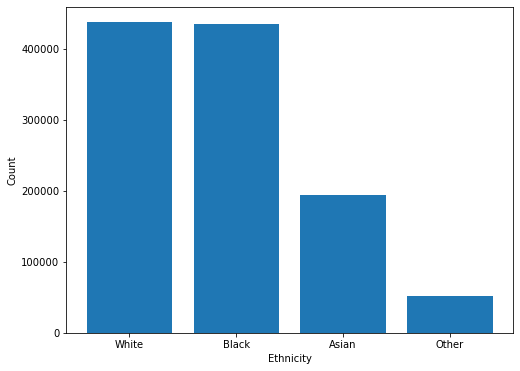

In [34]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Self-defined ethnicity" column
ethnicity_values = combined_data["Officer-defined ethnicity"].unique()

# Print the different values
print("Different values in the 'Officer-defined ethnicity' column:")
for value in ethnicity_values:
    print(value)
    
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Officer-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Whites
white_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("White")]
# Blacks
black_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Black")]
# Asians
asian_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Asian")]
# Others
other_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_entries = white_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_asian_entries = asian_filtered_data.shape[0]
total_other_entries = other_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'White' ethnicity: {total_white_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'Asian' ethnicity: {total_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White', 'Black', 'Asian', 'Other']
counts = [total_white_entries, total_black_entries, total_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

## Gender Details

In [35]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Gender" column
gender_values = combined_data["Gender"].unique()

# Print the different values
print("Different values in the 'Gender' column:")
for value in gender_values:
    print(value)

Different values in the 'Gender' column:
Male
Female
nan
Other




Total entries with 'Male' gender: 1043265
Total entries with 'Female' gender: 81938
Total entries with 'Other' gender: 783


Text(0, 0.5, 'Count')

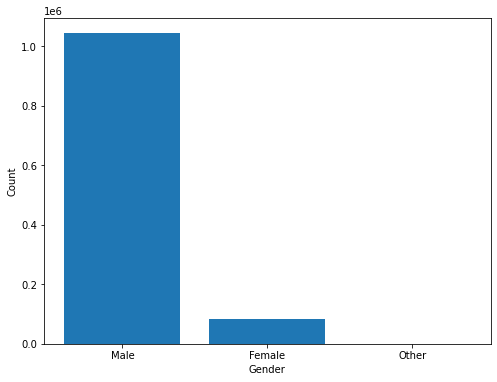

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Gender" column with a default value
combined_data["Gender"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Male
male_filtered_data = combined_data[combined_data["Gender"].str.contains("Male")]
# Female
female_filtered_data = combined_data[combined_data["Gender"].str.contains("Female")]
# Other
other_gender_filtered_data = combined_data[combined_data["Gender"].str.contains("Other")]

# Count the number of entries
total_male_entries = male_filtered_data.shape[0]
total_female_entries = female_filtered_data.shape[0]
total_other_gender_entries = other_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'Male' gender: {total_male_entries}")
print(f"Total entries with 'Female' gender: {total_female_entries}")
print(f"Total entries with 'Other' gender: {total_other_gender_entries}")

# Create a histogram
labels = ['Male', 'Female', 'Other']
counts = [total_male_entries, total_female_entries, total_other_gender_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Gender')
plt.ylabel('Count')

## Age Details

In [37]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Age" column
gender_values = combined_data["Age range"].unique()

# Print the different values
print("Different values in the 'Age range' column:")
for value in gender_values:
    print(value)

Different values in the 'Age range' column:
18-24
over 34
25-34
nan
10-17
under 10




Total entries in the '<10' age range: 256
Total entries in the '10-17' age range: 184025
Total entries in the '18-24' age range: 373135
Total entries in the '25-34' age range: 241893
Total entries in the '>34' age range: 189354


Text(0, 0.5, 'Count')

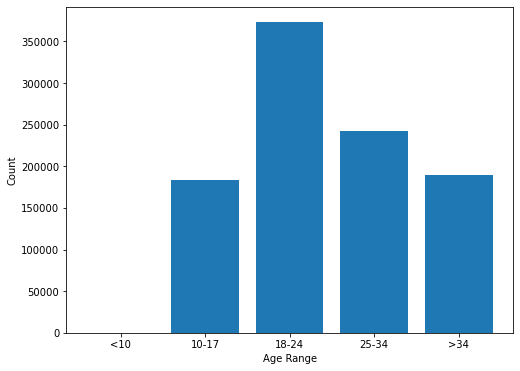

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Filter the DataFrame based on the "Age range" column

# Under 10
under_ten_filtered_data = combined_data[combined_data["Age range"].str.contains("under 10")]
# 10-17
ten_seventeen_filtered_data = combined_data[combined_data["Age range"].str.contains("10-17")]
# 18-24
eighteen_twentyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("18-24")]
# 25-34
twentyfive_thirtyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("25-34")]
# over 34
over_thirtyfour_gender_filtered_data = combined_data[combined_data["Age range"].str.contains("over 34")]

# Count the number of entries
total_u10_entries = under_ten_filtered_data.shape[0]
total_10_17_entries = ten_seventeen_filtered_data.shape[0]
total_18_24_entries = eighteen_twentyfour_filtered_data.shape[0]
total_25_34_entries = twentyfive_thirtyfour_filtered_data.shape[0]
total_o34_entries = over_thirtyfour_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries in the '<10' age range: {total_u10_entries}")
print(f"Total entries in the '10-17' age range: {total_10_17_entries}")
print(f"Total entries in the '18-24' age range: {total_18_24_entries}")
print(f"Total entries in the '25-34' age range: {total_25_34_entries}")
print(f"Total entries in the '>34' age range: {total_o34_entries}")

# Create a histogram
labels = ['<10', '10-17', '18-24', '25-34', '>34']
counts = [total_u10_entries, total_10_17_entries, total_18_24_entries, total_25_34_entries, total_o34_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Age Range')
plt.ylabel('Count')

    Self-defined ethnicity Age range Gender  Count
7                    Black     18-24   Male  92037
82                   Other     18-24   Male  70764
76                   Other             Male  51797
4                    Black     10-17   Male  50220
10                   Black     25-34   Male  49505
115          White British     18-24   Male  49327
85                   Other     25-34   Male  45408
121          White British   over 34   Male  42189
118          White British     25-34   Male  35733
79                   Other     10-17   Male  34991


ValueError: shape mismatch: objects cannot be broadcast to a single shape

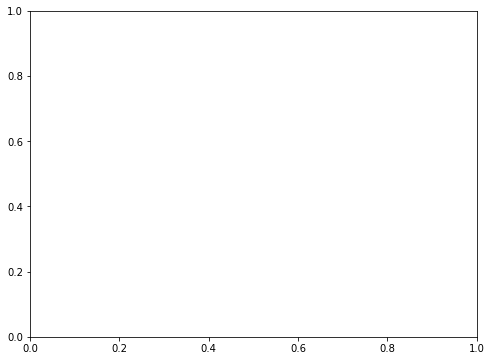

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Group the DataFrame based on "Self-defined ethnicity", "Age range", and "Gender"
grouped_data = combined_data.groupby(["Self-defined ethnicity", "Age range", "Gender"]).size().reset_index(name="Count")

# Sort the grouped data by count in descending order
sorted_data = grouped_data.sort_values(by="Count", ascending=False)

# Take only the top 5 largest values
top_10_data = sorted_data.head(10)

# Print the total counts for each group
print(top_10_data)

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(top_10_data.index, top_5_data["Count"])
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(top_10_data.index, top_10_data["Self-defined ethnicity"], rotation=90)
plt.show()


## *--- Pre-pandemic Data Analysis ---*

## Count the overall number of each ethnicity in the pre-pandemic sample

Total entries with 'White British' ethnicity: 68071
Total entries with 'White Other' ethnicity: 41168
Total entries with 'White (total)' ethnicity: 109239
Total entries with 'Black' ethnicity: 110778
Total entries with 'South Asian' ethnicity: 83136
Total entries with 'East Asian' ethnicity: 47570
Total entries with 'Mixed Black' ethnicity: 5471
Total entries with 'Mixed Asian' ethnicity: 799
Total entries with 'Mixed Other' ethnicity: 6514
Total entries with 'Other' ethnicity: 80042


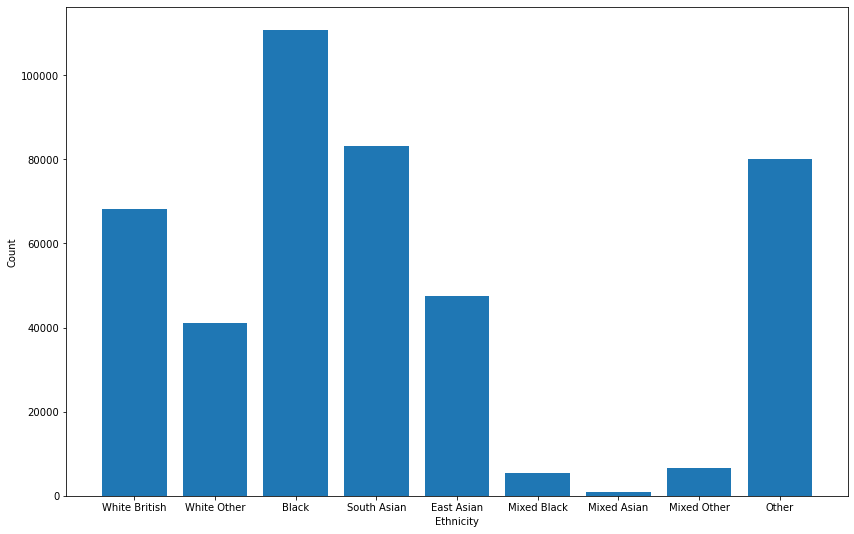

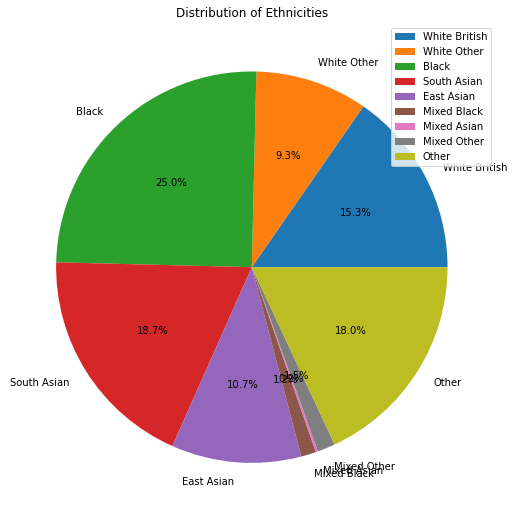

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Self-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Europeans
white_british_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White British")]
white_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White Other")]

# Blacks
black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Black")]

# South-Asians
indian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
pakistani_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
bangladeshi_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]

# East-Asians
chinese_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]
other_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]

# Mixed and unknown
mixed_black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Black")]
mixed_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Asian")]
mixed_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Other")]
other_ethnic_group = combined_data[combined_data["Self-defined ethnicity"].str.contains("Other") & ~combined_data["Self-defined ethnicity"].str.contains("White Other")]


# Count the number of entries
total_white_british_entries = white_british_filtered_data.shape[0]
total_white_other_entries = white_other_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_south_asian_entries = indian_filtered_data.shape[0] + pakistani_filtered_data.shape[0] + bangladeshi_filtered_data.shape[0]
total_east_asian_entries = chinese_filtered_data.shape[0] + other_asian_filtered_data.shape[0]
total_mixed_black_entries = mixed_black_filtered_data.shape[0]
total_mixed_asian_entries = mixed_asian_filtered_data.shape[0]
total_mixed_other_entries = mixed_other_filtered_data.shape[0]
total_other_entries = other_ethnic_group.shape[0]

# Print the total counts
print(f"Total entries with 'White British' ethnicity: {total_white_british_entries}")
print(f"Total entries with 'White Other' ethnicity: {total_white_other_entries}")
print(f"Total entries with 'White (total)' ethnicity: {total_white_british_entries + total_white_other_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'South Asian' ethnicity: {total_south_asian_entries}")
print(f"Total entries with 'East Asian' ethnicity: {total_east_asian_entries}")
print(f"Total entries with 'Mixed Black' ethnicity: {total_mixed_black_entries}")
print(f"Total entries with 'Mixed Asian' ethnicity: {total_mixed_asian_entries}")
print(f"Total entries with 'Mixed Other' ethnicity: {total_mixed_other_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White British', 'White Other', 'Black', 'South Asian', 'East Asian', 'Mixed Black', 'Mixed Asian', 'Mixed Other', 'Other']
counts = [total_white_british_entries, total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries,total_mixed_black_entries, total_mixed_asian_entries, total_mixed_other_entries, total_other_entries]

plt.figure(figsize=(14, 9))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Create a pie chart
plt.figure(figsize=(14, 9))  # Adjust figure size
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Ethnicities')
plt.legend(loc='best')

plt.show()


## Officer-defined ethnicities

Different values in the 'Officer-defined ethnicity' column:
White
Black
Other
Asian
nan


Total entries with 'White' ethnicity: 129599
Total entries with 'Black' ethnicity: 145557
Total entries with 'Asian' ethnicity: 61309
Total entries with 'Other' ethnicity: 13639


Text(0, 0.5, 'Count')

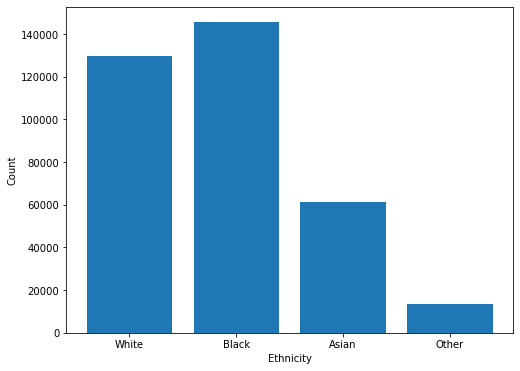

In [41]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Self-defined ethnicity" column
ethnicity_values = combined_data["Officer-defined ethnicity"].unique()

# Print the different values
print("Different values in the 'Officer-defined ethnicity' column:")
for value in ethnicity_values:
    print(value)
    
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Officer-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Whites
white_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("White")]
# Blacks
black_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Black")]
# Asians
asian_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Asian")]
# Others
other_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_entries = white_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_asian_entries = asian_filtered_data.shape[0]
total_other_entries = other_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'White' ethnicity: {total_white_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'Asian' ethnicity: {total_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White', 'Black', 'Asian', 'Other']
counts = [total_white_entries, total_black_entries, total_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

## Gender Details

In [42]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Gender" column
gender_values = combined_data["Gender"].unique()

# Print the different values
print("Different values in the 'Gender' column:")
for value in gender_values:
    print(value)

Different values in the 'Gender' column:
Male
Female
nan
Other




Total entries with 'Male' gender: 329349
Total entries with 'Female' gender: 22741
Total entries with 'Other' gender: 169


Text(0, 0.5, 'Count')

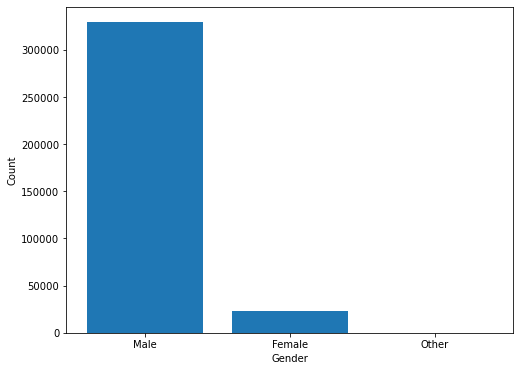

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Gender" column with a default value
combined_data["Gender"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Male
male_filtered_data = combined_data[combined_data["Gender"].str.contains("Male")]
# Female
female_filtered_data = combined_data[combined_data["Gender"].str.contains("Female")]
# Other
other_gender_filtered_data = combined_data[combined_data["Gender"].str.contains("Other")]

# Count the number of entries
total_male_entries = male_filtered_data.shape[0]
total_female_entries = female_filtered_data.shape[0]
total_other_gender_entries = other_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'Male' gender: {total_male_entries}")
print(f"Total entries with 'Female' gender: {total_female_entries}")
print(f"Total entries with 'Other' gender: {total_other_gender_entries}")

# Create a histogram
labels = ['Male', 'Female', 'Other']
counts = [total_male_entries, total_female_entries, total_other_gender_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Gender')
plt.ylabel('Count')

## Age Details

In [44]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Age" column
gender_values = combined_data["Age range"].unique()

# Print the different values
print("Different values in the 'Age range' column:")
for value in gender_values:
    print(value)

Different values in the 'Age range' column:
18-24
over 34
25-34
nan
10-17
under 10




Total entries in the '<10' age range: 60
Total entries in the '10-17' age range: 65524
Total entries in the '18-24' age range: 125253
Total entries in the '25-34' age range: 75592
Total entries in the '>34' age range: 55283


Text(0, 0.5, 'Count')

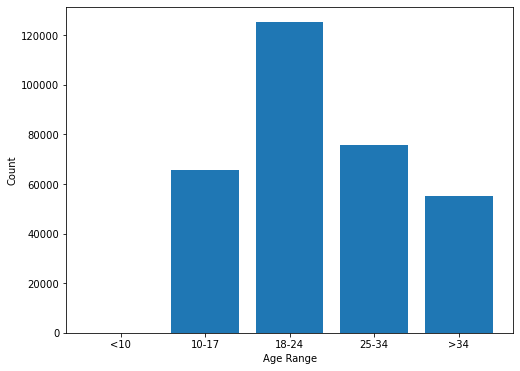

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Filter the DataFrame based on the "Age range" column

# Under 10
under_ten_filtered_data = combined_data[combined_data["Age range"].str.contains("under 10")]
# 10-17
ten_seventeen_filtered_data = combined_data[combined_data["Age range"].str.contains("10-17")]
# 18-24
eighteen_twentyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("18-24")]
# 25-34
twentyfive_thirtyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("25-34")]
# over 34
over_thirtyfour_gender_filtered_data = combined_data[combined_data["Age range"].str.contains("over 34")]

# Count the number of entries
total_u10_entries = under_ten_filtered_data.shape[0]
total_10_17_entries = ten_seventeen_filtered_data.shape[0]
total_18_24_entries = eighteen_twentyfour_filtered_data.shape[0]
total_25_34_entries = twentyfive_thirtyfour_filtered_data.shape[0]
total_o34_entries = over_thirtyfour_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries in the '<10' age range: {total_u10_entries}")
print(f"Total entries in the '10-17' age range: {total_10_17_entries}")
print(f"Total entries in the '18-24' age range: {total_18_24_entries}")
print(f"Total entries in the '25-34' age range: {total_25_34_entries}")
print(f"Total entries in the '>34' age range: {total_o34_entries}")

# Create a histogram
labels = ['<10', '10-17', '18-24', '25-34', '>34']
counts = [total_u10_entries, total_10_17_entries, total_18_24_entries, total_25_34_entries, total_o34_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Age Range')
plt.ylabel('Count')

    Self-defined ethnicity Age range Gender  Count
7                    Black     18-24   Male  39098
4                    Black     10-17   Male  23127
78                   Other     18-24   Male  21726
10                   Black     25-34   Male  19141
110          White British     18-24   Male  17679


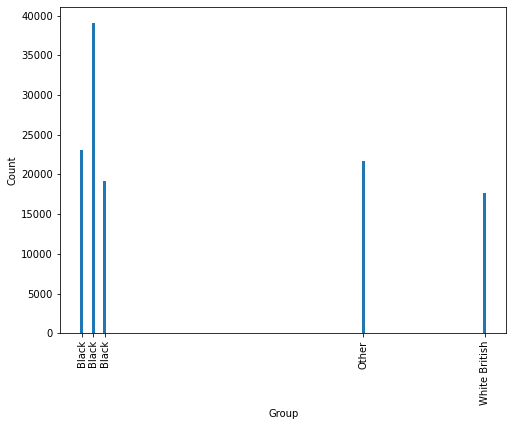

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv")

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Group the DataFrame based on "Self-defined ethnicity", "Age range", and "Gender"
grouped_data = combined_data.groupby(["Self-defined ethnicity", "Age range", "Gender"]).size().reset_index(name="Count")

# Sort the grouped data by count in descending order
sorted_data = grouped_data.sort_values(by="Count", ascending=False)

# Take only the top 5 largest values
top_5_data = sorted_data.head(5)

# Print the total counts for each group
print(top_5_data)

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(top_5_data.index, top_5_data["Count"])
plt.xlabel('Group')

plt.ylabel('Count')
plt.xticks(top_5_data.index, top_5_data["Self-defined ethnicity"], rotation=90)
plt.show()


## *--- Pandemic Data Analysis ---*

## Count the overall number of each ethnicity in the pandemic sample

Total entries with 'White British' ethnicity: 96238
Total entries with 'White Other' ethnicity: 55148
Total entries with 'White (total)' ethnicity: 151386
Total entries with 'Black' ethnicity: 123178
Total entries with 'South Asian' ethnicity: 91587
Total entries with 'East Asian' ethnicity: 68796
Total entries with 'Mixed Black' ethnicity: 6004
Total entries with 'Mixed Asian' ethnicity: 1202
Total entries with 'Mixed Other' ethnicity: 9131
Total entries with 'Other' ethnicity: 136681


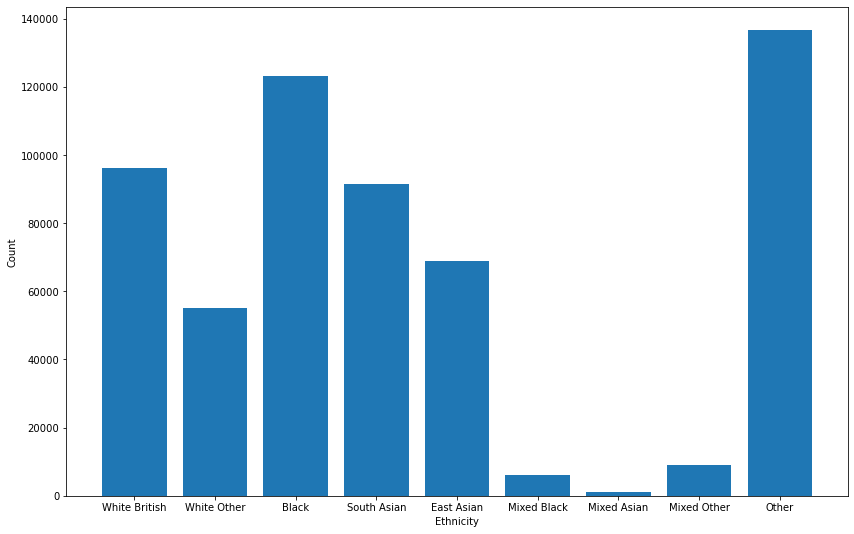

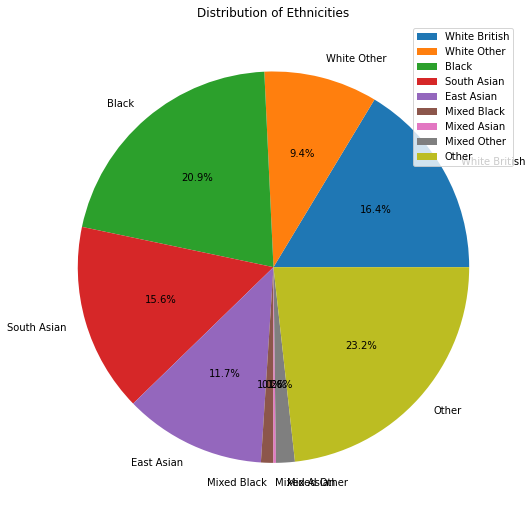

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Self-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Europeans
white_british_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White British")]
white_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White Other")]

# Blacks
black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Black")]

# South-Asians
indian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
pakistani_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
bangladeshi_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]

# East-Asians
chinese_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]
other_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]

# Mixed and unknown
mixed_black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Black")]
mixed_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Asian")]
mixed_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Other")]
other_ethnic_group = combined_data[combined_data["Self-defined ethnicity"].str.contains("Other") & ~combined_data["Self-defined ethnicity"].str.contains("White Other")]


# Count the number of entries
total_white_british_entries = white_british_filtered_data.shape[0]
total_white_other_entries = white_other_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_south_asian_entries = indian_filtered_data.shape[0] + pakistani_filtered_data.shape[0] + bangladeshi_filtered_data.shape[0]
total_east_asian_entries = chinese_filtered_data.shape[0] + other_asian_filtered_data.shape[0]
total_mixed_black_entries = mixed_black_filtered_data.shape[0]
total_mixed_asian_entries = mixed_asian_filtered_data.shape[0]
total_mixed_other_entries = mixed_other_filtered_data.shape[0]
total_other_entries = other_ethnic_group.shape[0]

# Print the total counts
print(f"Total entries with 'White British' ethnicity: {total_white_british_entries}")
print(f"Total entries with 'White Other' ethnicity: {total_white_other_entries}")
print(f"Total entries with 'White (total)' ethnicity: {total_white_british_entries + total_white_other_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'South Asian' ethnicity: {total_south_asian_entries}")
print(f"Total entries with 'East Asian' ethnicity: {total_east_asian_entries}")
print(f"Total entries with 'Mixed Black' ethnicity: {total_mixed_black_entries}")
print(f"Total entries with 'Mixed Asian' ethnicity: {total_mixed_asian_entries}")
print(f"Total entries with 'Mixed Other' ethnicity: {total_mixed_other_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White British', 'White Other', 'Black', 'South Asian', 'East Asian', 'Mixed Black', 'Mixed Asian', 'Mixed Other', 'Other']
counts = [total_white_british_entries, total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries,total_mixed_black_entries, total_mixed_asian_entries, total_mixed_other_entries, total_other_entries]

plt.figure(figsize=(14, 9))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Create a histogram with white combined
labels = ['White British', 'White Other', 'Black', 'South Asian', 'East Asian', 'Mixed Black', 'Mixed Asian', 'Mixed Other', 'Other']
counts = [total_white_british_entries, total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries,total_mixed_black_entries, total_mixed_asian_entries, total_mixed_other_entries, total_other_entries]

# Create a pie chart
plt.figure(figsize=(14, 9))  # Adjust figure size
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Ethnicities')
plt.legend(loc='best')

plt.show()


## Officer-defined ethnicities

Different values in the 'Officer-defined ethnicity' column:
Black
Asian
Other
White
nan


Total entries with 'White' ethnicity: 129599
Total entries with 'Black' ethnicity: 145557
Total entries with 'Asian' ethnicity: 61309
Total entries with 'Other' ethnicity: 13639


Text(0, 0.5, 'Count')

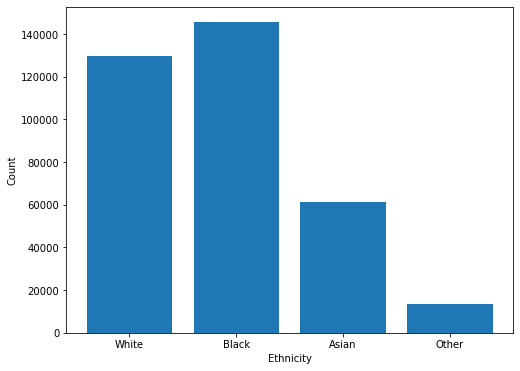

In [49]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Self-defined ethnicity" column
ethnicity_values = combined_data["Officer-defined ethnicity"].unique()

# Print the different values
print("Different values in the 'Officer-defined ethnicity' column:")
for value in ethnicity_values:
    print(value)
    
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Officer-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Whites
white_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("White")]
# Blacks
black_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Black")]
# Asians
asian_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Asian")]
# Others
other_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_entries = white_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_asian_entries = asian_filtered_data.shape[0]
total_other_entries = other_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'White' ethnicity: {total_white_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'Asian' ethnicity: {total_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White', 'Black', 'Asian', 'Other']
counts = [total_white_entries, total_black_entries, total_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

## Gender Details

In [50]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Gender" column
gender_values = combined_data["Gender"].unique()

# Print the different values
print("Different values in the 'Gender' column:")
for value in gender_values:
    print(value)

Different values in the 'Gender' column:
Male
Female
nan
Other




Total entries with 'Male' gender: 442019
Total entries with 'Female' gender: 34951
Total entries with 'Other' gender: 361


Text(0, 0.5, 'Count')

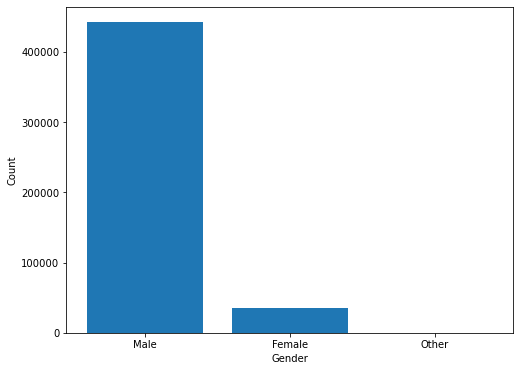

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Gender" column with a default value
combined_data["Gender"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Male
male_filtered_data = combined_data[combined_data["Gender"].str.contains("Male")]
# Female
female_filtered_data = combined_data[combined_data["Gender"].str.contains("Female")]
# Other
other_gender_filtered_data = combined_data[combined_data["Gender"].str.contains("Other")]

# Count the number of entries
total_male_entries = male_filtered_data.shape[0]
total_female_entries = female_filtered_data.shape[0]
total_other_gender_entries = other_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'Male' gender: {total_male_entries}")
print(f"Total entries with 'Female' gender: {total_female_entries}")
print(f"Total entries with 'Other' gender: {total_other_gender_entries}")

# Create a histogram
labels = ['Male', 'Female', 'Other']
counts = [total_male_entries, total_female_entries, total_other_gender_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Gender')
plt.ylabel('Count')

## Age Details

In [52]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Age" column
gender_values = combined_data["Age range"].unique()

# Print the different values
print("Different values in the 'Age range' column:")
for value in gender_values:
    print(value)

Different values in the 'Age range' column:
25-34
18-24
nan
10-17
over 34
under 10




Total entries in the '<10' age range: 116
Total entries in the '10-17' age range: 72758
Total entries in the '18-24' age range: 162015
Total entries in the '25-34' age range: 108082
Total entries in the '>34' age range: 82508


Text(0, 0.5, 'Count')

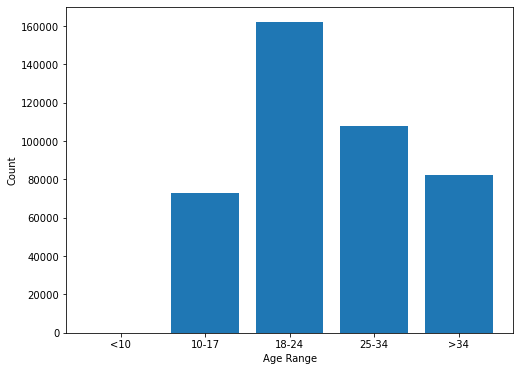

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Filter the DataFrame based on the "Age range" column

# Under 10
under_ten_filtered_data = combined_data[combined_data["Age range"].str.contains("under 10")]
# 10-17
ten_seventeen_filtered_data = combined_data[combined_data["Age range"].str.contains("10-17")]
# 18-24
eighteen_twentyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("18-24")]
# 25-34
twentyfive_thirtyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("25-34")]
# over 34
over_thirtyfour_gender_filtered_data = combined_data[combined_data["Age range"].str.contains("over 34")]

# Count the number of entries
total_u10_entries = under_ten_filtered_data.shape[0]
total_10_17_entries = ten_seventeen_filtered_data.shape[0]
total_18_24_entries = eighteen_twentyfour_filtered_data.shape[0]
total_25_34_entries = twentyfive_thirtyfour_filtered_data.shape[0]
total_o34_entries = over_thirtyfour_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries in the '<10' age range: {total_u10_entries}")
print(f"Total entries in the '10-17' age range: {total_10_17_entries}")
print(f"Total entries in the '18-24' age range: {total_18_24_entries}")
print(f"Total entries in the '25-34' age range: {total_25_34_entries}")
print(f"Total entries in the '>34' age range: {total_o34_entries}")

# Create a histogram
labels = ['<10', '10-17', '18-24', '25-34', '>34']
counts = [total_u10_entries, total_10_17_entries, total_18_24_entries, total_25_34_entries, total_o34_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Age Range')
plt.ylabel('Count')

    Self-defined ethnicity Age range Gender  Count
7                    Black     18-24   Male  41635
77                   Other     18-24   Male  36363
71                   Other             Male  25838
108          White British     18-24   Male  24634
80                   Other     25-34   Male  23723


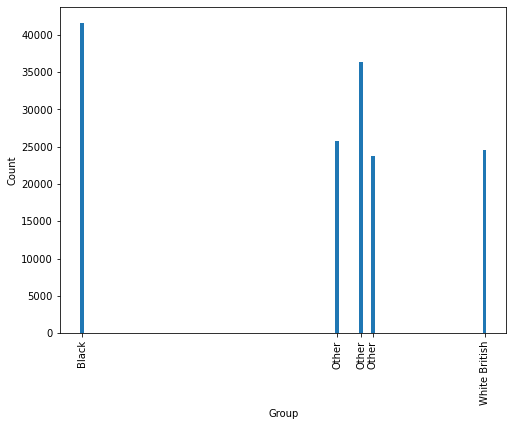

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Group the DataFrame based on "Self-defined ethnicity", "Age range", and "Gender"
grouped_data = combined_data.groupby(["Self-defined ethnicity", "Age range", "Gender"]).size().reset_index(name="Count")

# Sort the grouped data by count in descending order
sorted_data = grouped_data.sort_values(by="Count", ascending=False)

# Take only the top 5 largest values
top_5_data = sorted_data.head(5)

# Print the total counts for each group
print(top_5_data)

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(top_5_data.index, top_5_data["Count"])
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(top_5_data.index, top_5_data["Self-defined ethnicity"], rotation=90)
plt.show()


## *--- Post-pandemic Data Analysis ---*

## Count the overall number of each ethnicity in the post-pandemic sample

Total entries with 'White British' ethnicity: 32143
Total entries with 'White Other' ethnicity: 17867
Total entries with 'White (total)' ethnicity: 50010
Total entries with 'Black' ethnicity: 38535
Total entries with 'South Asian' ethnicity: 25980
Total entries with 'East Asian' ethnicity: 20180
Total entries with 'Mixed Black' ethnicity: 2088
Total entries with 'Mixed Asian' ethnicity: 416
Total entries with 'Mixed Other' ethnicity: 3270
Total entries with 'Other' ethnicity: 54909


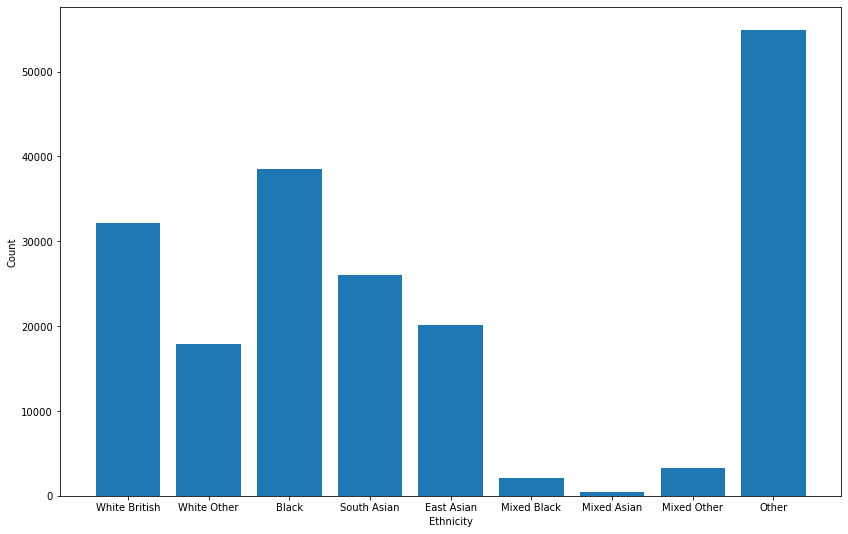

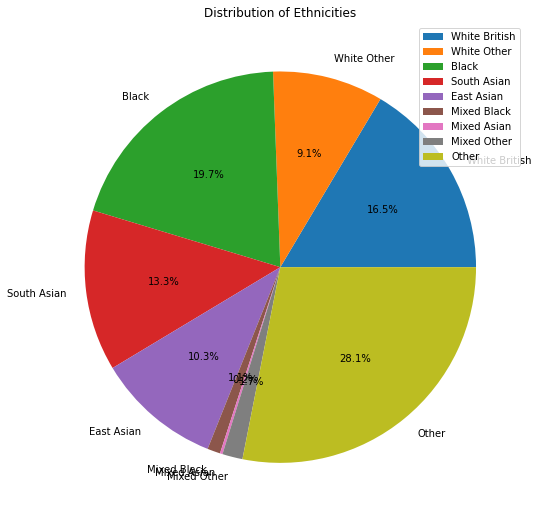

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Self-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Europeans
white_british_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White British")]
white_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White Other")]

# Blacks
black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Black")]

# South-Asians
indian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
pakistani_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
bangladeshi_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]

# East-Asians
chinese_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]
other_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]

# Mixed and unknown
mixed_black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Black")]
mixed_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Asian")]
mixed_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Other")]
other_ethnic_group = combined_data[combined_data["Self-defined ethnicity"].str.contains("Other") & ~combined_data["Self-defined ethnicity"].str.contains("White Other")]


# Count the number of entries
total_white_british_entries = white_british_filtered_data.shape[0]
total_white_other_entries = white_other_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_south_asian_entries = indian_filtered_data.shape[0] + pakistani_filtered_data.shape[0] + bangladeshi_filtered_data.shape[0]
total_east_asian_entries = chinese_filtered_data.shape[0] + other_asian_filtered_data.shape[0]
total_mixed_black_entries = mixed_black_filtered_data.shape[0]
total_mixed_asian_entries = mixed_asian_filtered_data.shape[0]
total_mixed_other_entries = mixed_other_filtered_data.shape[0]
total_other_entries = other_ethnic_group.shape[0]

# Print the total counts
print(f"Total entries with 'White British' ethnicity: {total_white_british_entries}")
print(f"Total entries with 'White Other' ethnicity: {total_white_other_entries}")
print(f"Total entries with 'White (total)' ethnicity: {total_white_british_entries + total_white_other_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'South Asian' ethnicity: {total_south_asian_entries}")
print(f"Total entries with 'East Asian' ethnicity: {total_east_asian_entries}")
print(f"Total entries with 'Mixed Black' ethnicity: {total_mixed_black_entries}")
print(f"Total entries with 'Mixed Asian' ethnicity: {total_mixed_asian_entries}")
print(f"Total entries with 'Mixed Other' ethnicity: {total_mixed_other_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White British', 'White Other', 'Black', 'South Asian', 'East Asian', 'Mixed Black', 'Mixed Asian', 'Mixed Other', 'Other']
counts = [total_white_british_entries, total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries,total_mixed_black_entries, total_mixed_asian_entries, total_mixed_other_entries, total_other_entries]

plt.figure(figsize=(14, 9))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Create a pie chart
plt.figure(figsize=(14, 9))  # Adjust figure size
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Ethnicities')
plt.legend(loc='best')


plt.show()


## Officer-defined ethnicities

Different values in the 'Officer-defined ethnicity' column:
Asian
White
Black
Other
nan


Total entries with 'White' ethnicity: 129599
Total entries with 'Black' ethnicity: 145557
Total entries with 'Asian' ethnicity: 61309
Total entries with 'Other' ethnicity: 13639


Text(0, 0.5, 'Count')

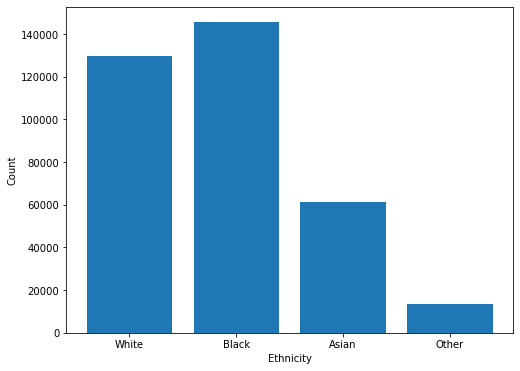

In [1]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Self-defined ethnicity" column
ethnicity_values = combined_data["Officer-defined ethnicity"].unique()

# Print the different values
print("Different values in the 'Officer-defined ethnicity' column:")
for value in ethnicity_values:
    print(value)
    
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Officer-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Whites
white_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("White")]
# Blacks
black_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Black")]
# Asians
asian_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Asian")]
# Others
other_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_entries = white_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_asian_entries = asian_filtered_data.shape[0]
total_other_entries = other_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'White' ethnicity: {total_white_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'Asian' ethnicity: {total_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White', 'Black', 'Asian', 'Other']
counts = [total_white_entries, total_black_entries, total_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

## Gender Details

In [11]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Gender" column
gender_values = combined_data["Gender"].unique()

# Print the different values
print("Different values in the 'Gender' column:")
for value in gender_values:
    print(value)

Different values in the 'Gender' column:
Male
Female
nan
Other




Total entries with 'Male' gender: 149256
Total entries with 'Female' gender: 13225
Total entries with 'Other' gender: 128


Text(0, 0.5, 'Count')

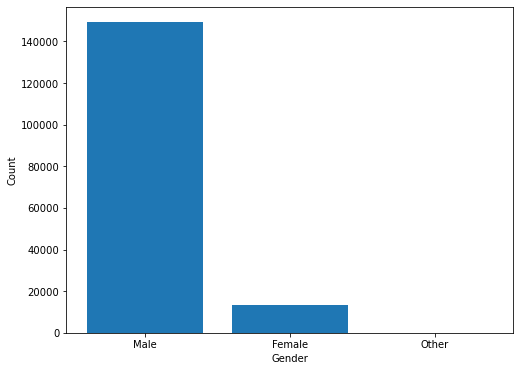

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Gender" column with a default value
combined_data["Gender"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Male
male_filtered_data = combined_data[combined_data["Gender"].str.contains("Male")]
# Female
female_filtered_data = combined_data[combined_data["Gender"].str.contains("Female")]
# Other
other_gender_filtered_data = combined_data[combined_data["Gender"].str.contains("Other")]

# Count the number of entries
total_male_entries = male_filtered_data.shape[0]
total_female_entries = female_filtered_data.shape[0]
total_other_gender_entries = other_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'Male' gender: {total_male_entries}")
print(f"Total entries with 'Female' gender: {total_female_entries}")
print(f"Total entries with 'Other' gender: {total_other_gender_entries}")

# Create a histogram
labels = ['Male', 'Female', 'Other']
counts = [total_male_entries, total_female_entries, total_other_gender_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Gender')
plt.ylabel('Count')

## Age Details

In [13]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Age" column
gender_values = combined_data["Age range"].unique()

# Print the different values
print("Different values in the 'Age range' column:")
for value in gender_values:
    print(value)

Different values in the 'Age range' column:
18-24
over 34
25-34
nan
10-17
under 10




Total entries in the '<10' age range: 44
Total entries in the '10-17' age range: 25618
Total entries in the '18-24' age range: 47350
Total entries in the '25-34' age range: 34741
Total entries in the '>34' age range: 33799


Text(0, 0.5, 'Count')

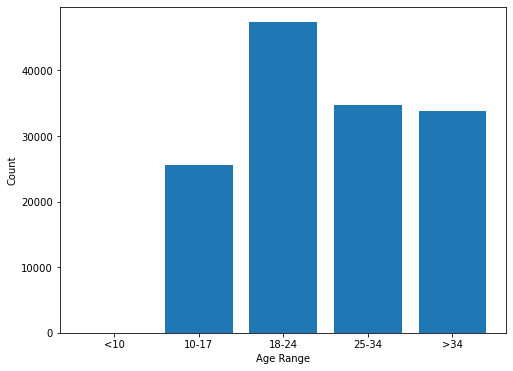

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Filter the DataFrame based on the "Age range" column

# Under 10
under_ten_filtered_data = combined_data[combined_data["Age range"].str.contains("under 10")]
# 10-17
ten_seventeen_filtered_data = combined_data[combined_data["Age range"].str.contains("10-17")]
# 18-24
eighteen_twentyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("18-24")]
# 25-34
twentyfive_thirtyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("25-34")]
# over 34
over_thirtyfour_gender_filtered_data = combined_data[combined_data["Age range"].str.contains("over 34")]

# Count the number of entries
total_u10_entries = under_ten_filtered_data.shape[0]
total_10_17_entries = ten_seventeen_filtered_data.shape[0]
total_18_24_entries = eighteen_twentyfour_filtered_data.shape[0]
total_25_34_entries = twentyfive_thirtyfour_filtered_data.shape[0]
total_o34_entries = over_thirtyfour_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries in the '<10' age range: {total_u10_entries}")
print(f"Total entries in the '10-17' age range: {total_10_17_entries}")
print(f"Total entries in the '18-24' age range: {total_18_24_entries}")
print(f"Total entries in the '25-34' age range: {total_25_34_entries}")
print(f"Total entries in the '>34' age range: {total_o34_entries}")

# Create a histogram
labels = ['<10', '10-17', '18-24', '25-34', '>34']
counts = [total_u10_entries, total_10_17_entries, total_18_24_entries, total_25_34_entries, total_o34_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Age Range')
plt.ylabel('Count')

    Self-defined ethnicity Age range Gender  Count
7                    Black     18-24   Male  41635
77                   Other     18-24   Male  36363
71                   Other             Male  25838
108          White British     18-24   Male  24634
80                   Other     25-34   Male  23723


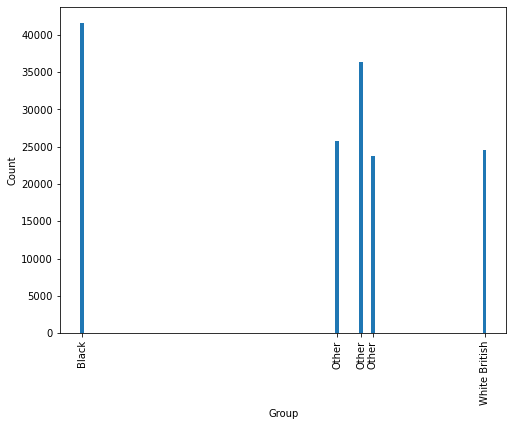

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Group the DataFrame based on "Self-defined ethnicity", "Age range", and "Gender"
grouped_data = combined_data.groupby(["Self-defined ethnicity", "Age range", "Gender"]).size().reset_index(name="Count")

# Sort the grouped data by count in descending order
sorted_data = grouped_data.sort_values(by="Count", ascending=False)

# Take only the top 5 largest values
top_5_data = sorted_data.head(5)

# Print the total counts for each group
print(top_5_data)

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(top_5_data.index, top_5_data["Count"])
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(top_5_data.index, top_5_data["Self-defined ethnicity"], rotation=90)
plt.show()


# --- Census Analysis ---

In [18]:
import pandas as pd

# Read the CSV files into DataFrames
data2011 = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2011_clean.csv")
data2021 = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2021_clean.csv")
dataChange = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_change_clean.csv")

# Print the contents of each DataFrame
print("Data from the 2011 Census:")
print(data2011)

print("\nData from the 2021 Census:")
print(data2021)

print("\nChange in ethnicities between 2011 and 2021:")
print(dataChange)


Data from the 2011 Census:
                   Borough  Total Residents  White British  White Other  \
0     Barking and Dagenham           185911          93680        14708   
1                   Barnet           356385         170801        57751   
2                   Bexley           231999         181846         8116   
3                    Brent           311215          68210        44673   
4                  Bromley           309393         243944        16928   
5                   Camden           220339         103988        42064   
6           City of London             7375           4423         1376   
7                  Croydon           363377         177108        23086   
8                   Ealing           338448         113462        52354   
9                  Enfield           312466         133349        57289   
10               Greenwich           254557         137422        21580   
11                 Hackney           246269          94247        40373  

## Charts about the ethnicity in each Borough for 2011

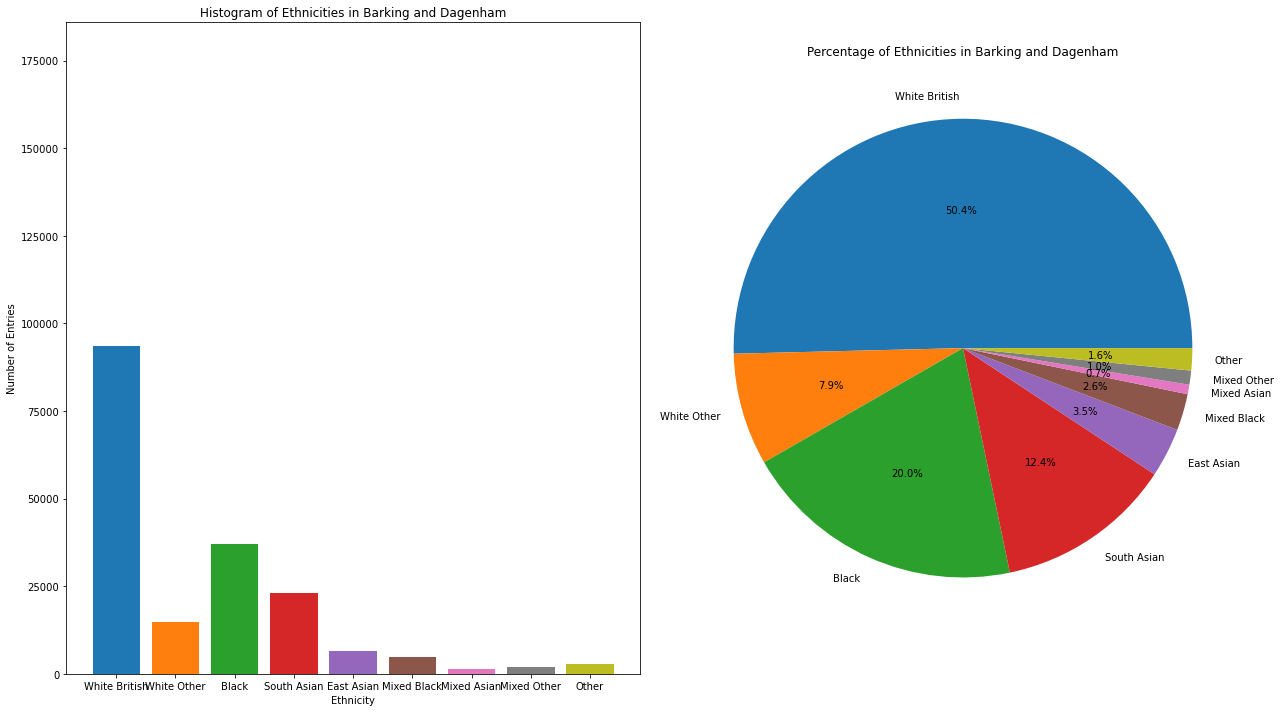

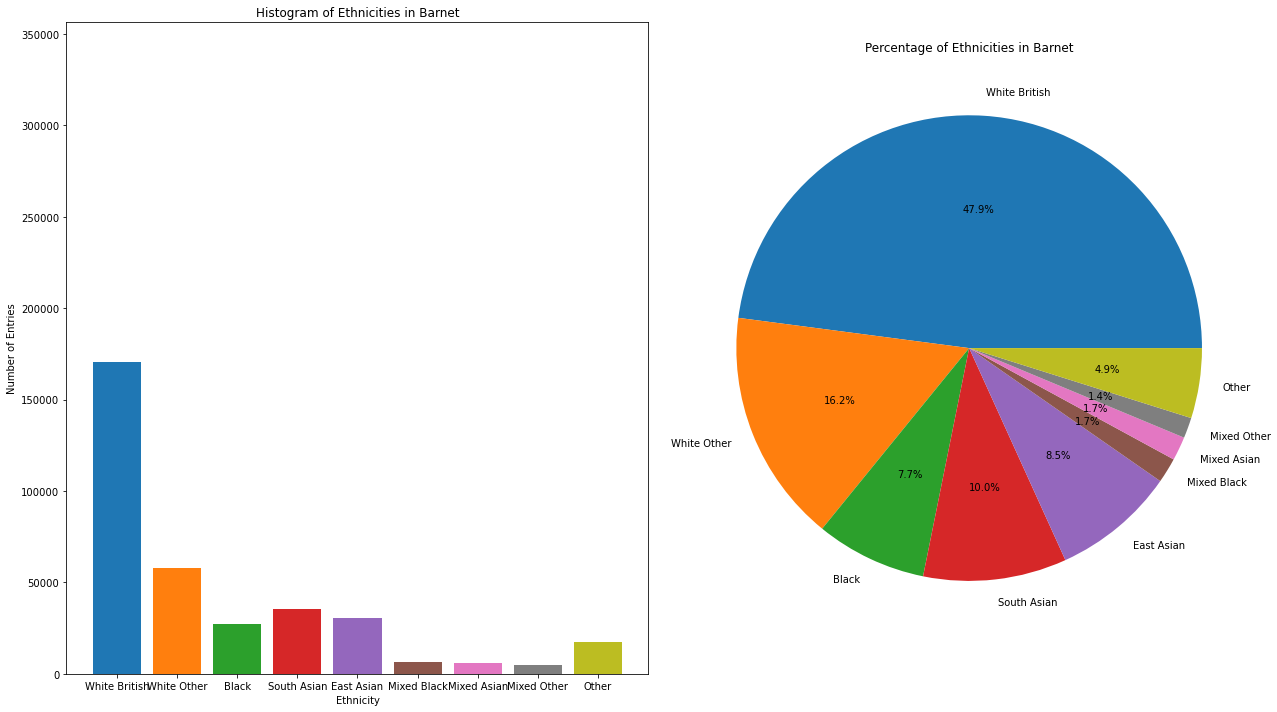

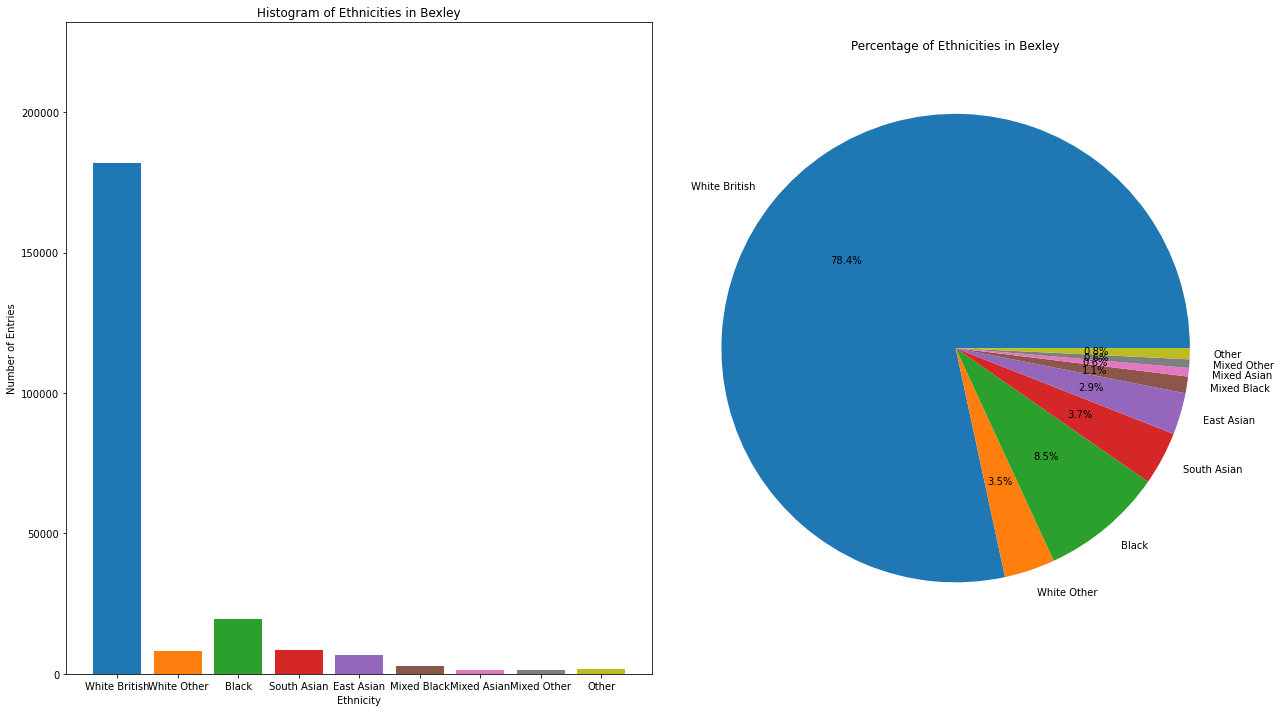

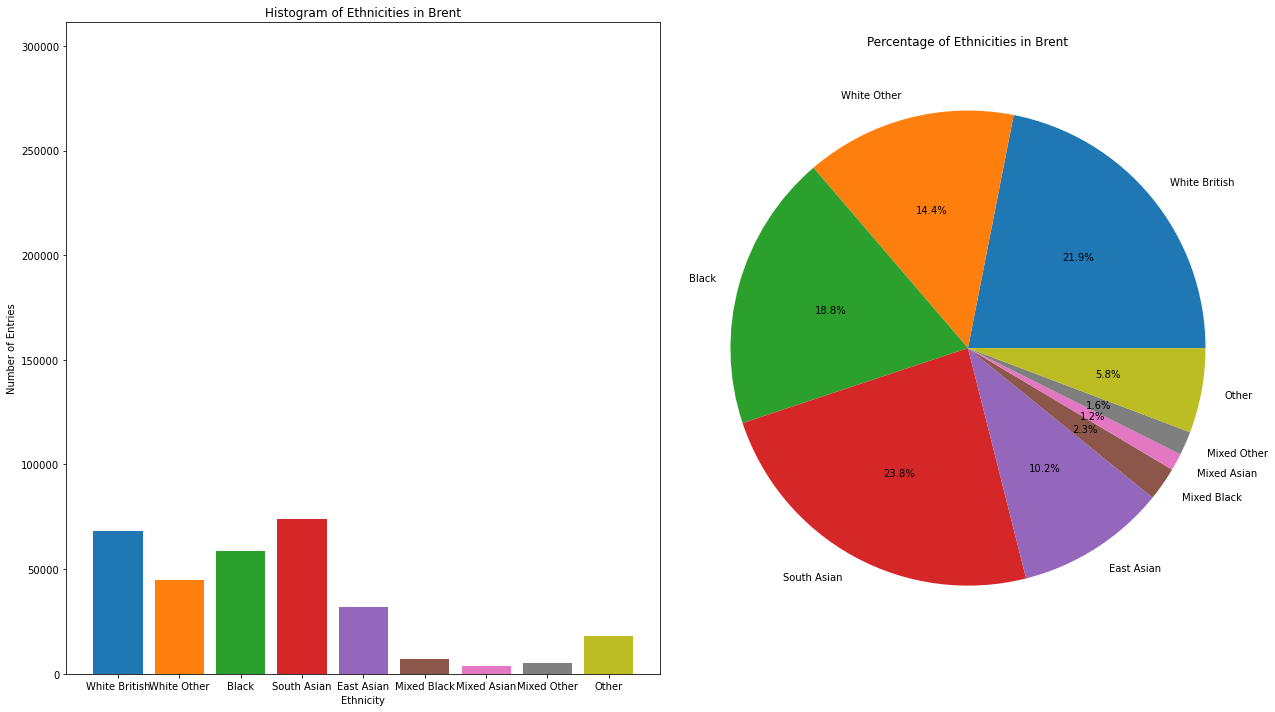

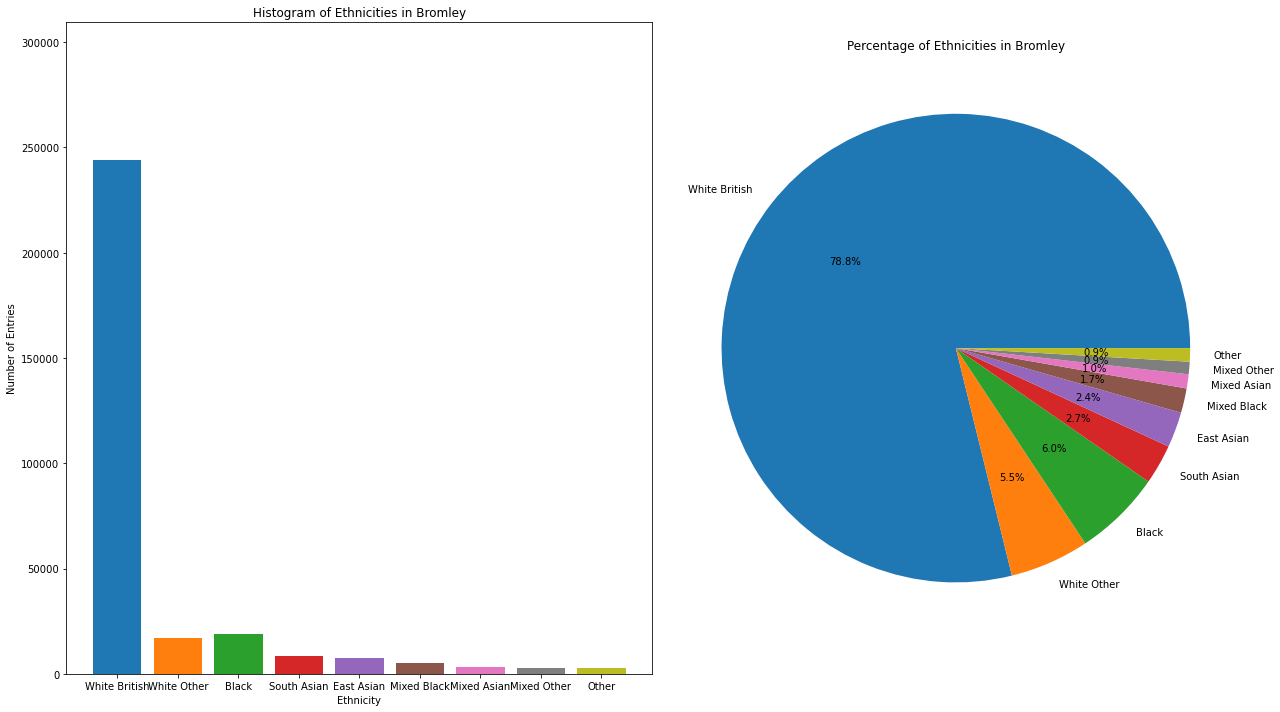

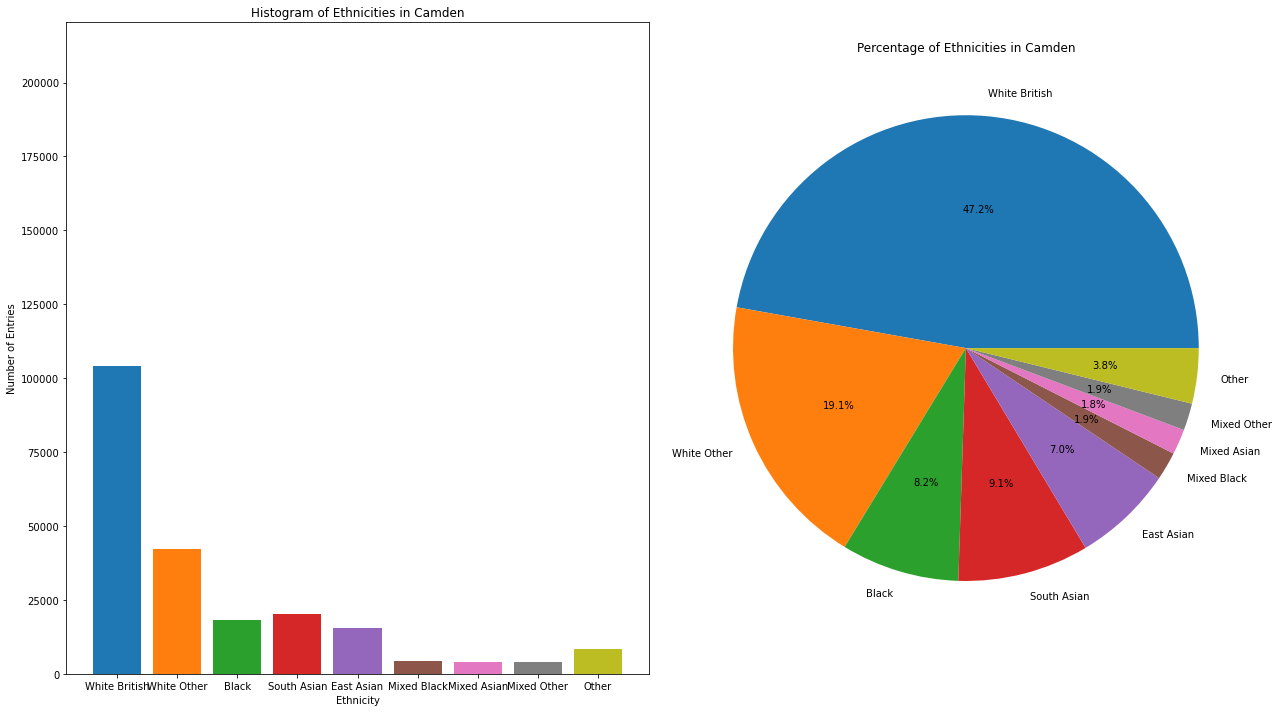

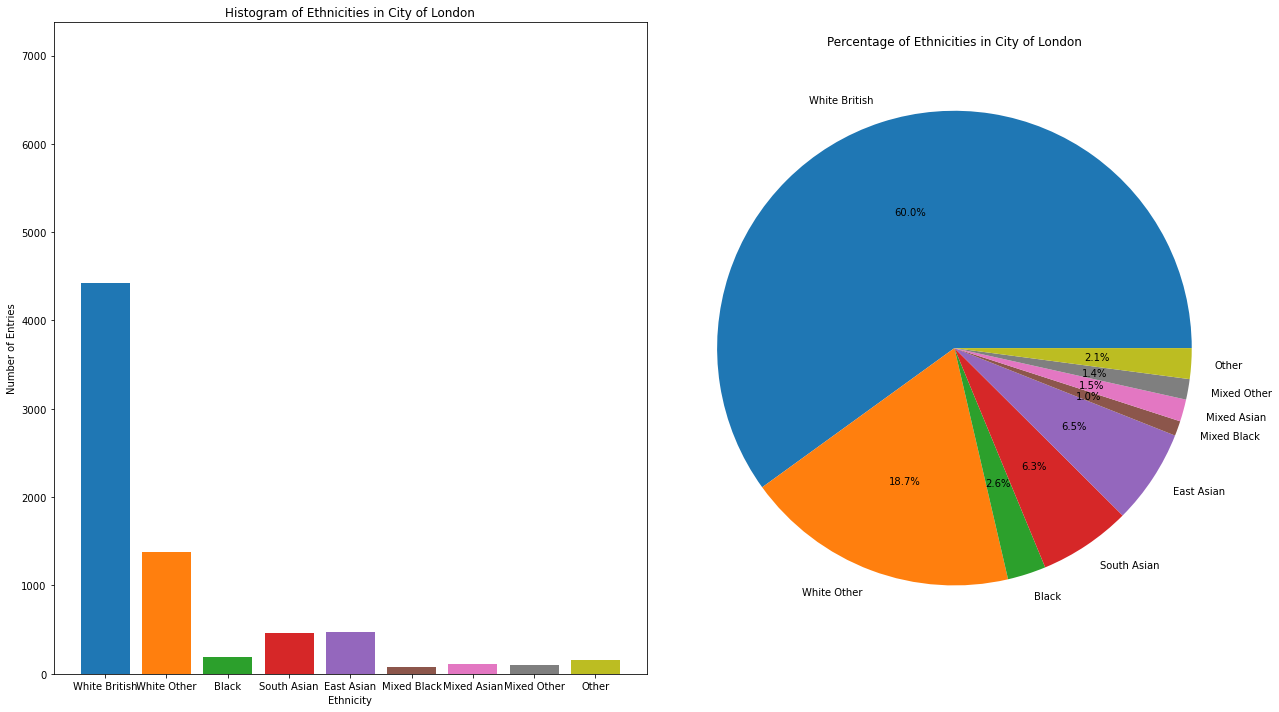

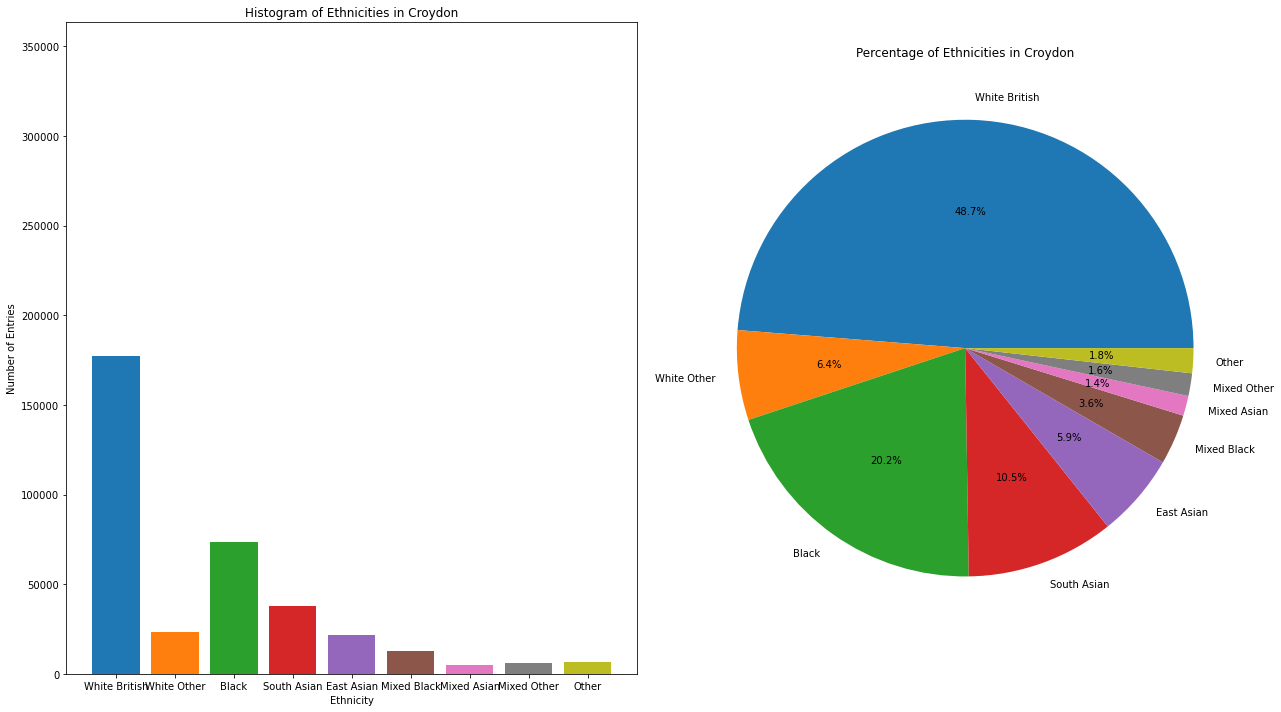

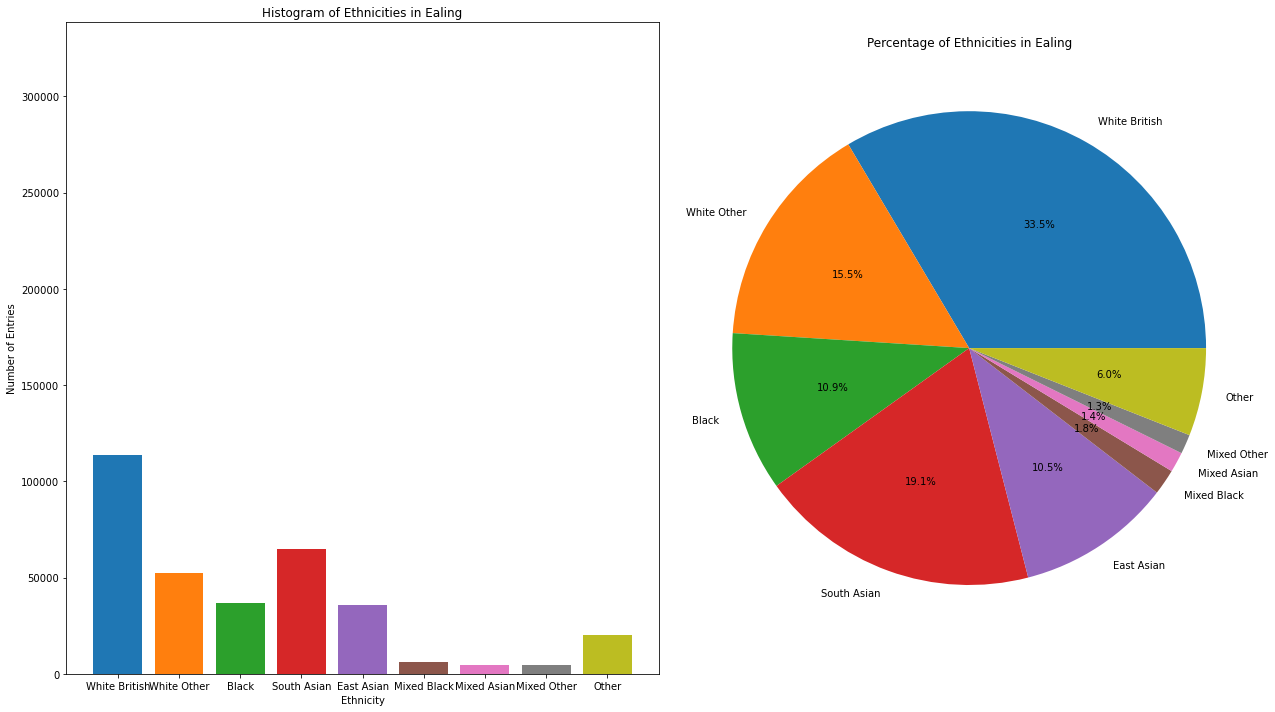

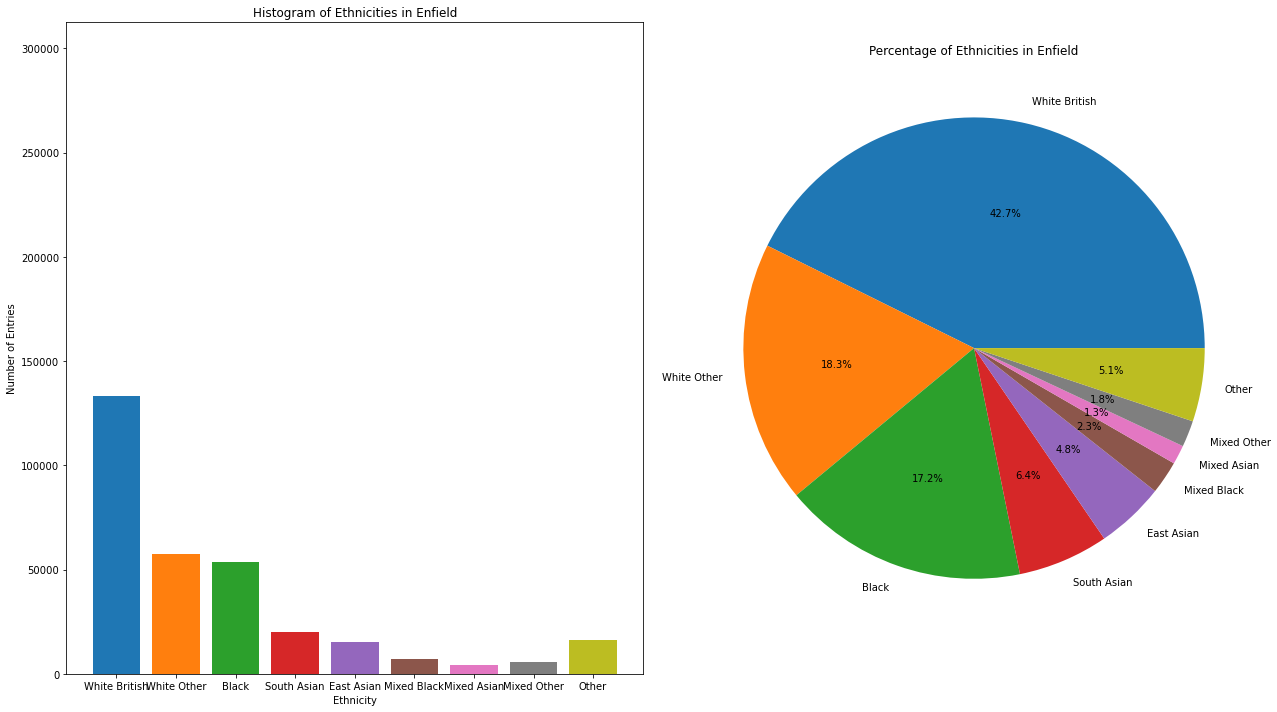

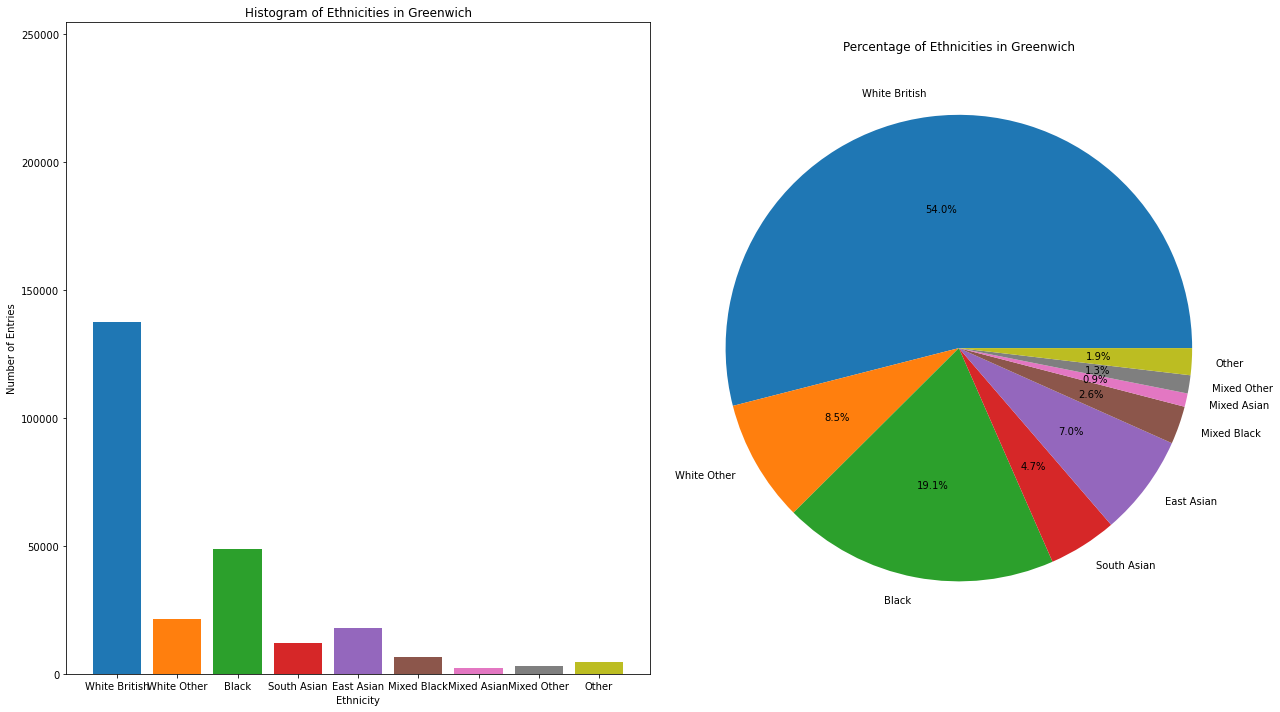

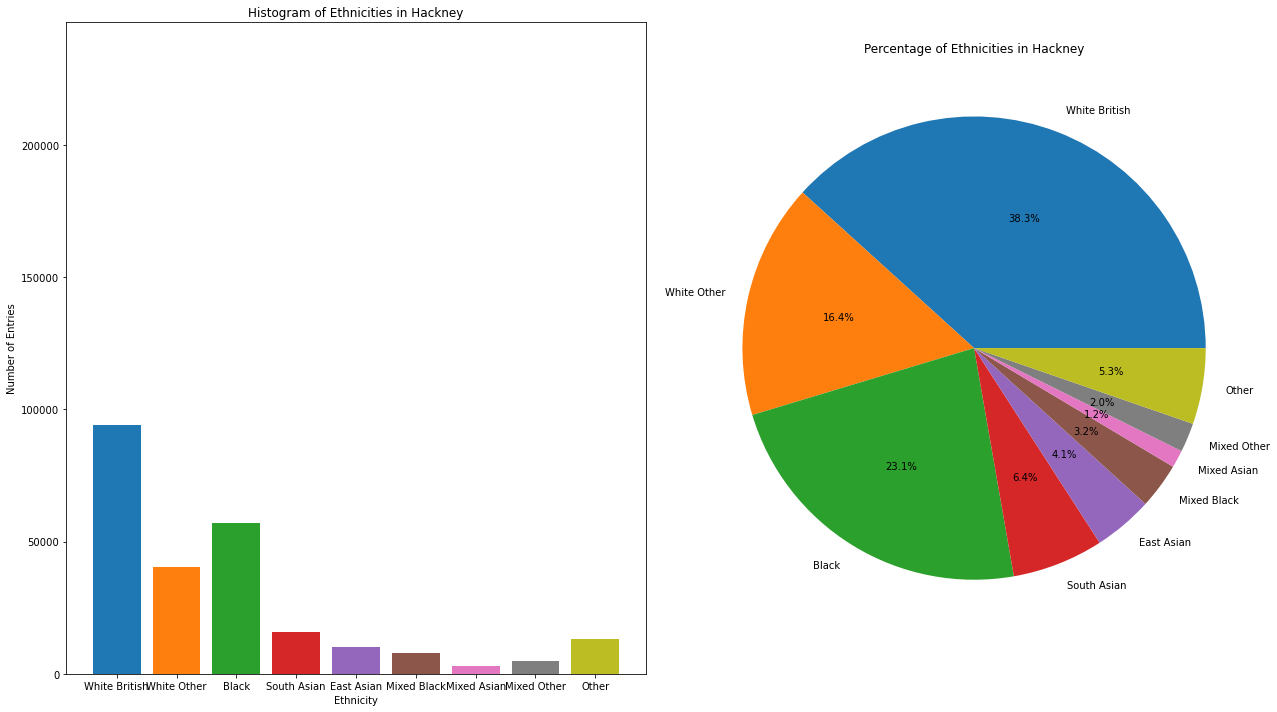

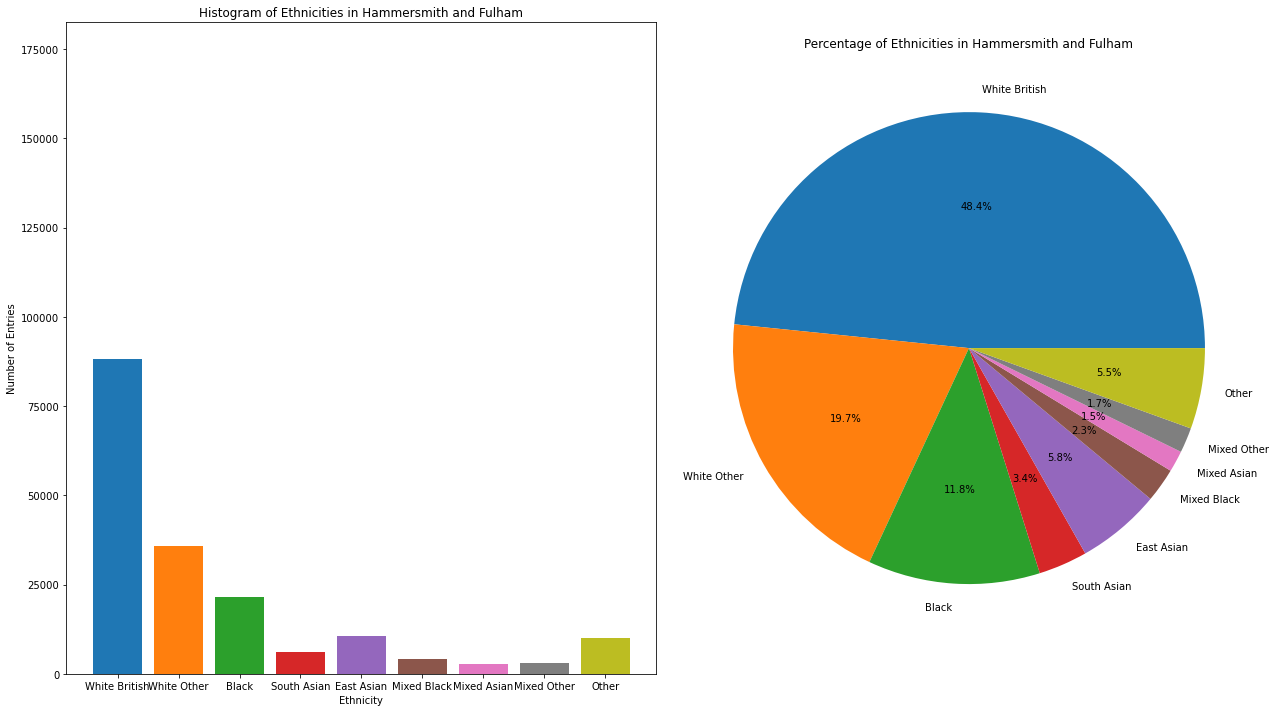

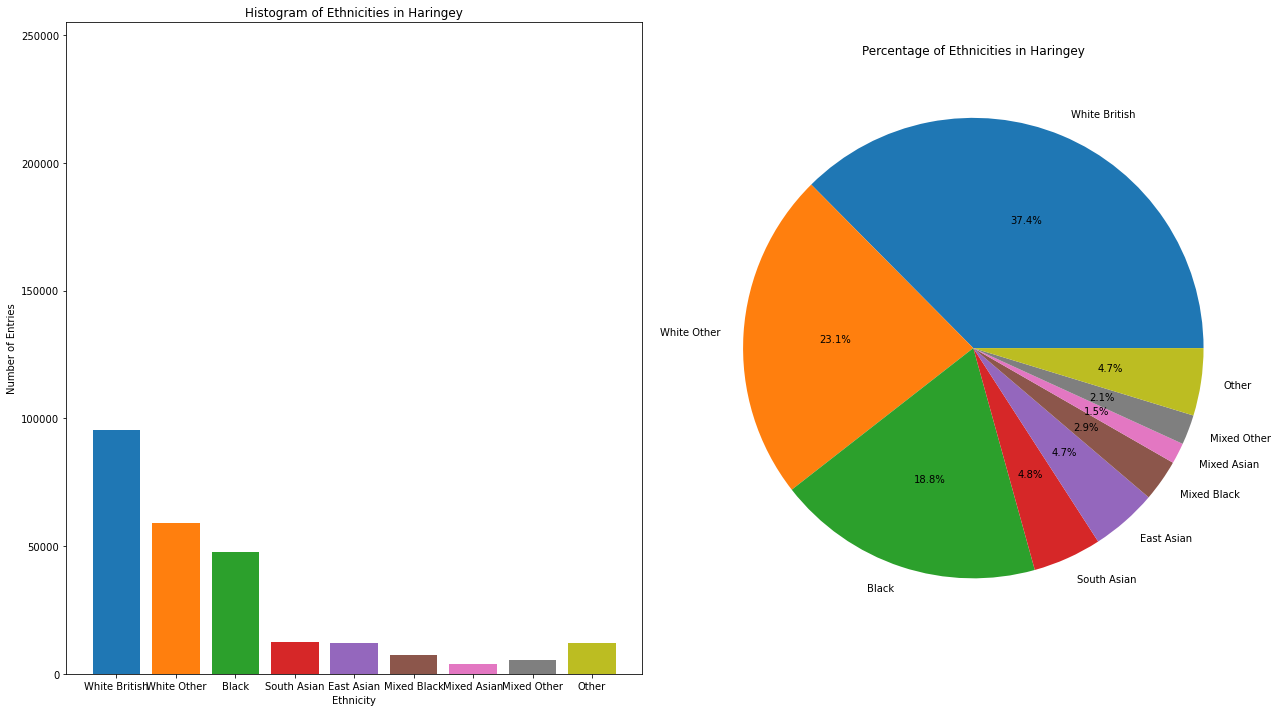

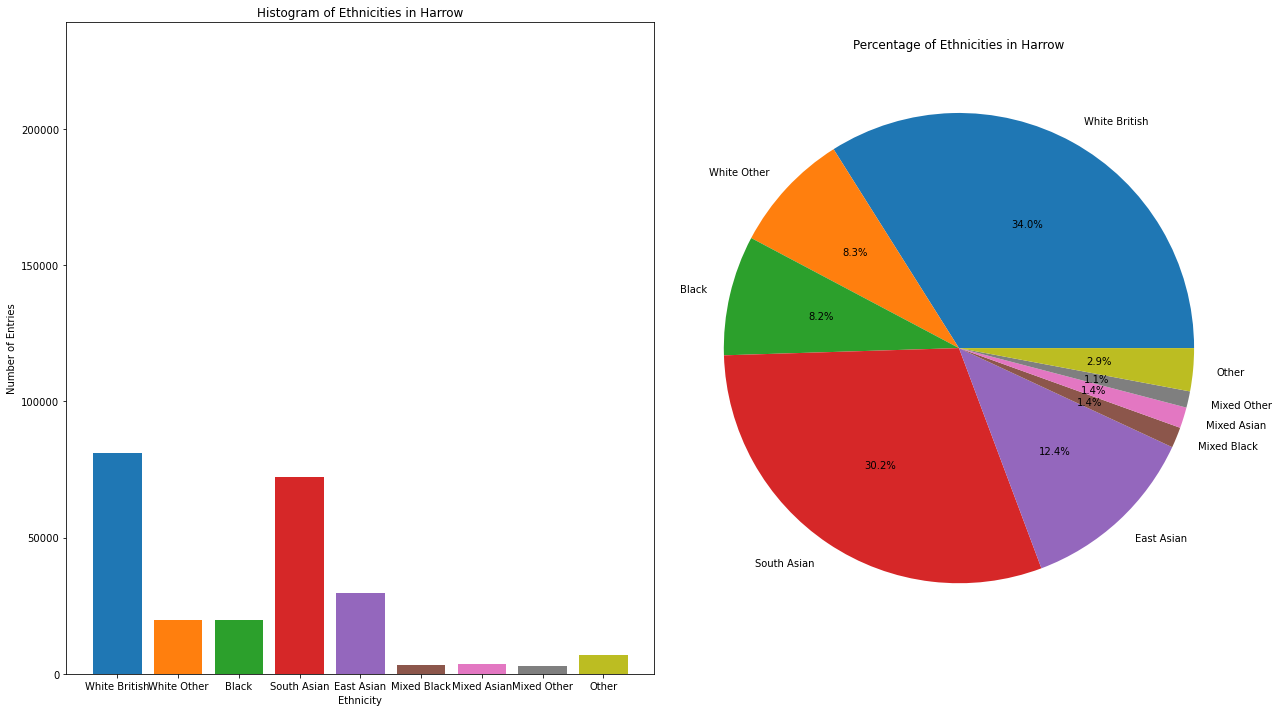

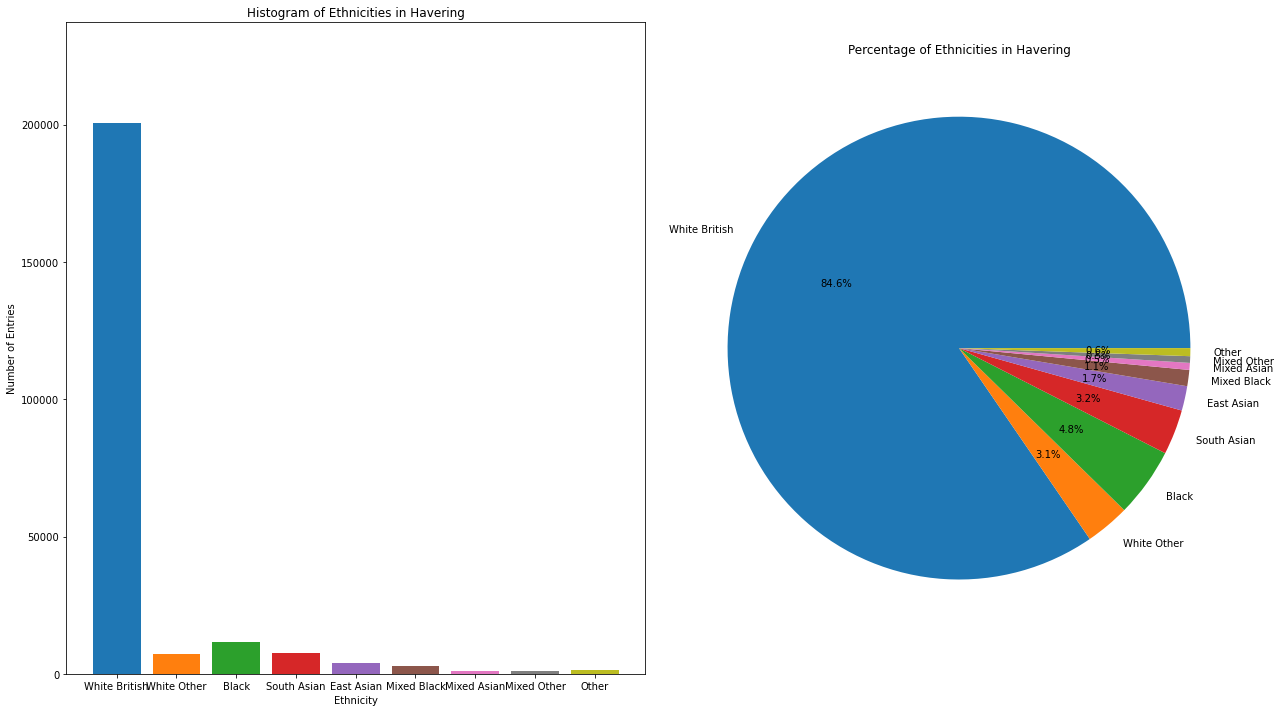

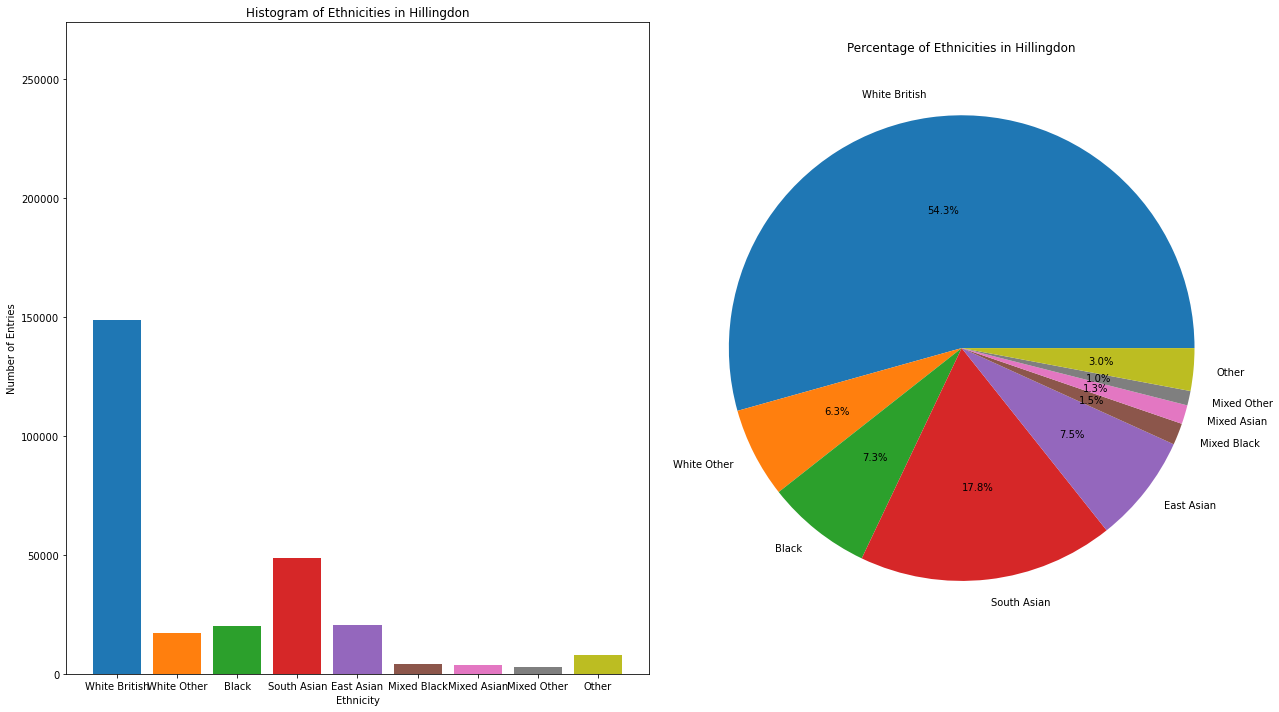

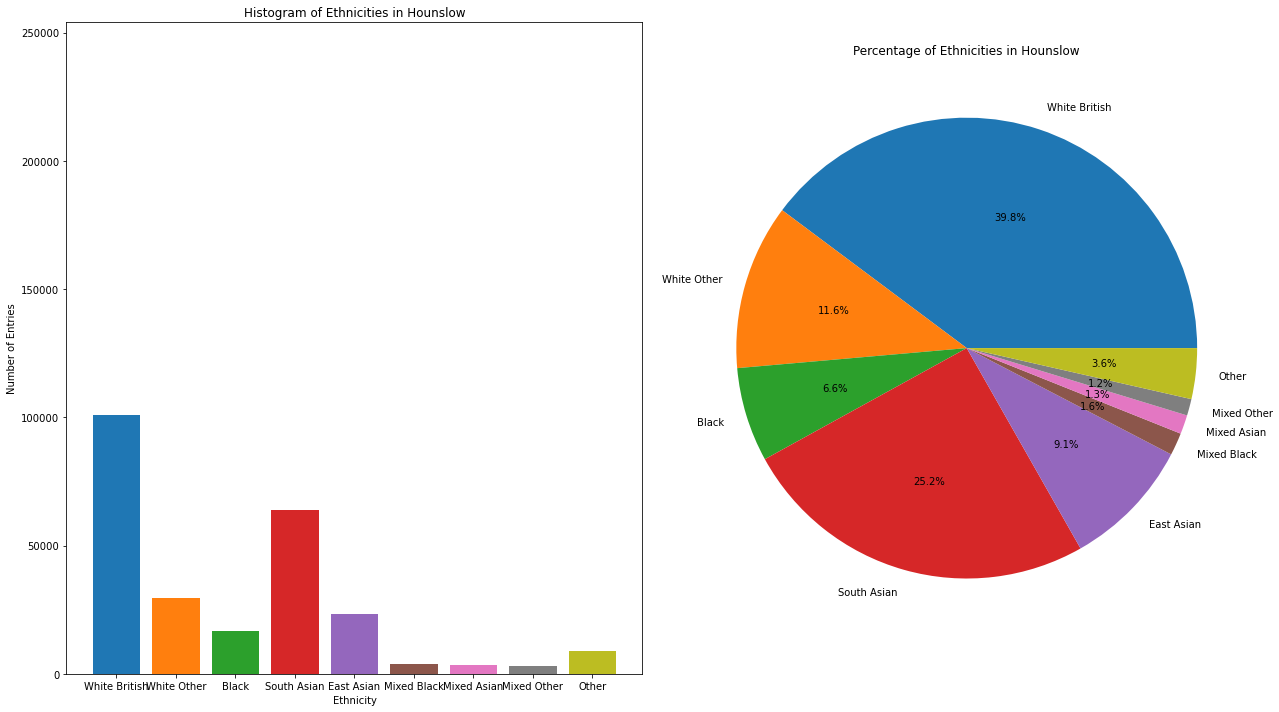

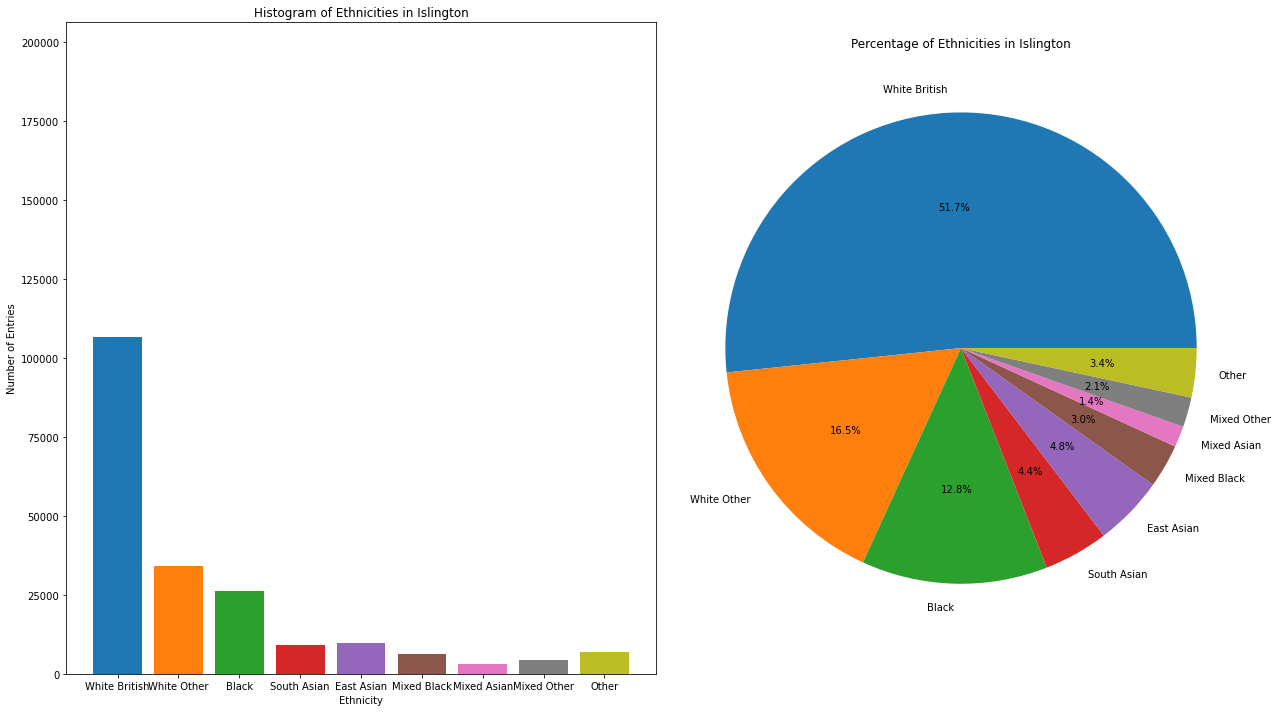

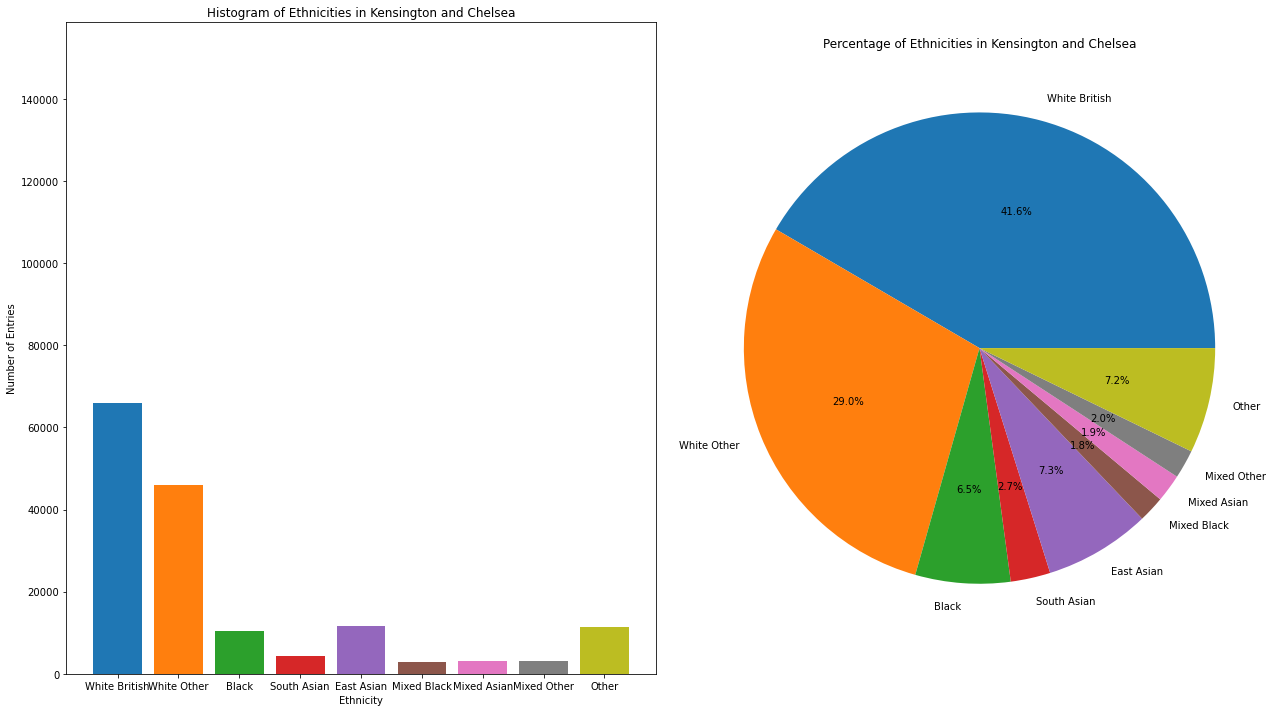

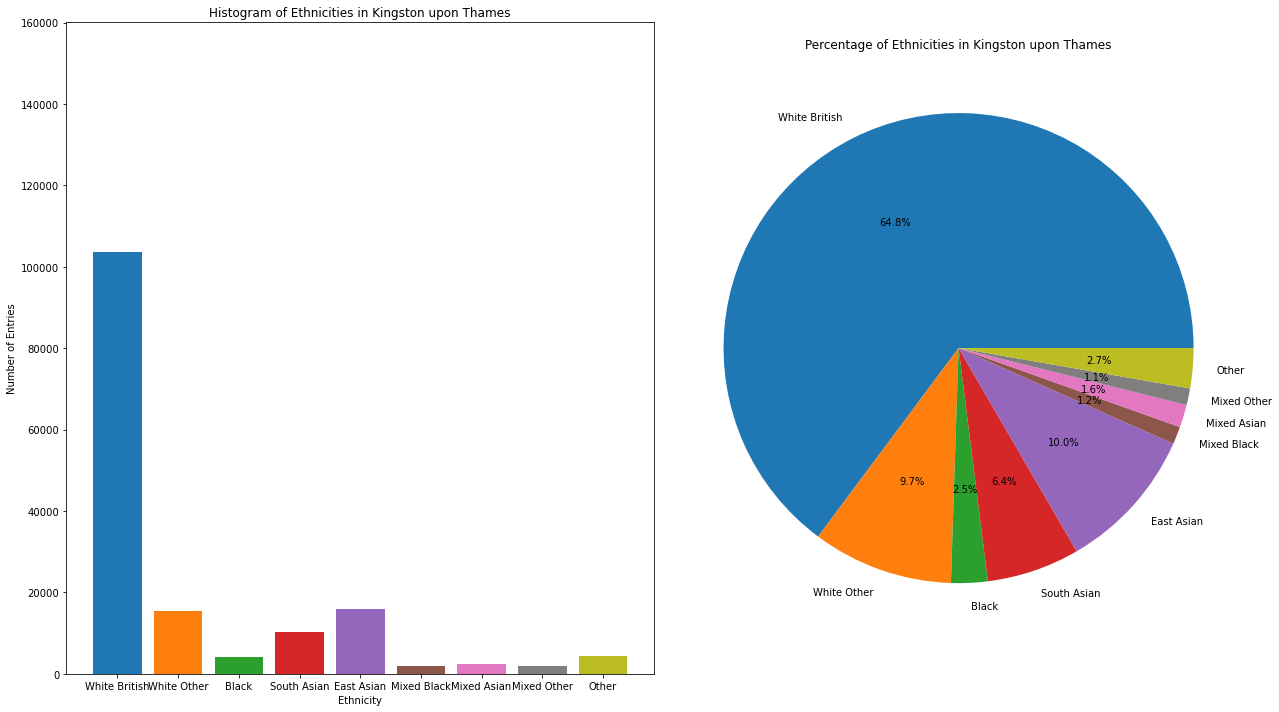

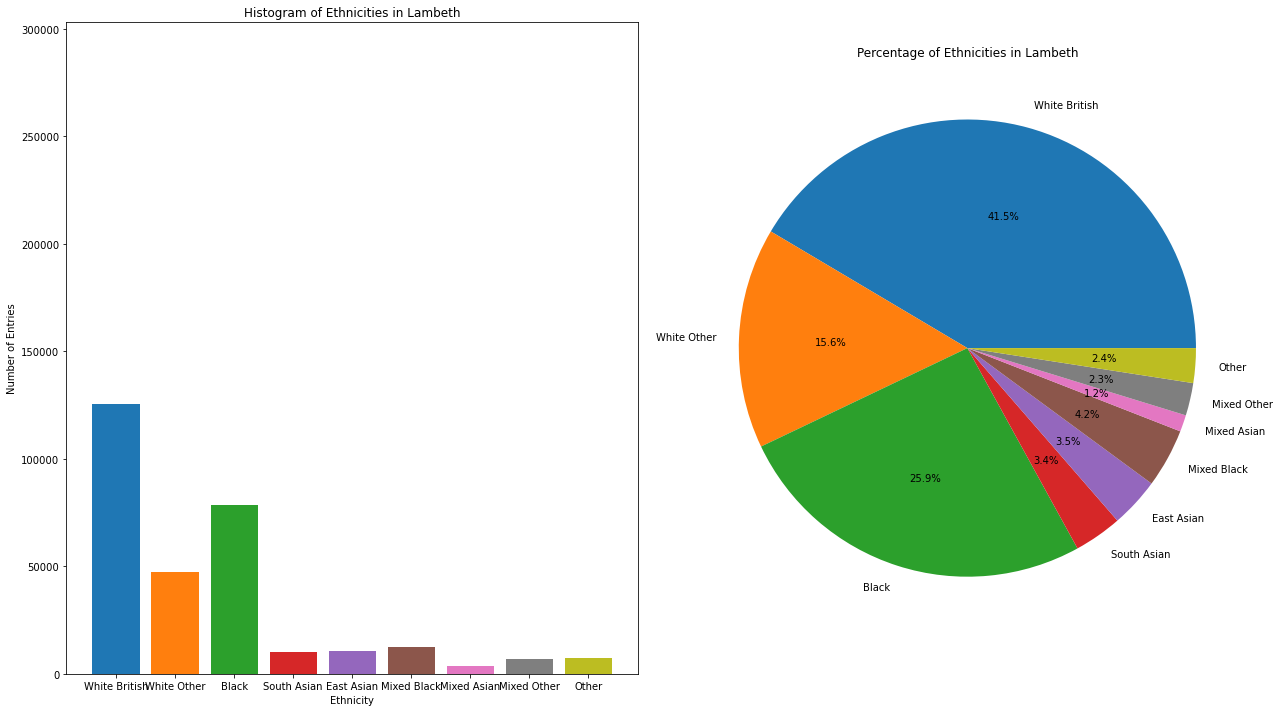

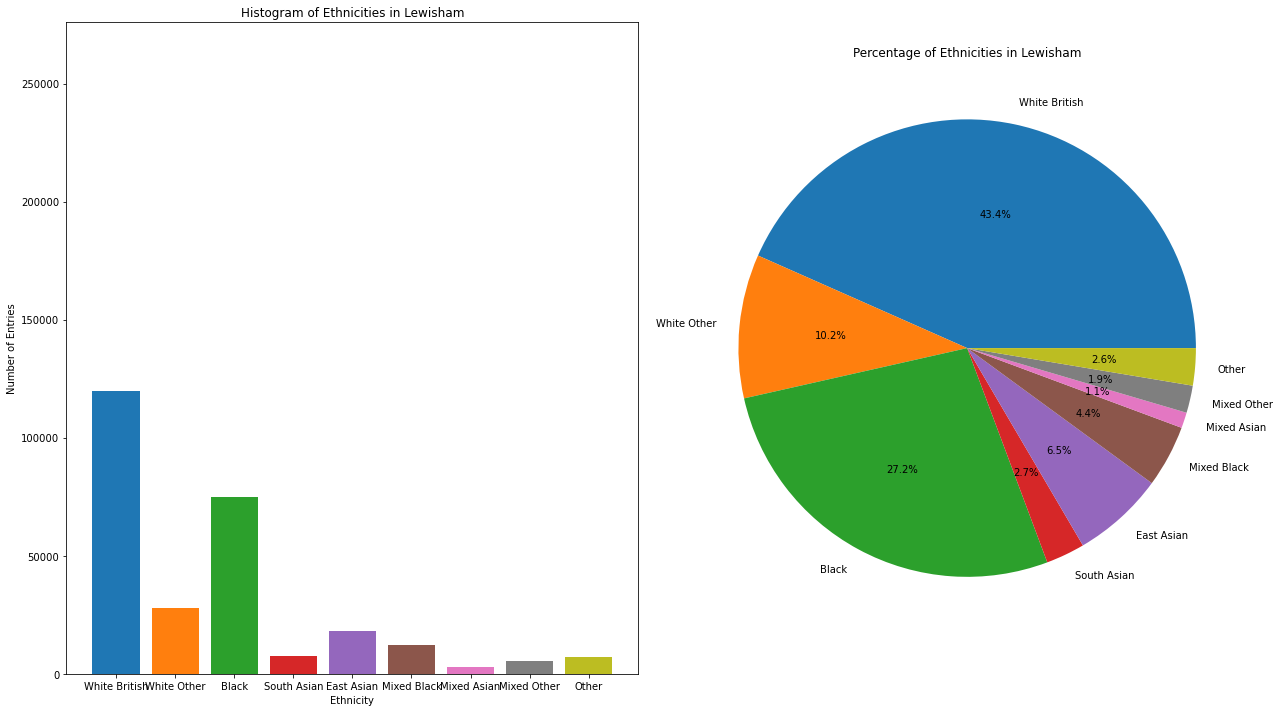

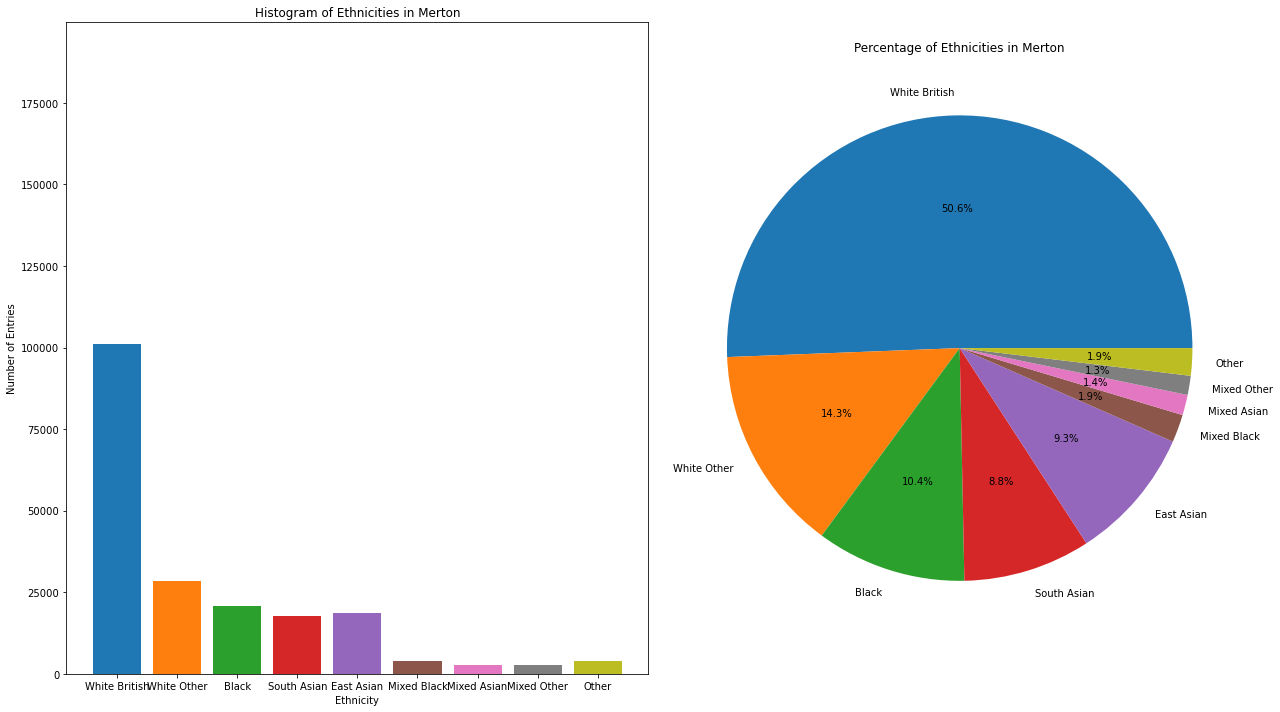

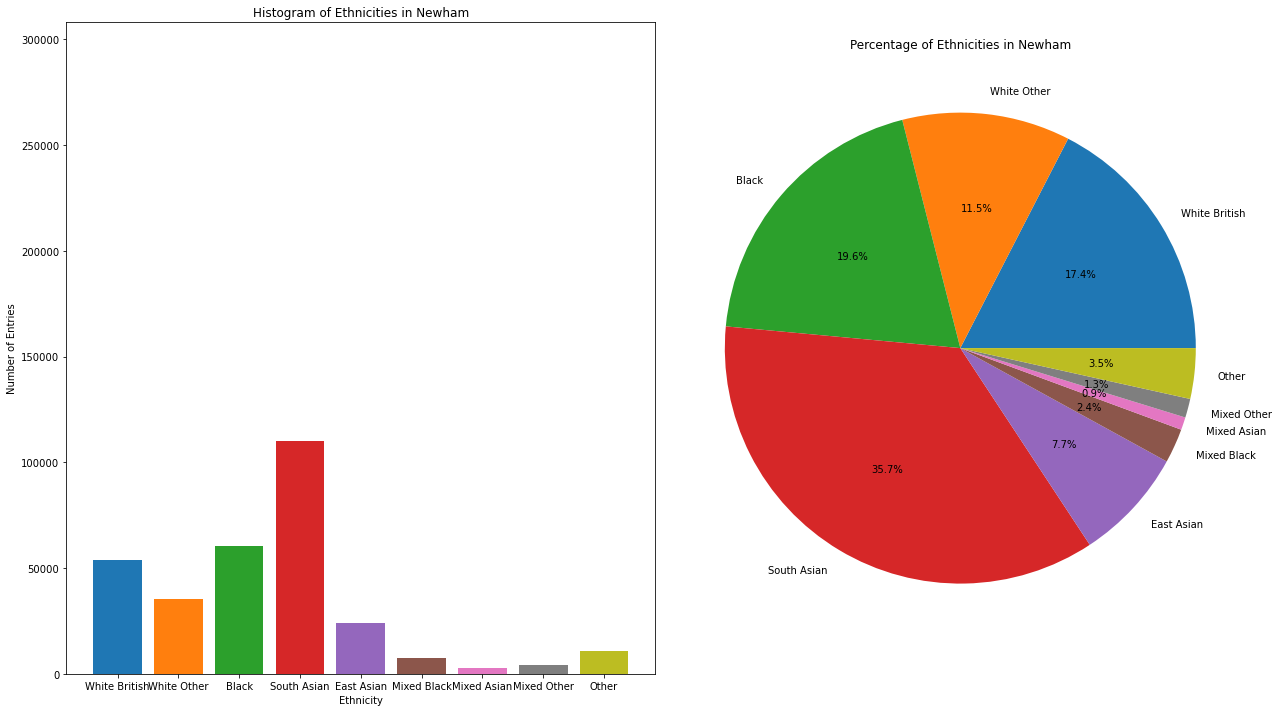

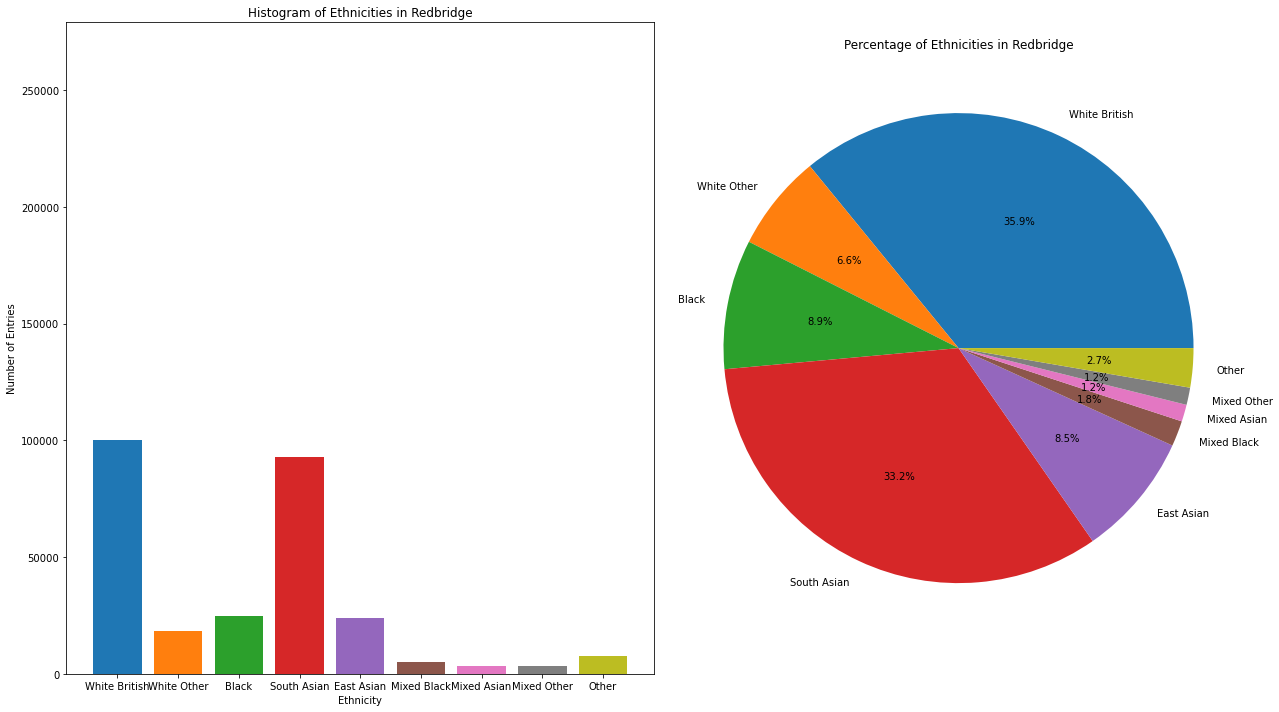

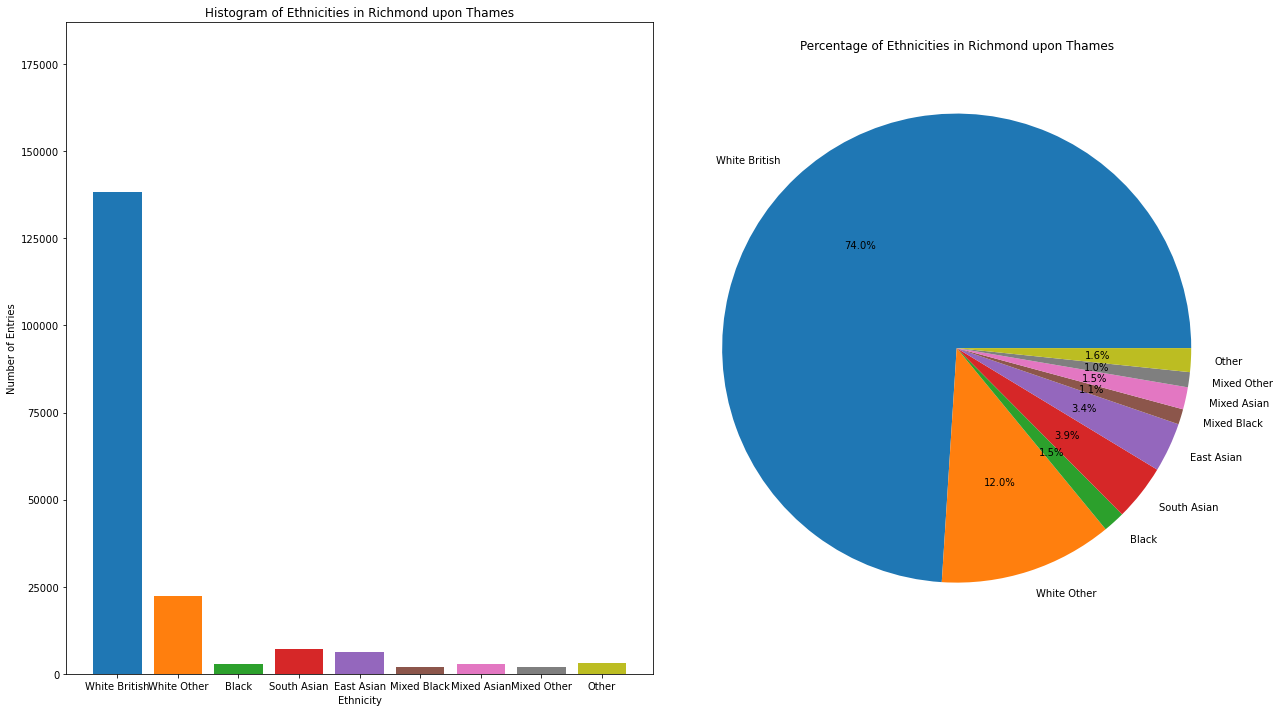

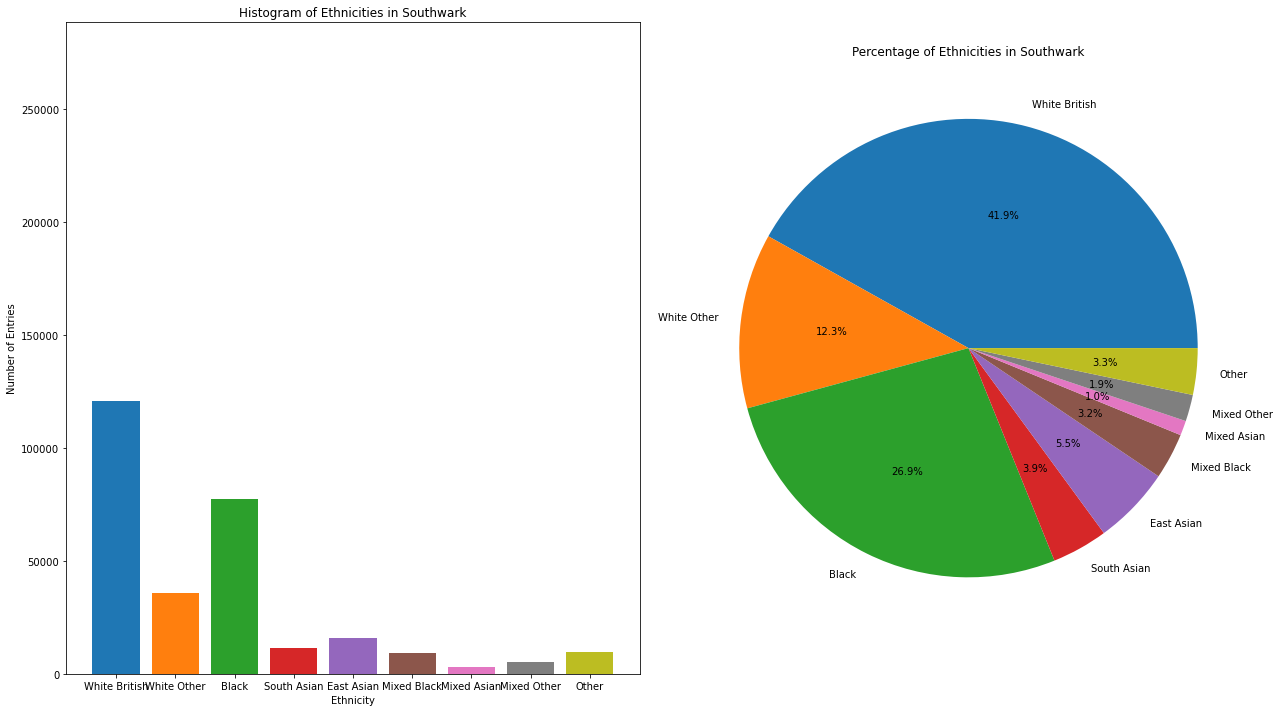

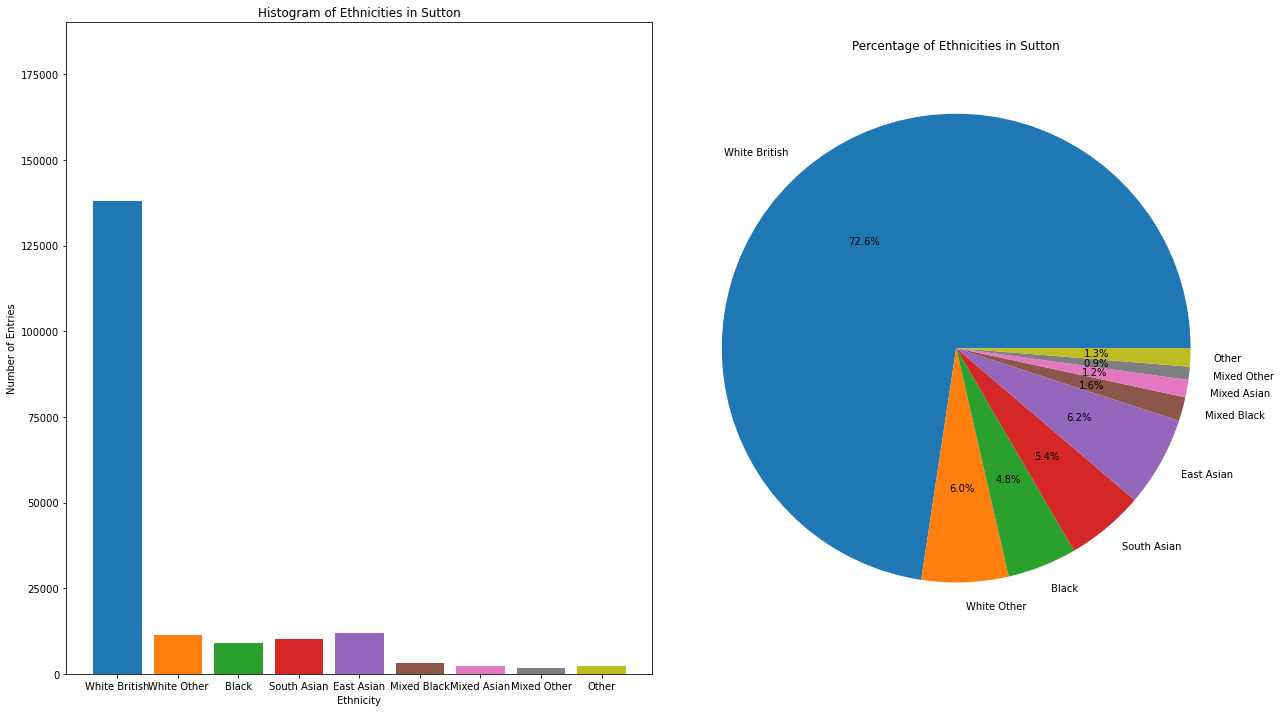

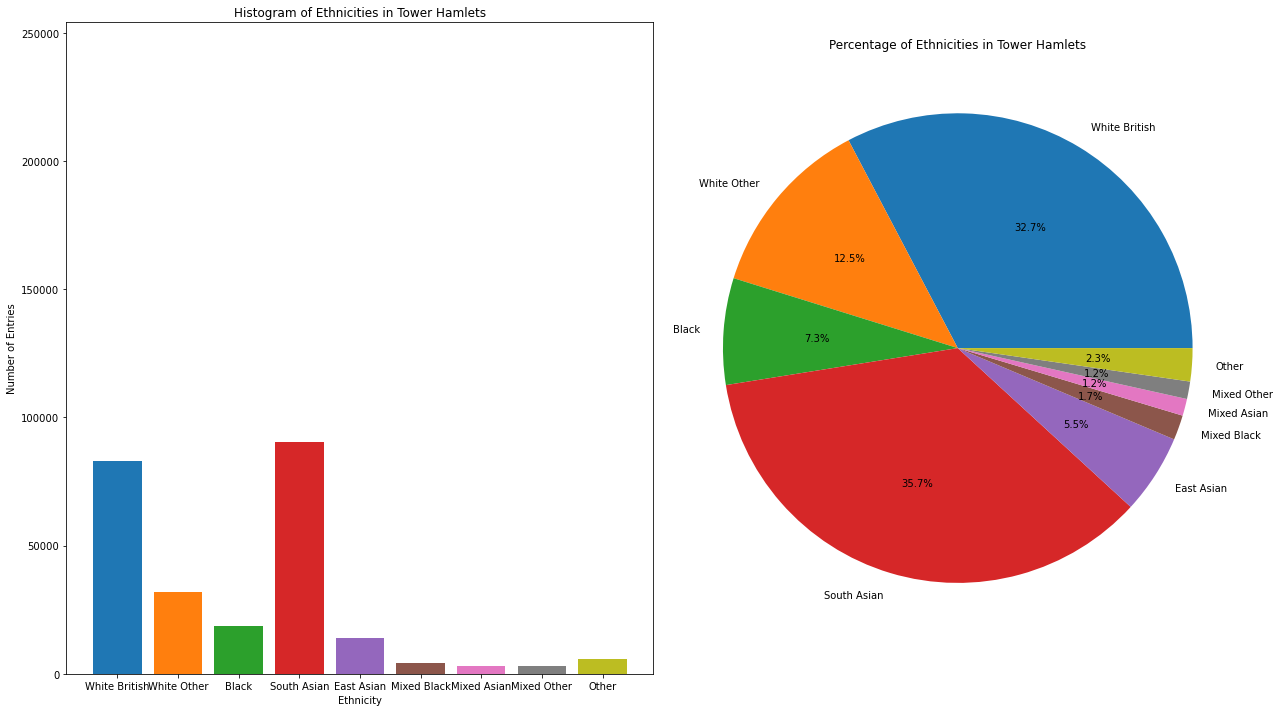

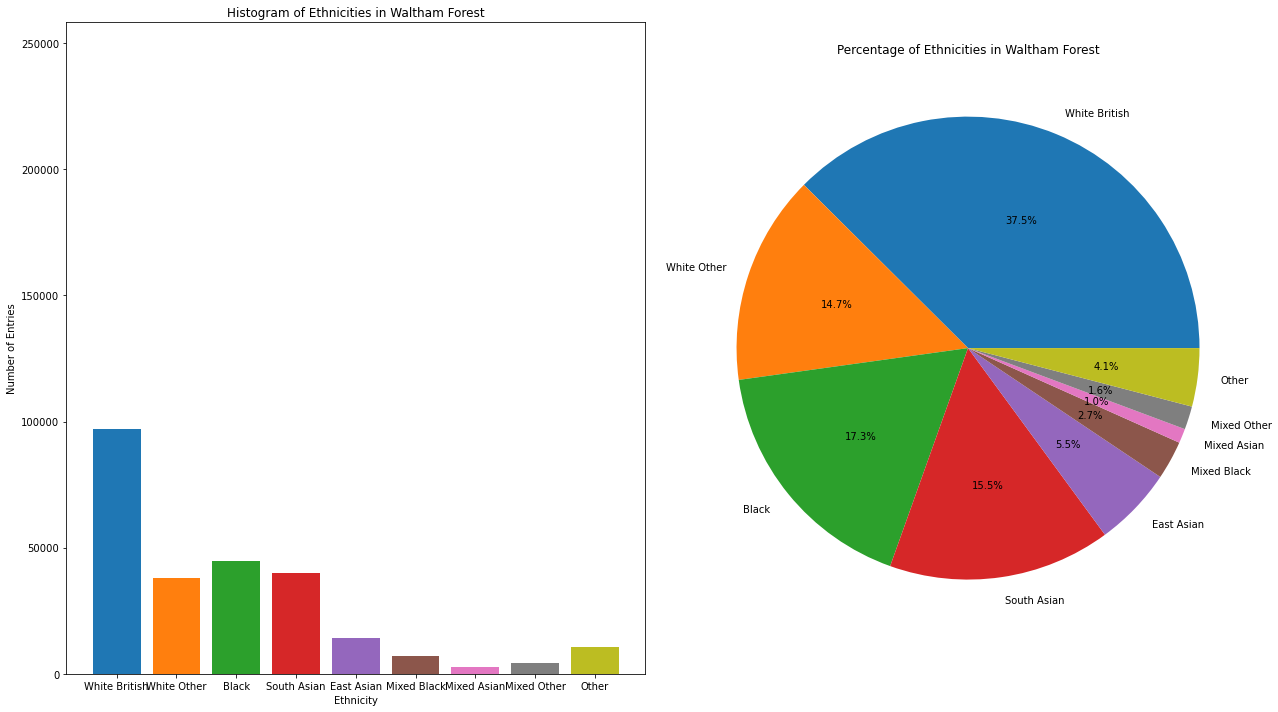

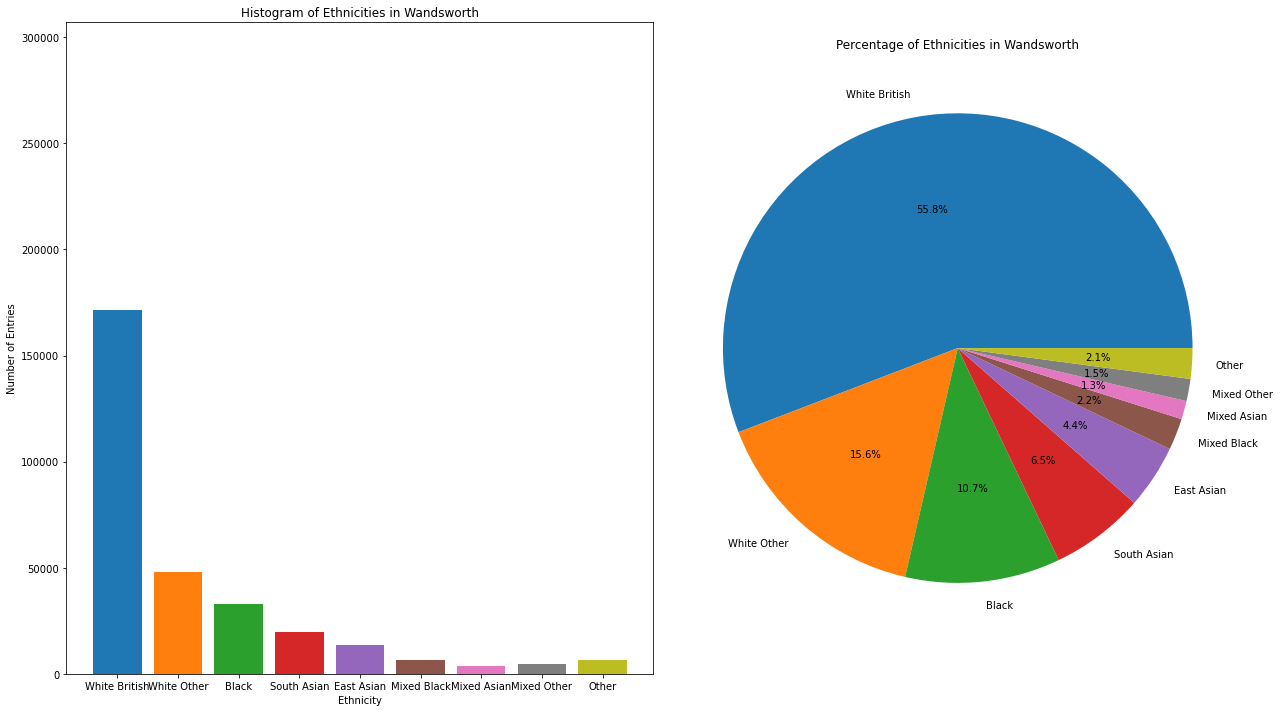

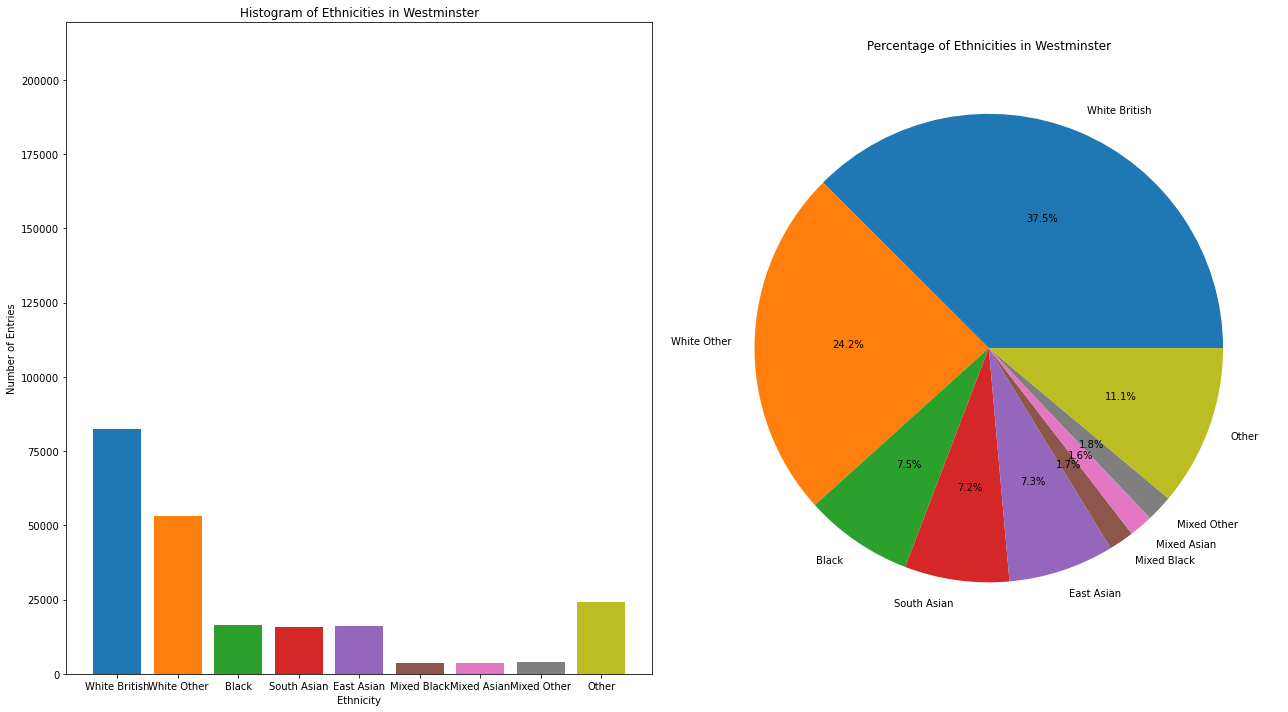

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2011_clean.csv")

# Get the list of boroughs
boroughs = data["Borough"].unique()

# Iterate over each borough
for borough in boroughs:
    # Get the data for the current borough
    borough_data = data[data["Borough"] == borough]

    # Calculate the total number of residents for the current borough
    total_residents = borough_data["Total Residents"].values[0]

    # Create a figure for the histograms and pie charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Generate the histogram for each ethnicity
    for ethnicity in ["White British", "White Other", "Black", "South Asian", "East Asian", "Mixed Black",
                      "Mixed Asian", "Mixed Other", "Other"]:
        count = borough_data[ethnicity].values[0]
        ax1.bar(ethnicity, count)

    ax1.set_xlabel("Ethnicity")
    ax1.set_ylabel("Number of Entries")
    ax1.set_title(f"Histogram of Ethnicities in {borough}")
    ax1.set_ylim(0, total_residents)

    # Generate the pie chart for each ethnicity
    percentages = [borough_data[ethnicity].values[0] / total_residents * 100 for ethnicity in
                   ["White British", "White Other", "Black", "South Asian", "East Asian", "Mixed Black",
                    "Mixed Asian", "Mixed Other", "Other"]]
    labels = ["White British", "White Other", "Black", "South Asian", "East Asian", "Mixed Black",
              "Mixed Asian", "Mixed Other", "Other"]
    ax2.pie(percentages, labels=labels, autopct="%1.1f%%")
    ax2.set_title(f"Percentage of Ethnicities in {borough}")

    # Adjust figure size for better visibility of labels
    fig.set_size_inches(18, 10)

    # Show the histograms and pie charts
    plt.tight_layout()
    plt.show()

## Charts about the ethnicity in each Borough for 2021

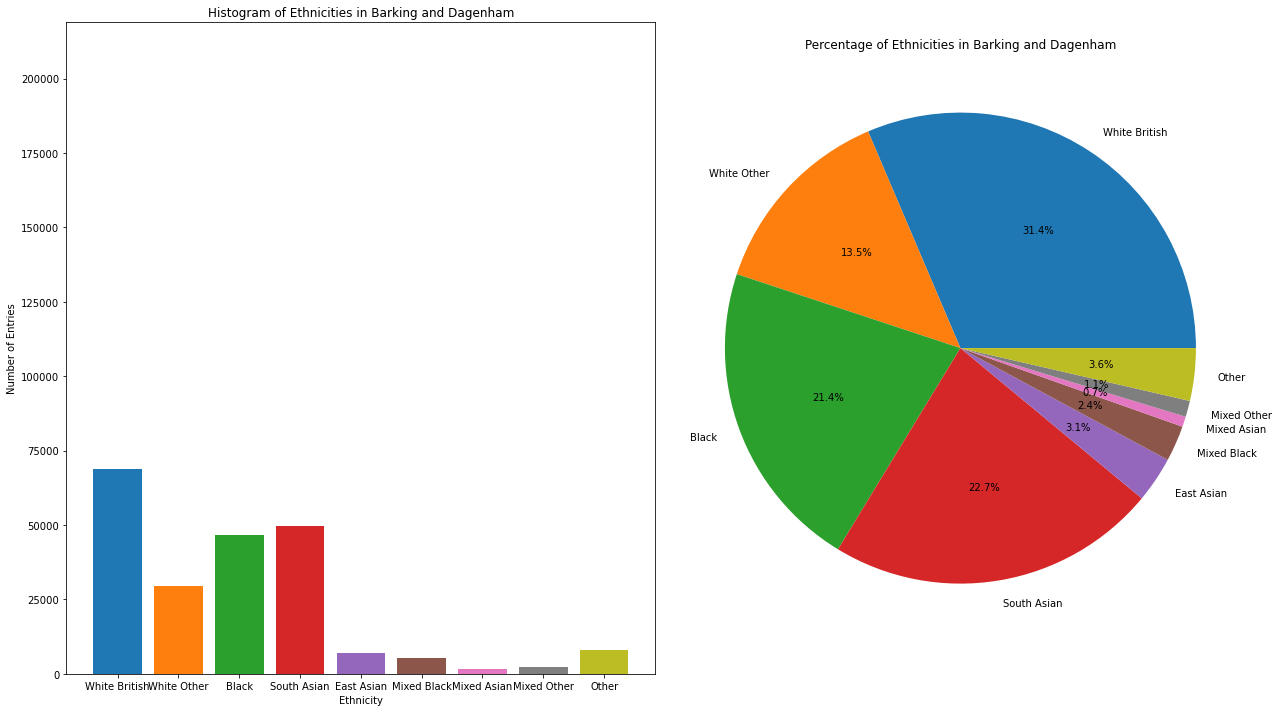

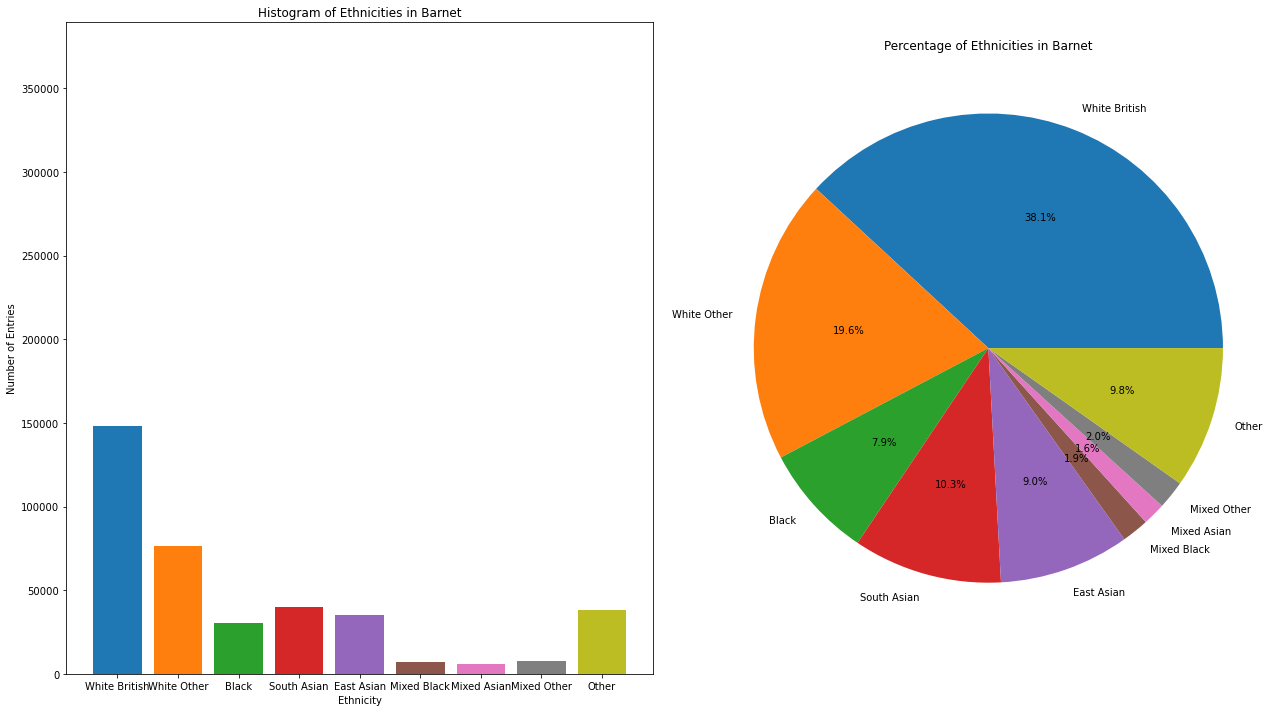

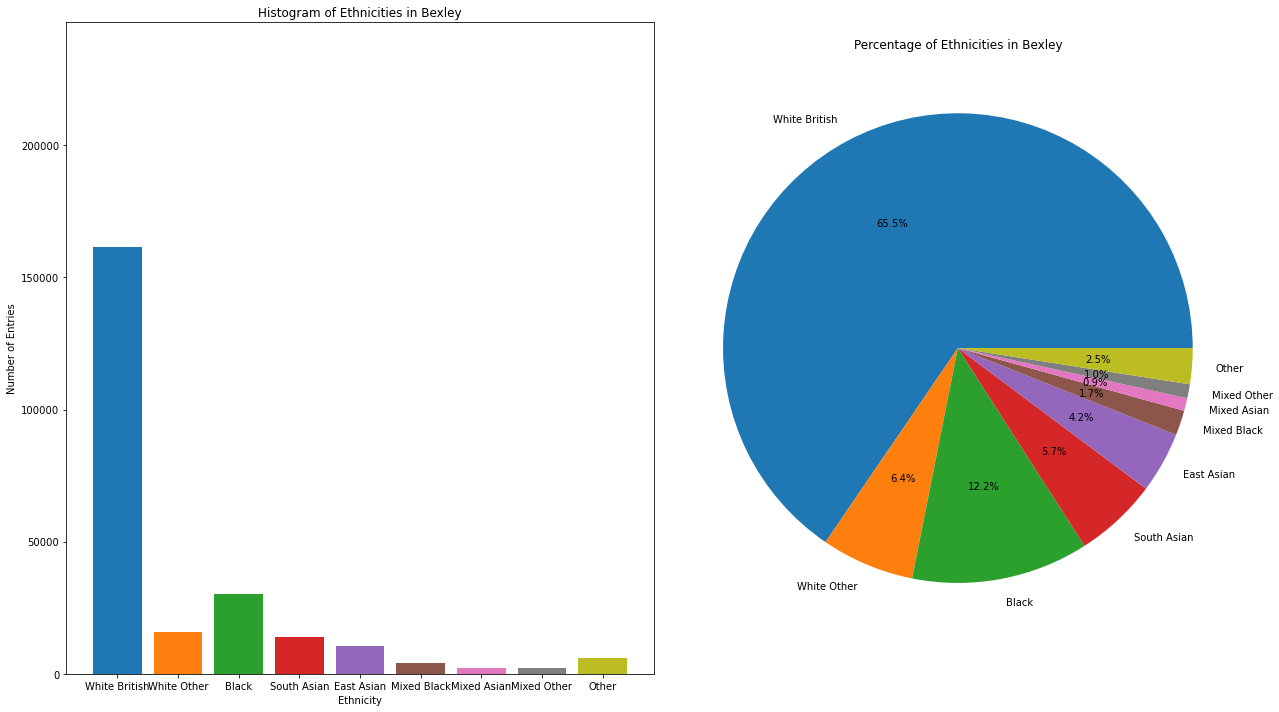

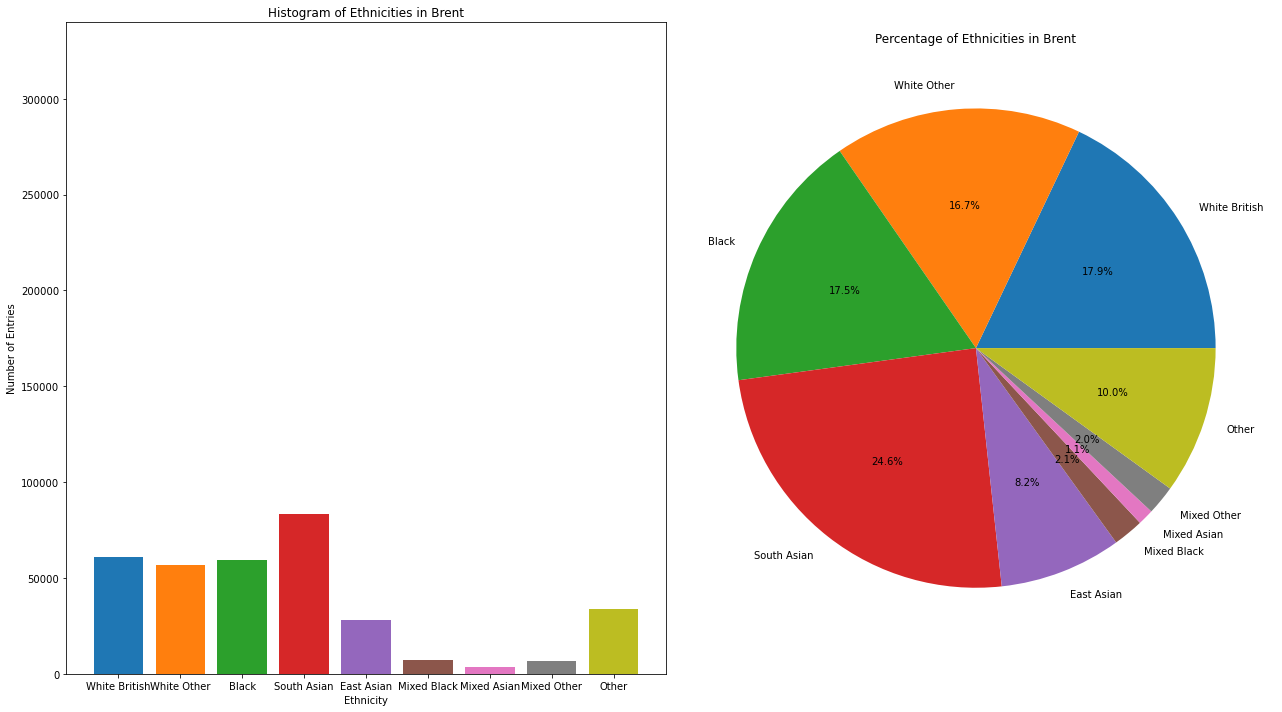

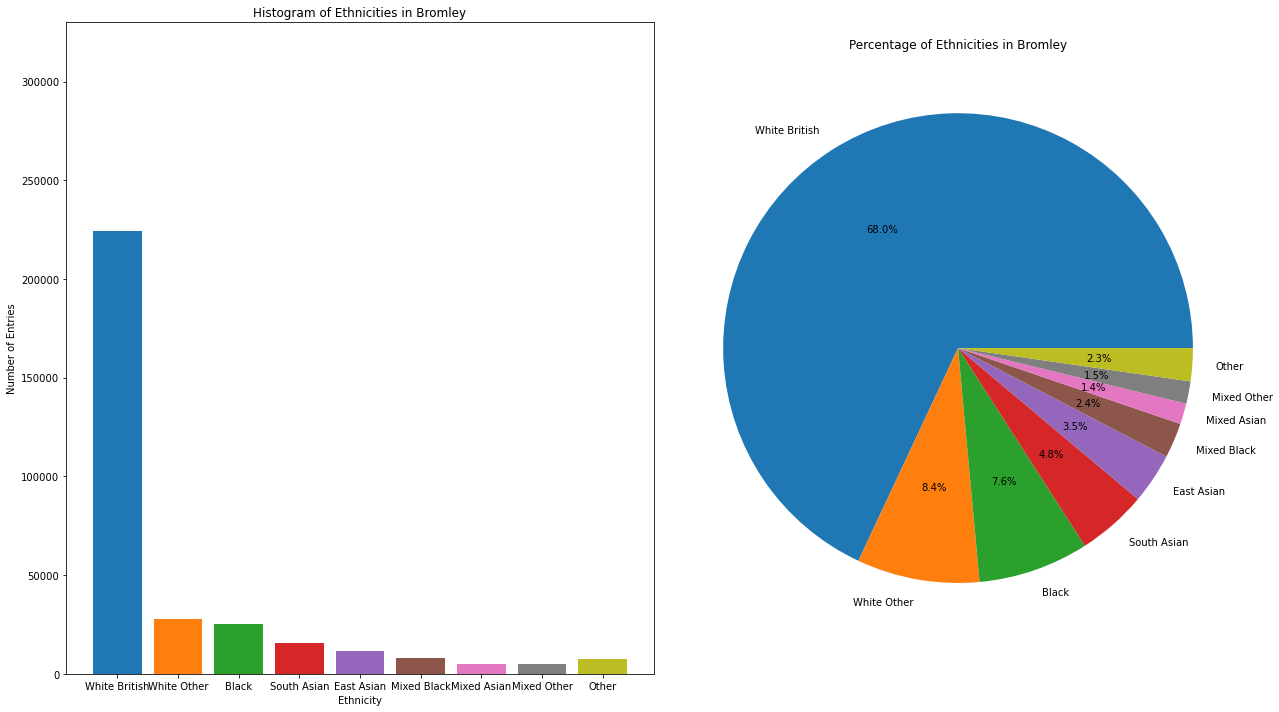

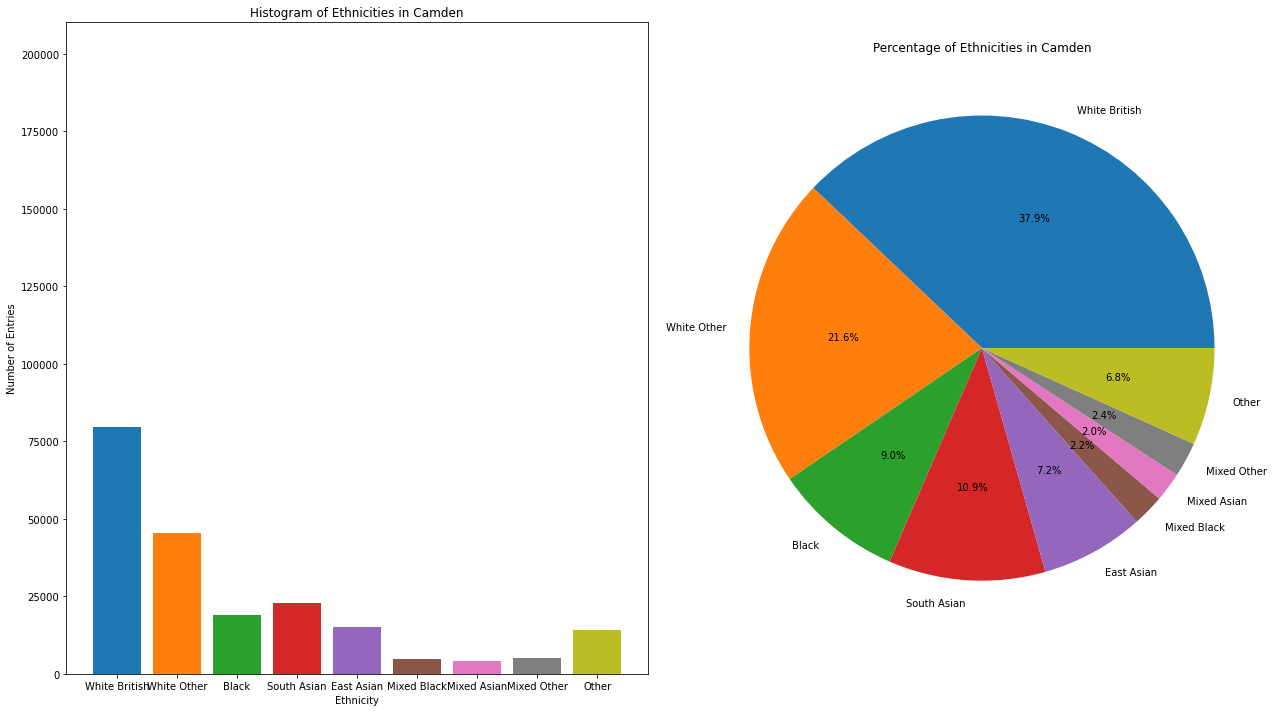

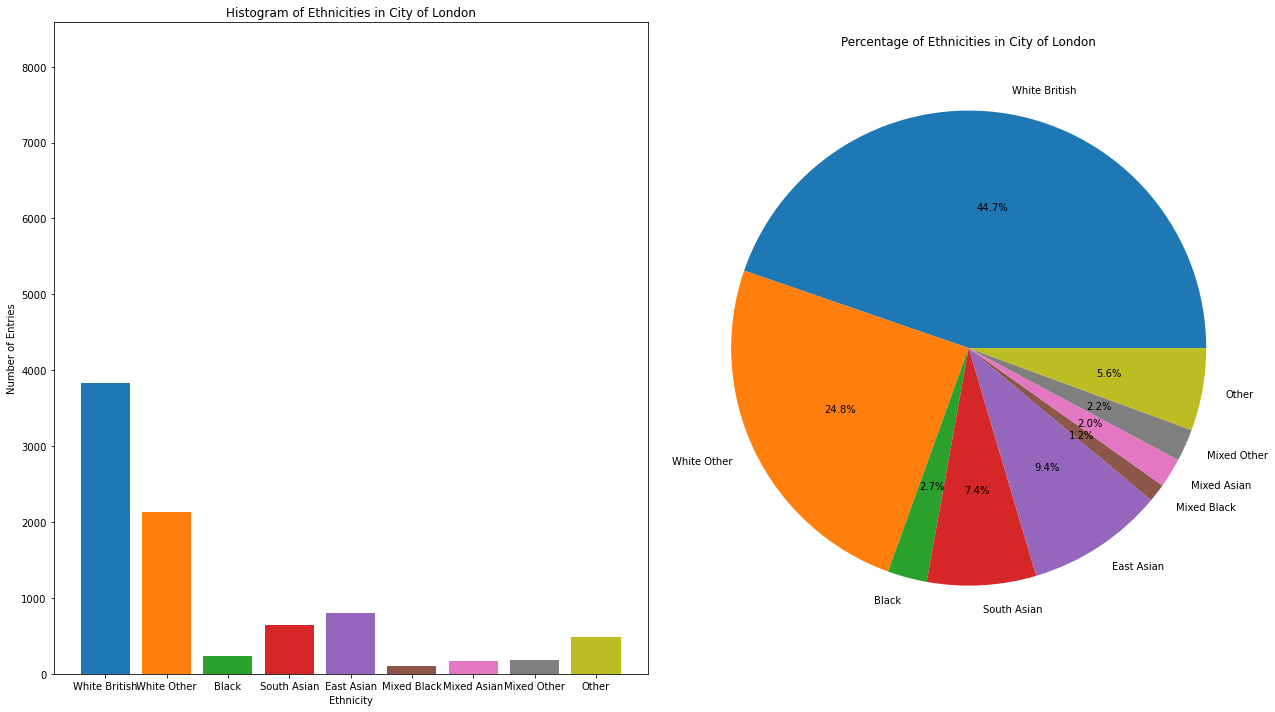

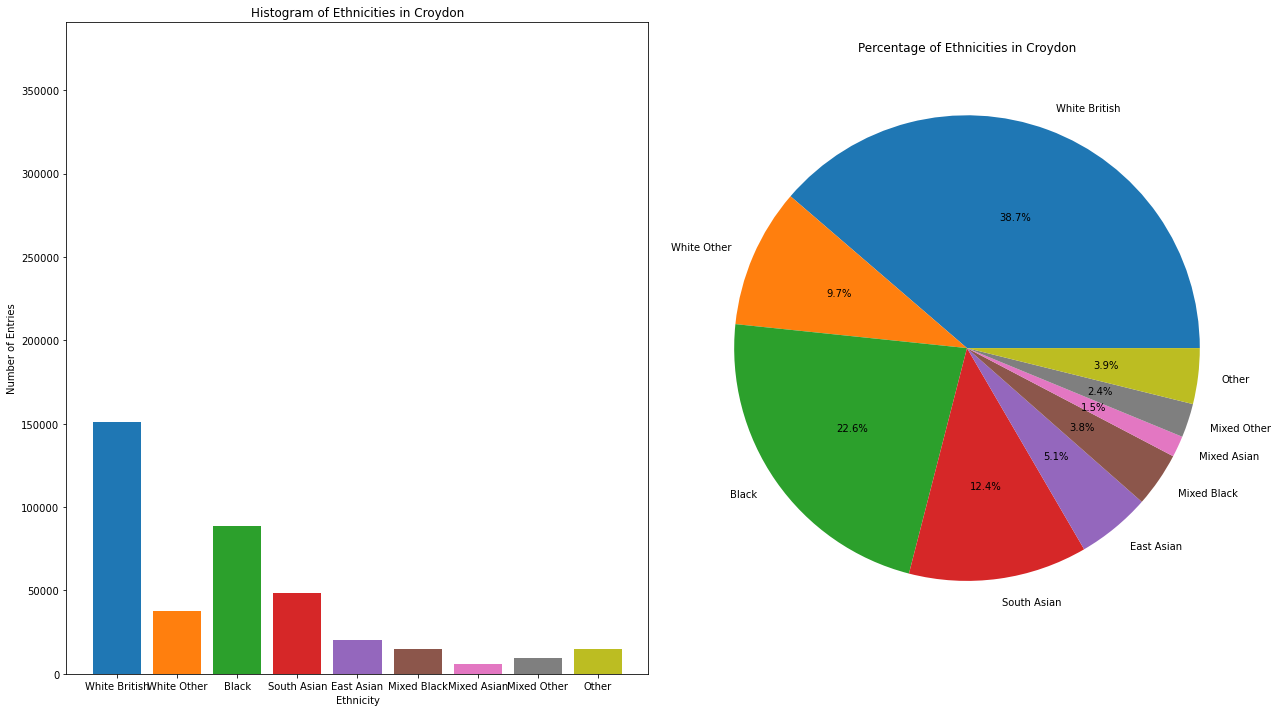

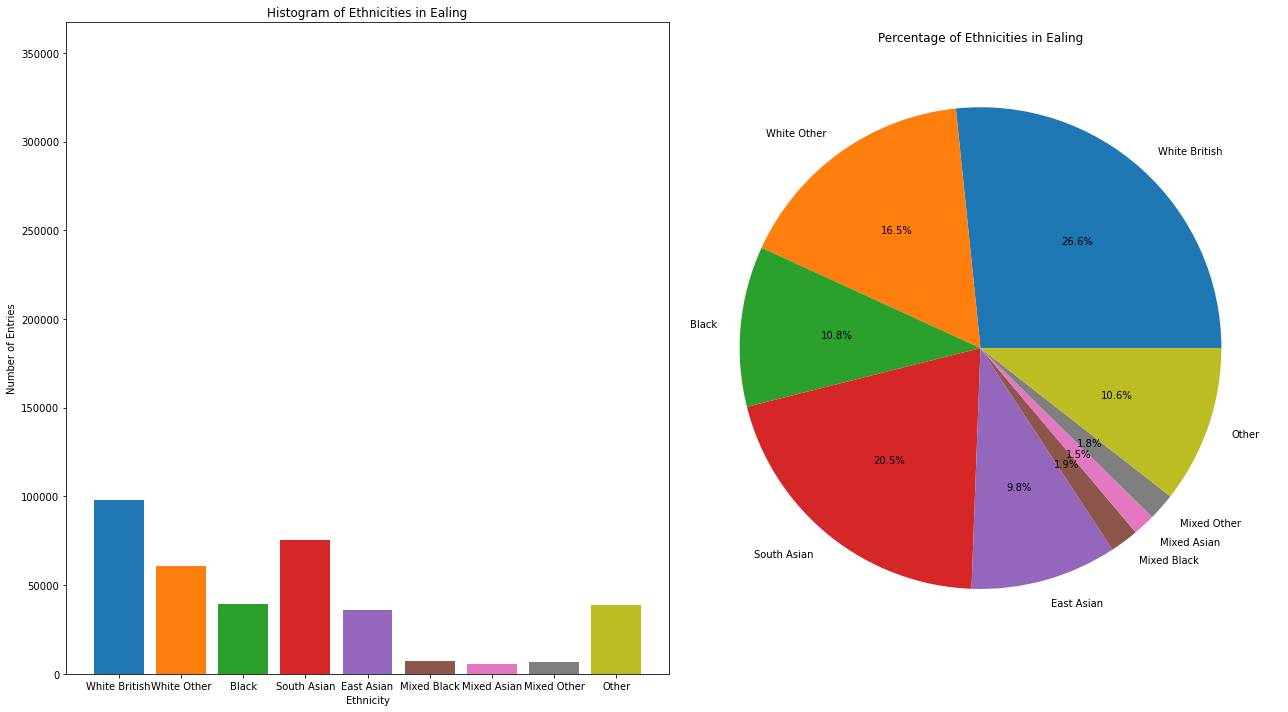

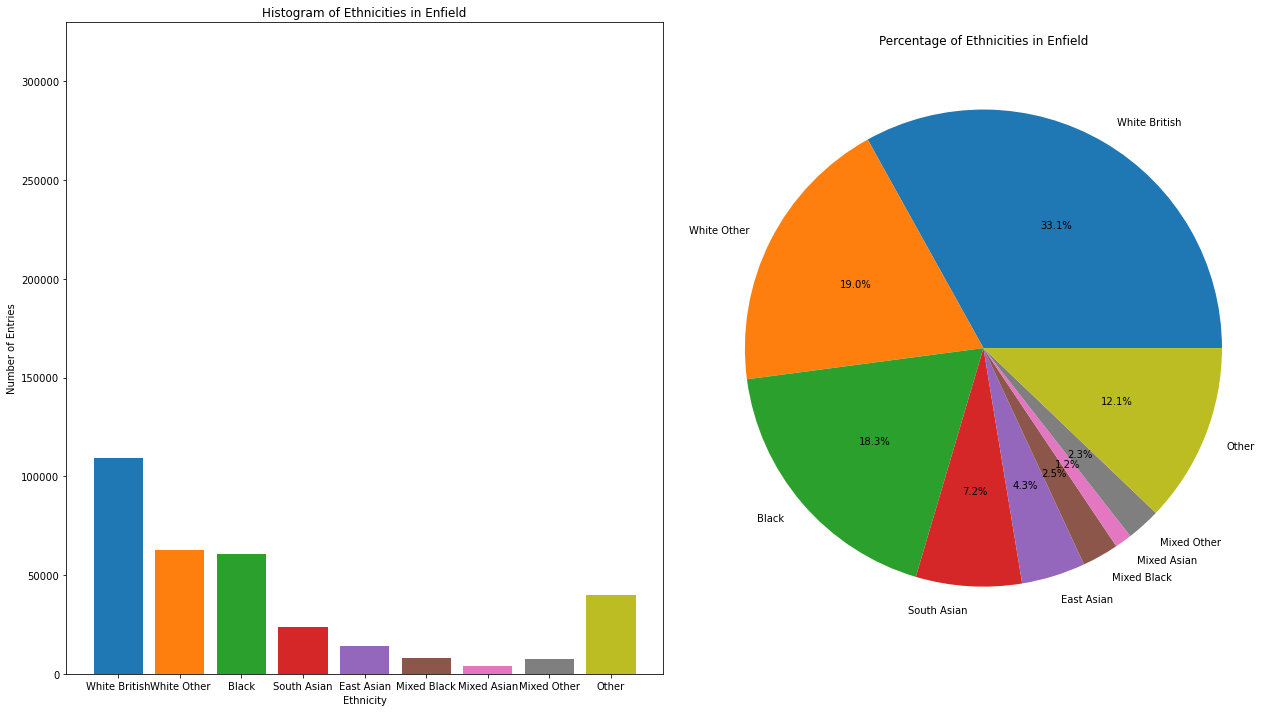

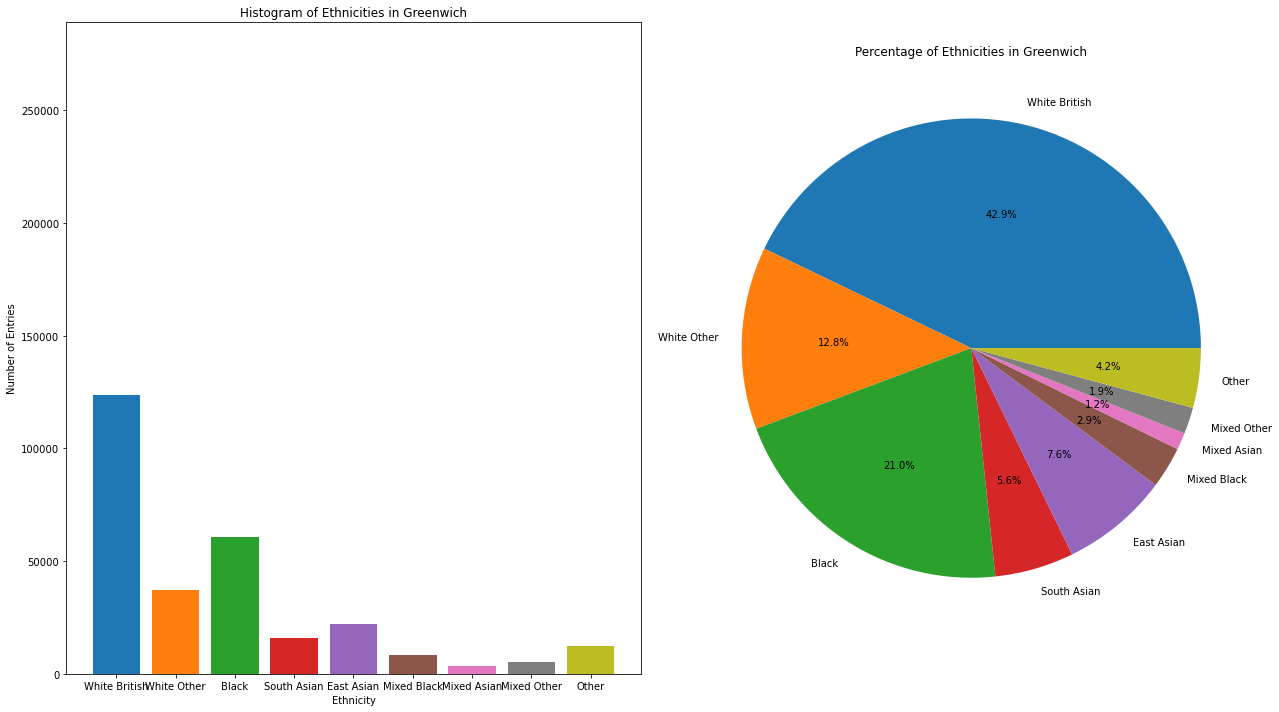

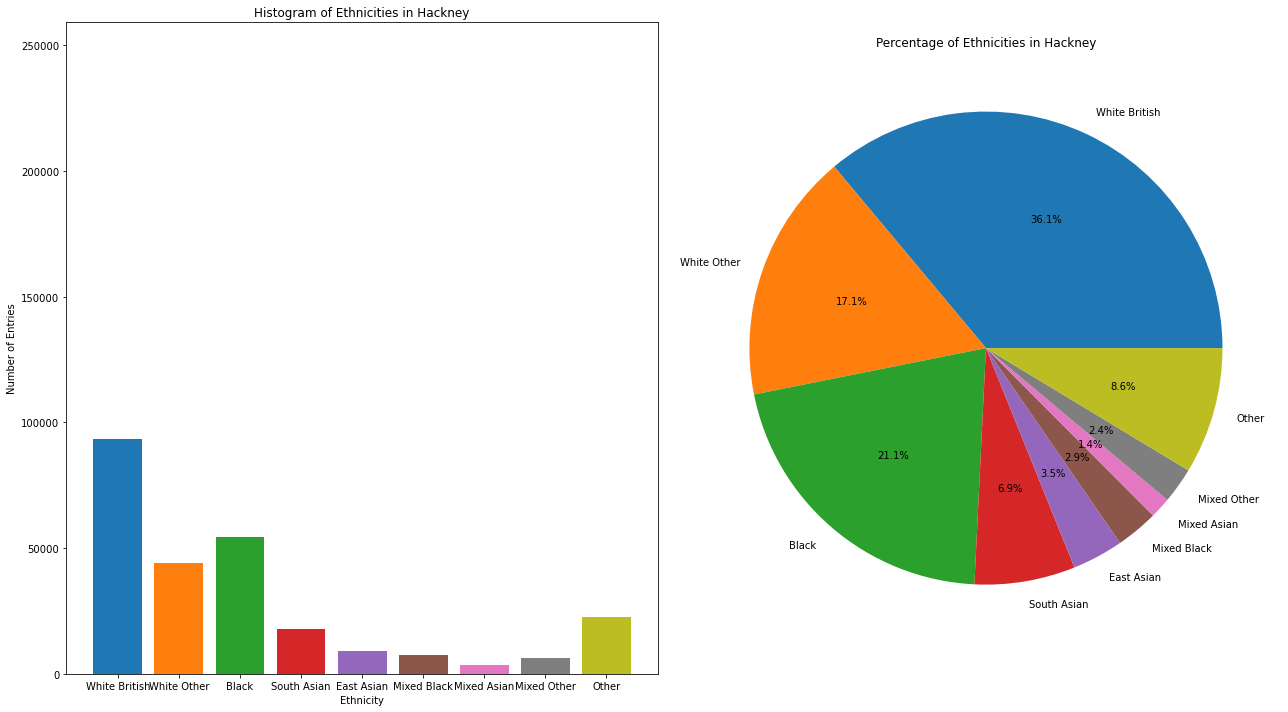

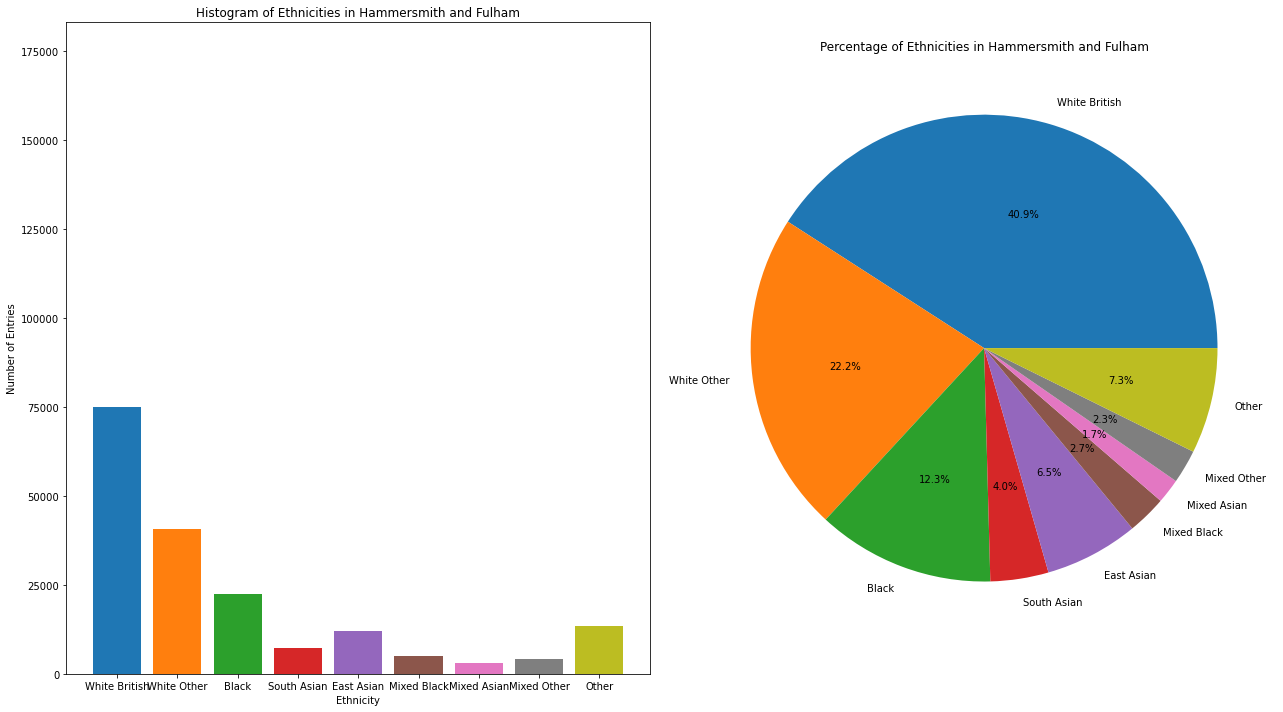

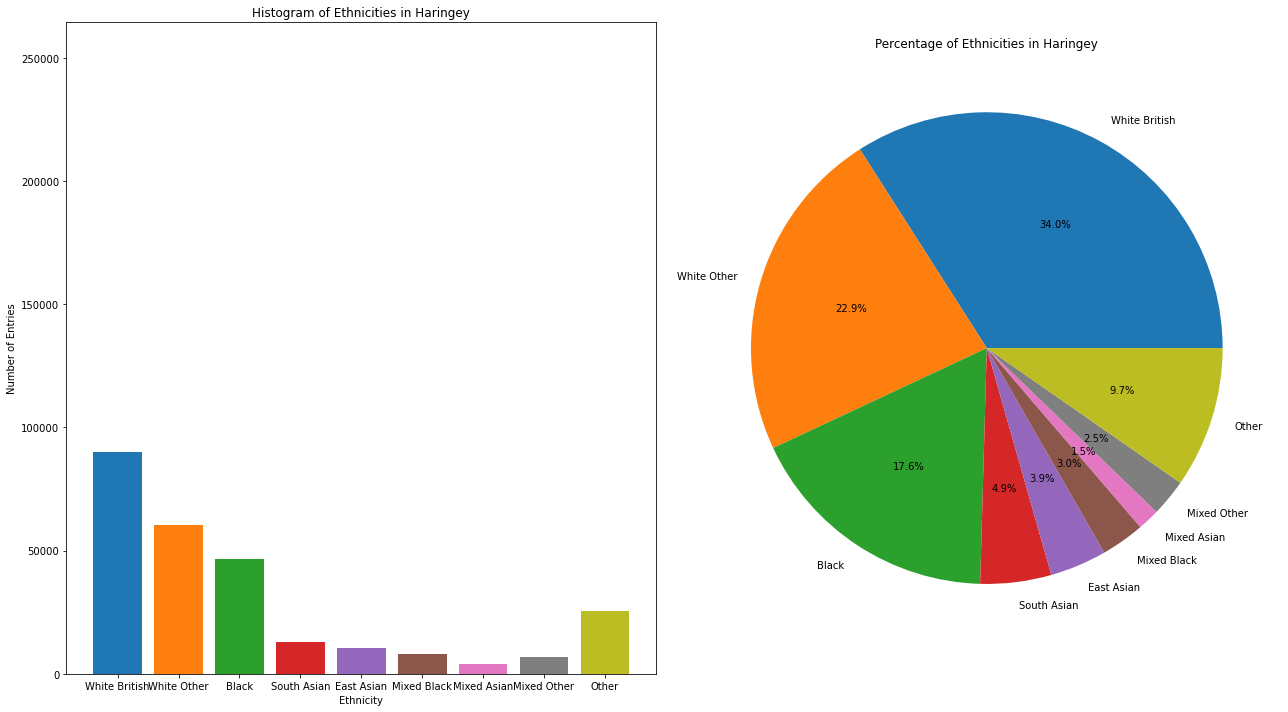

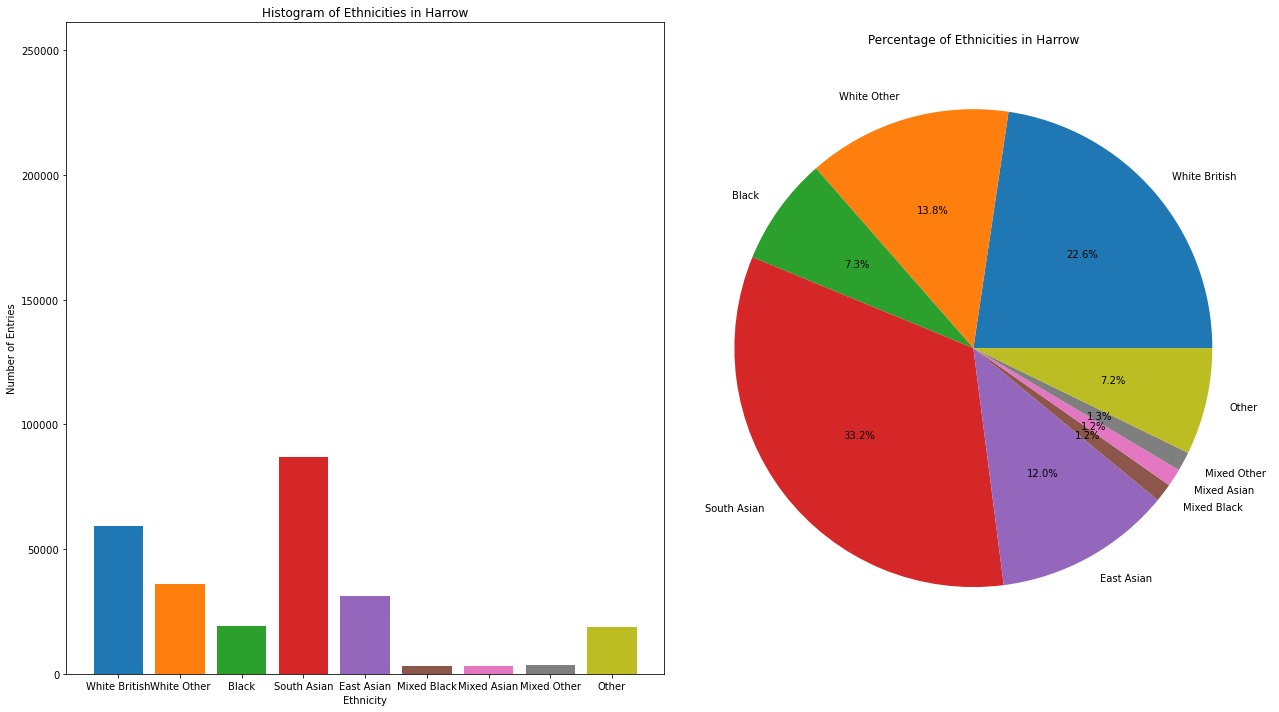

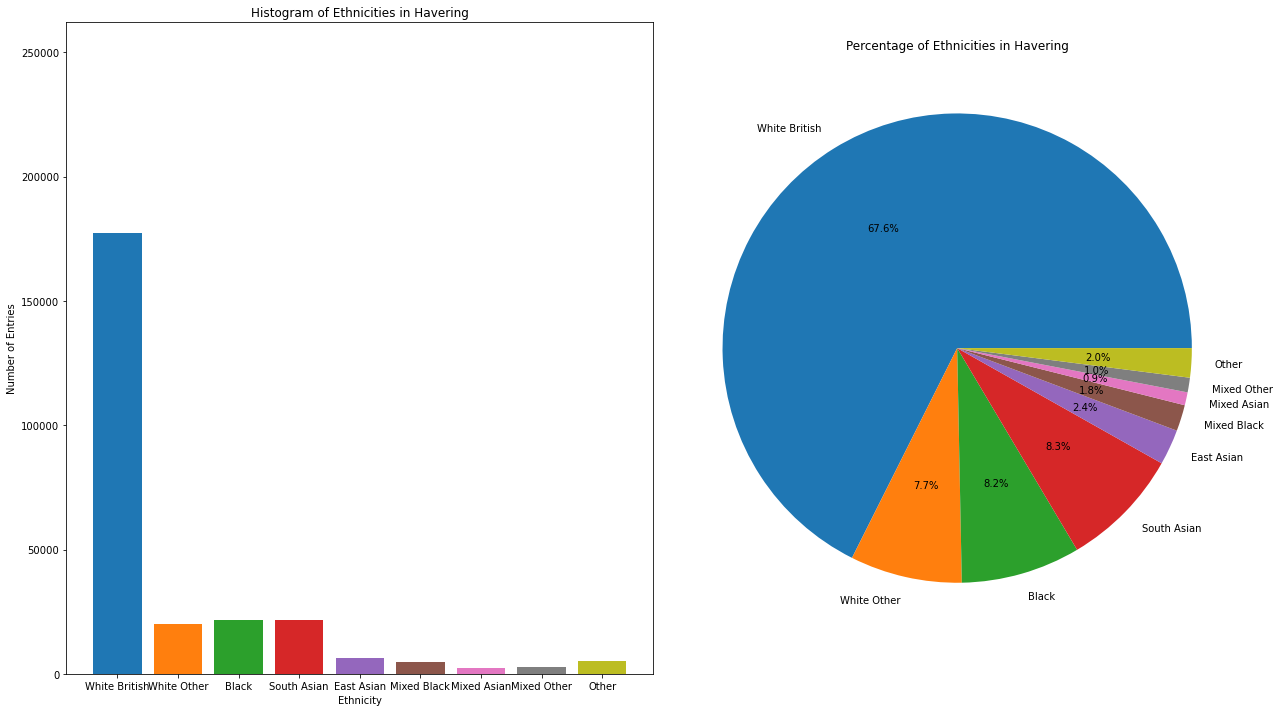

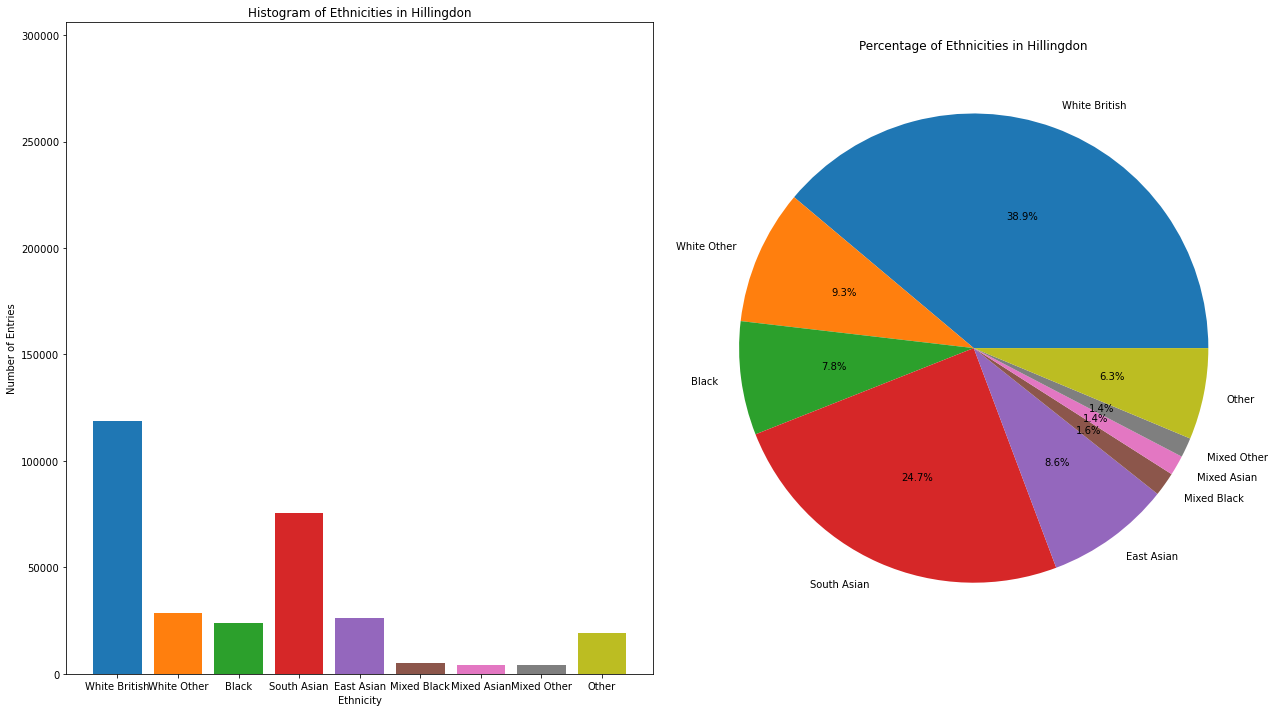

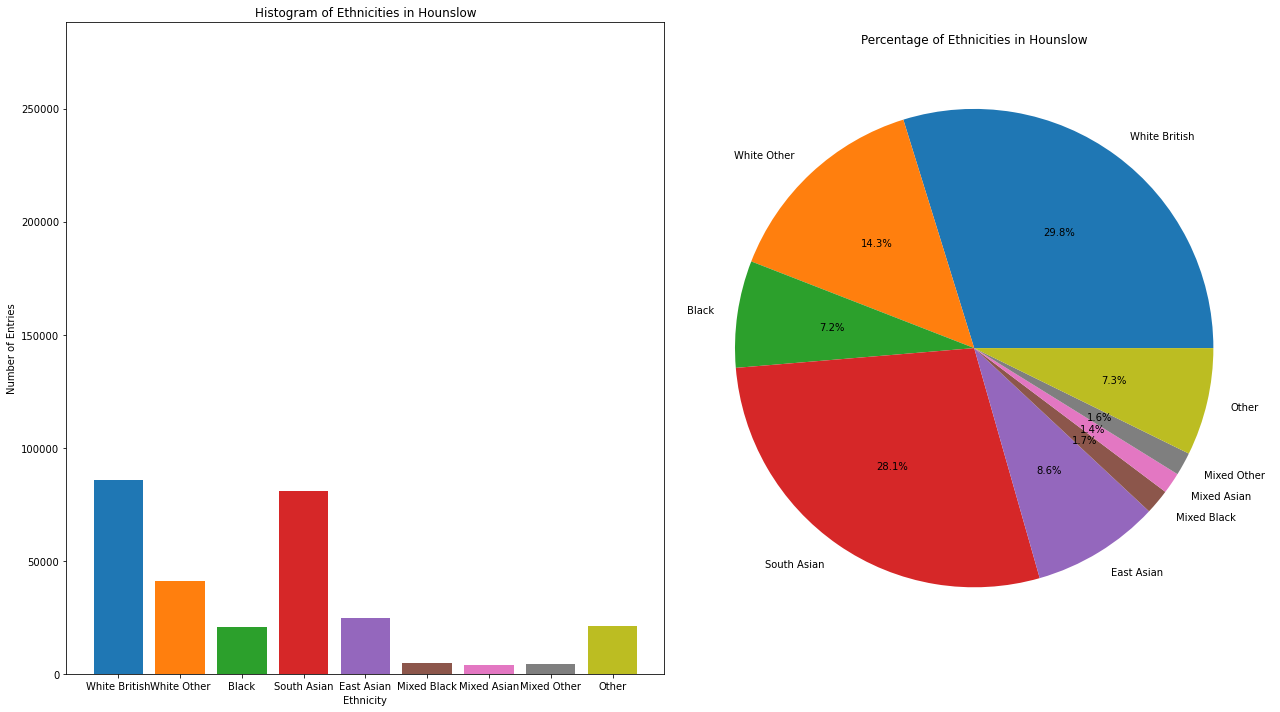

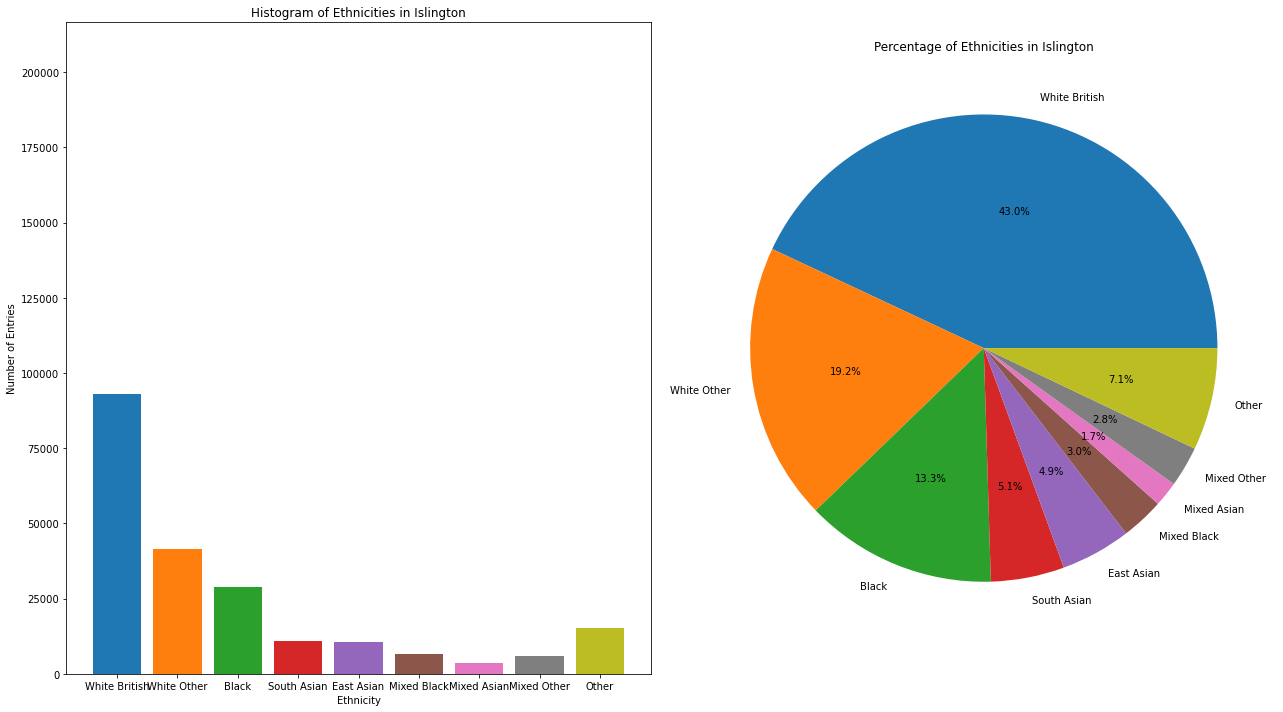

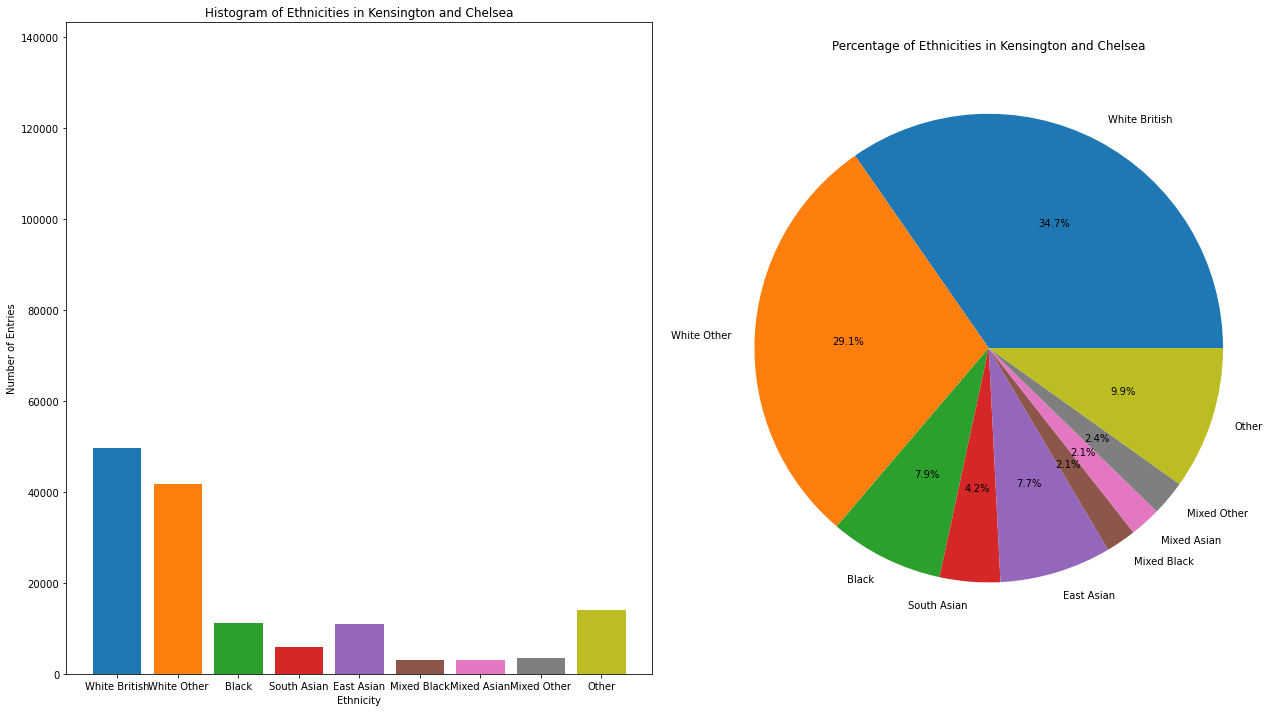

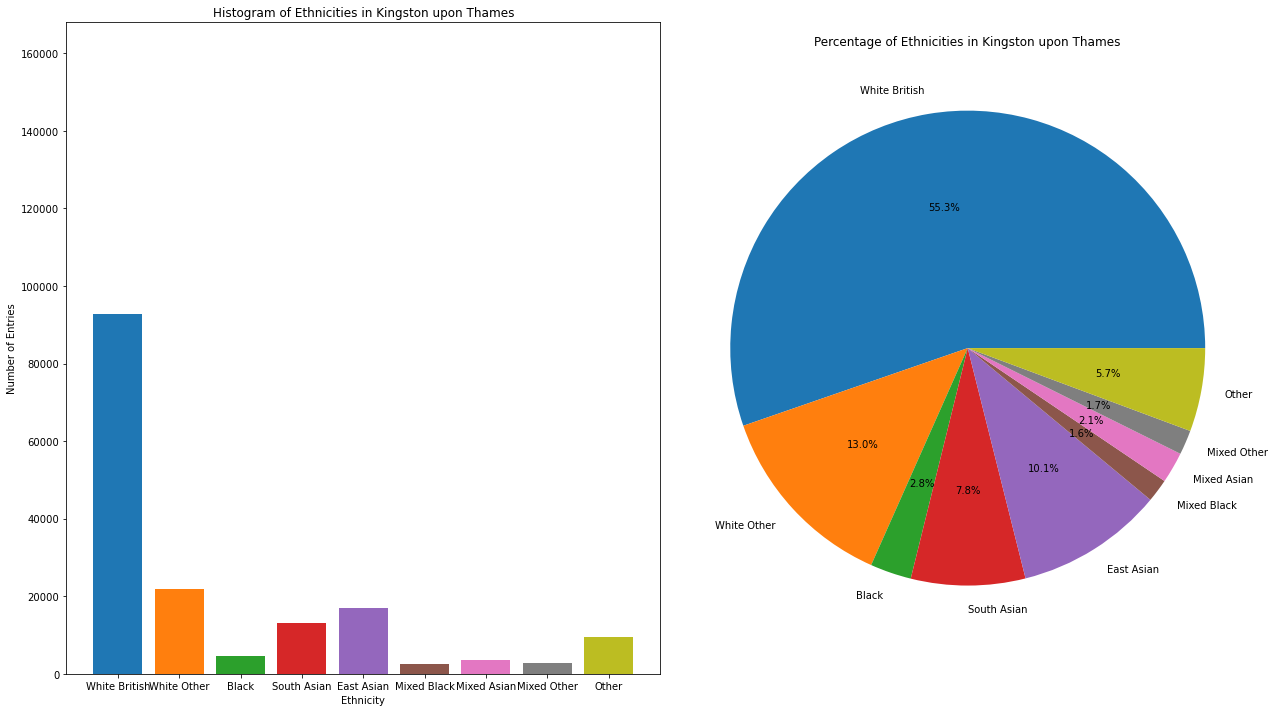

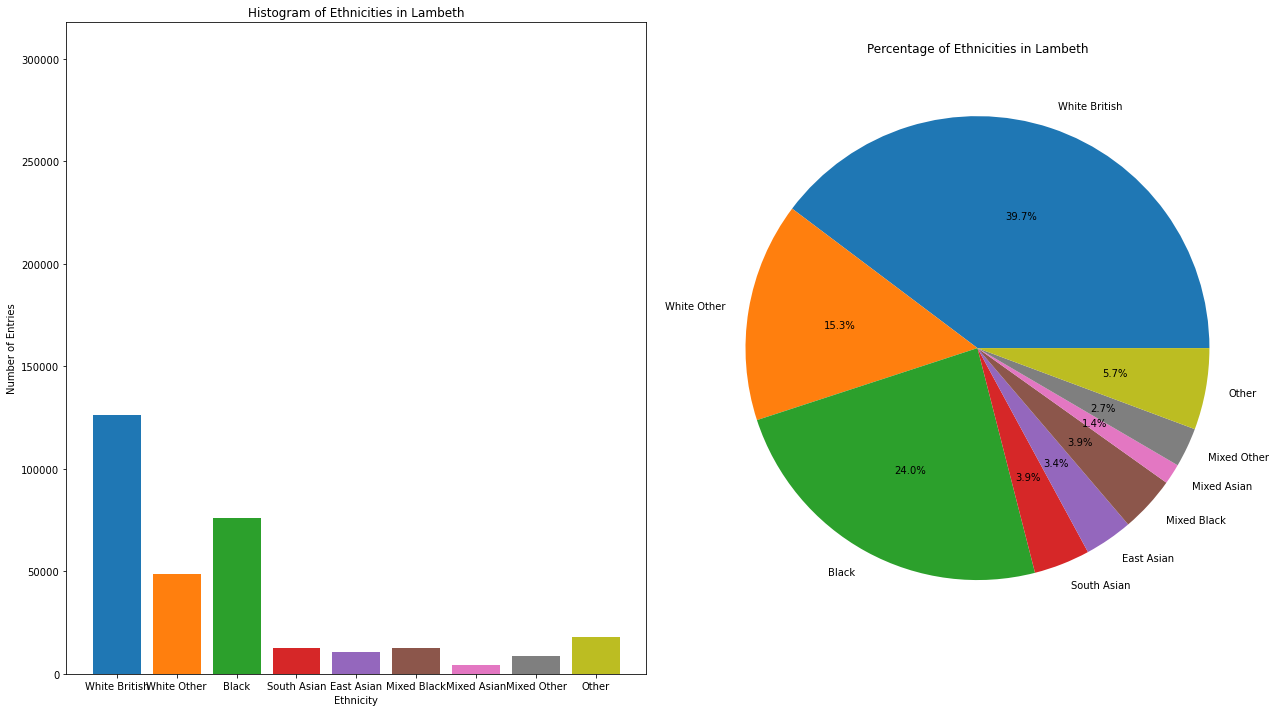

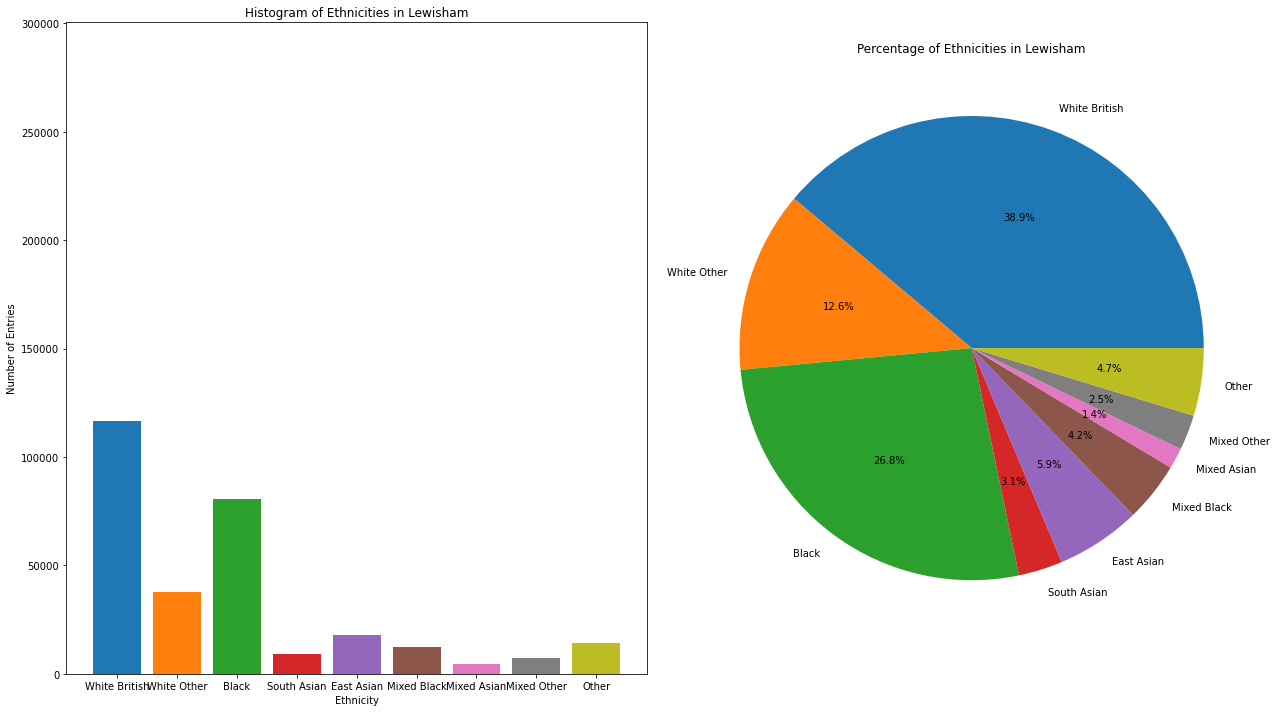

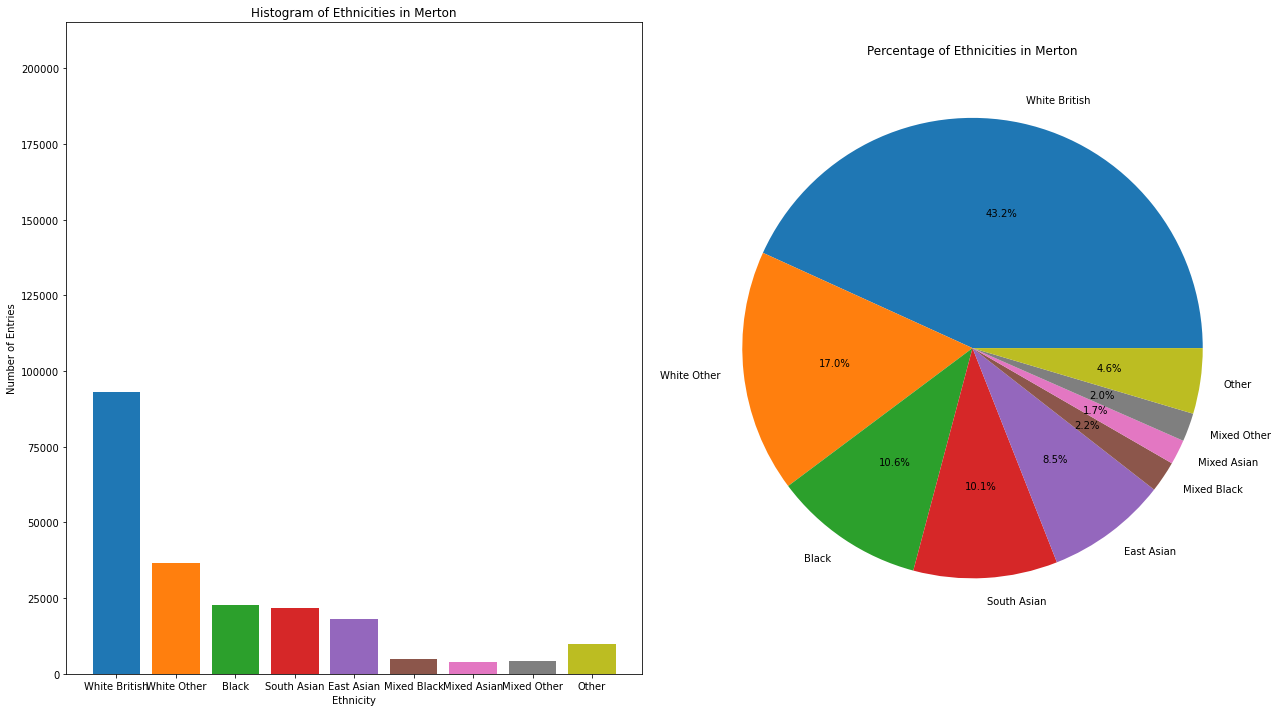

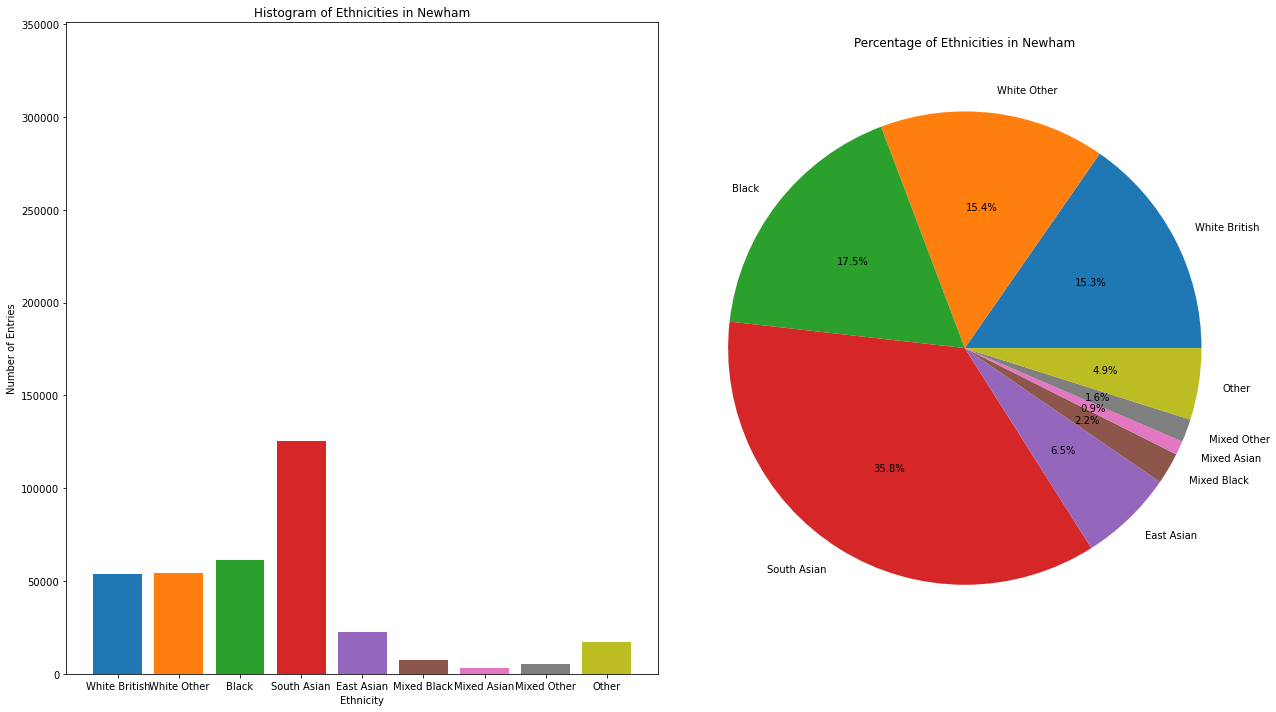

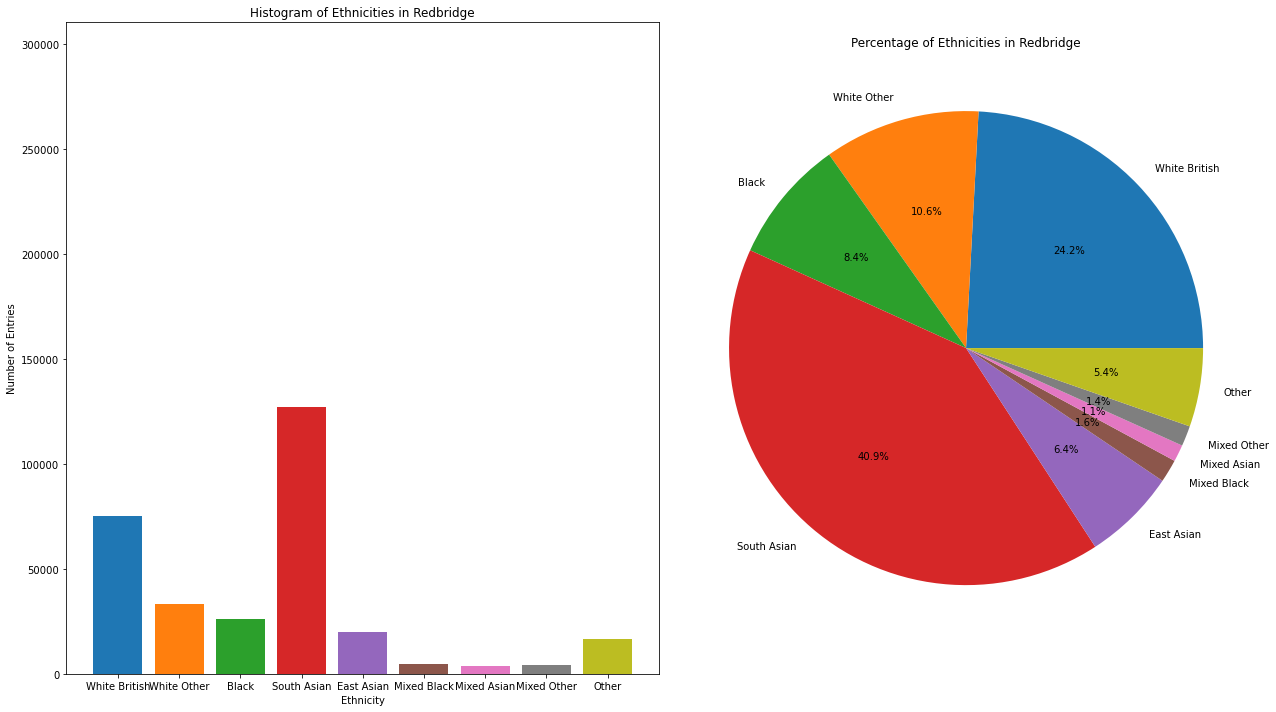

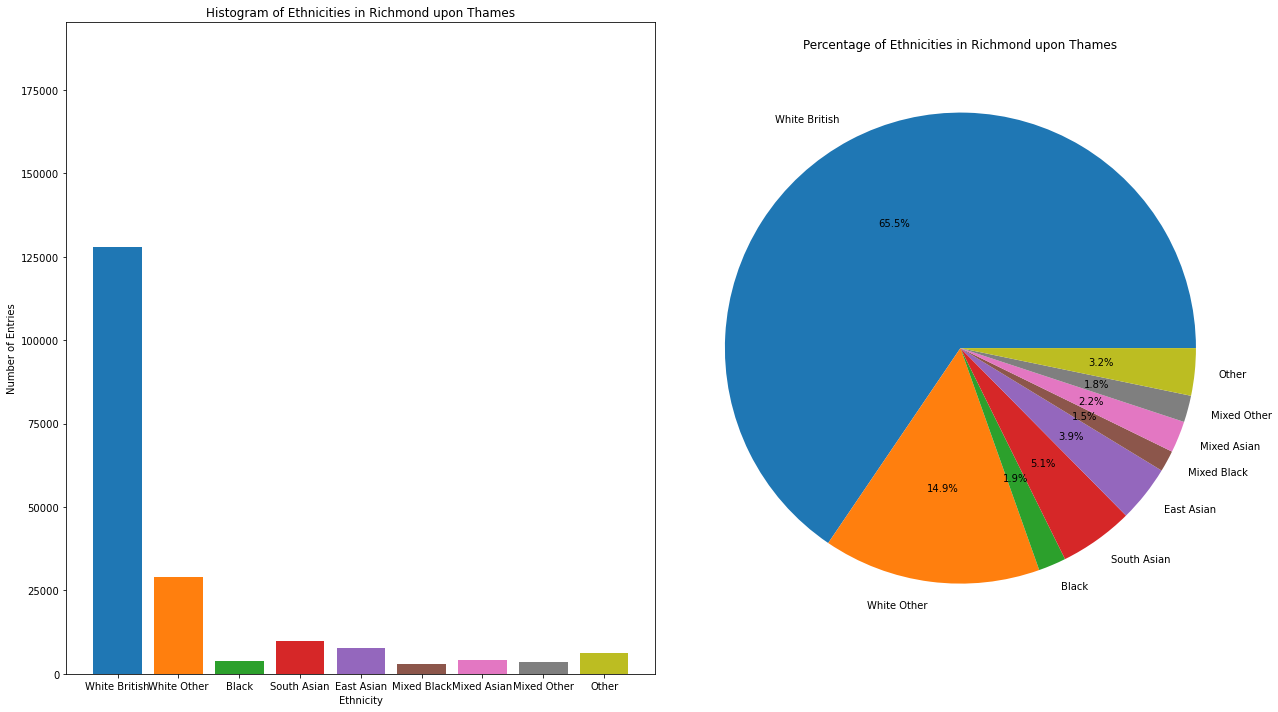

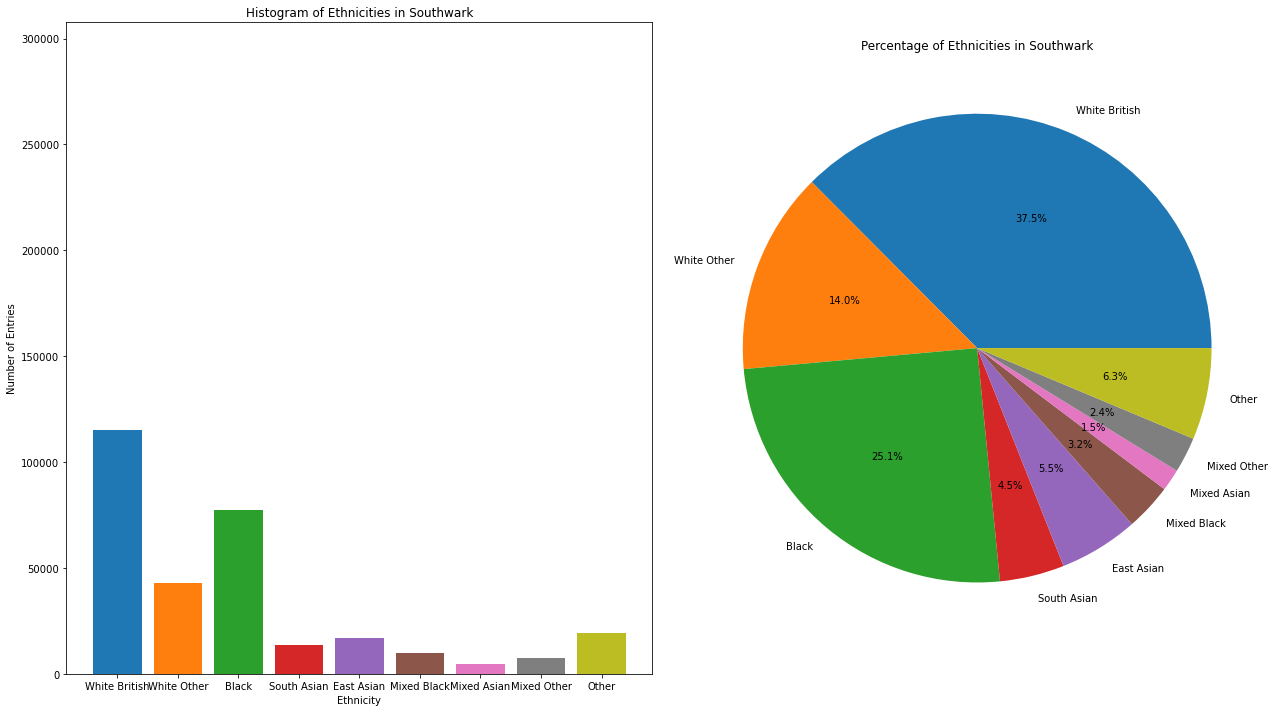

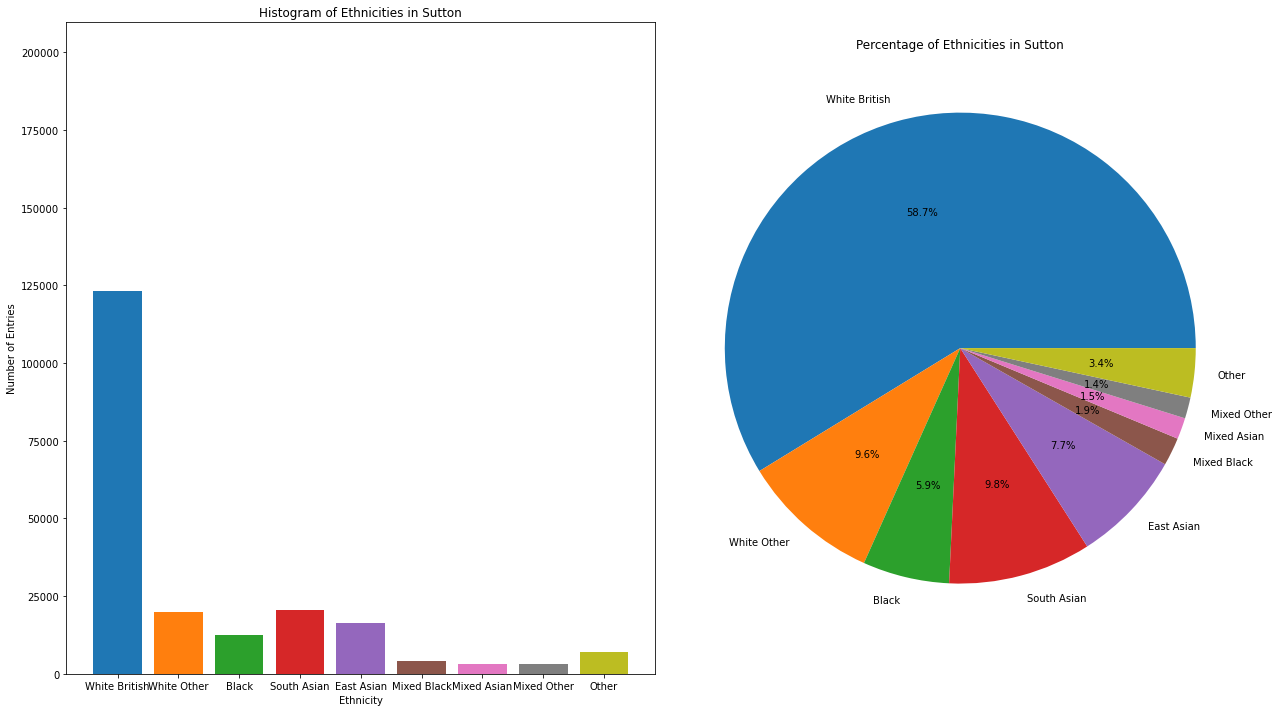

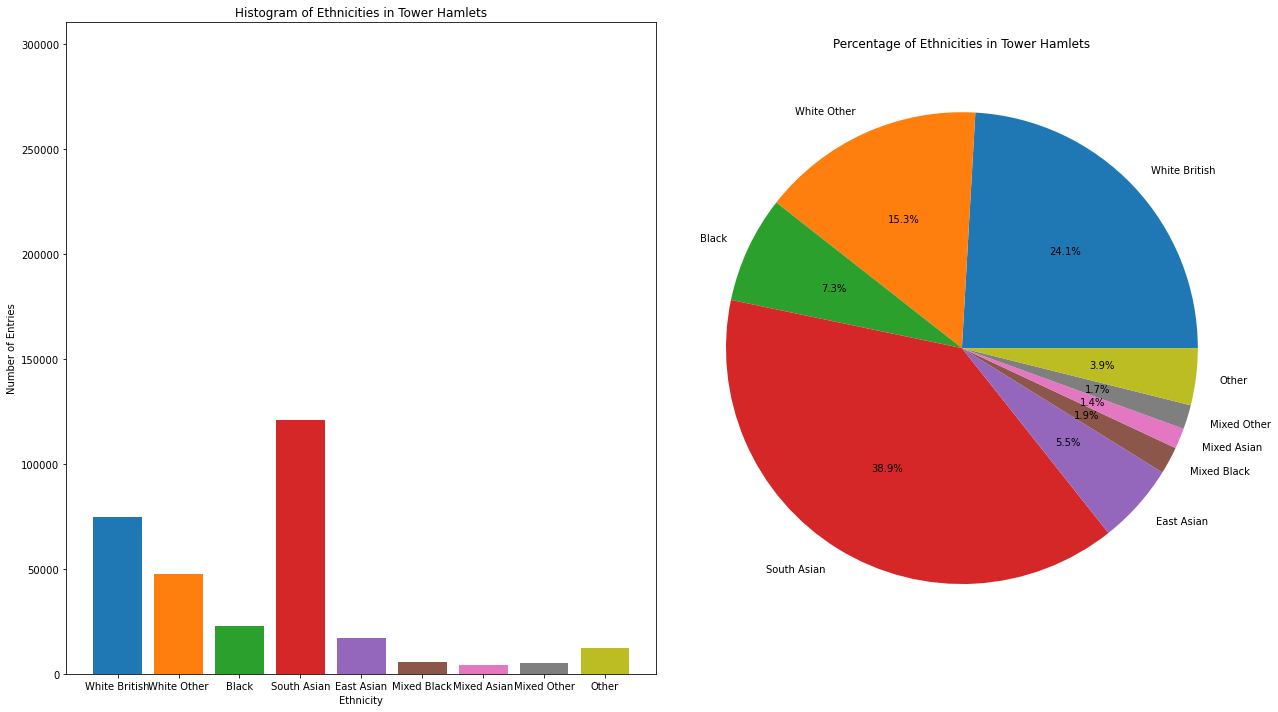

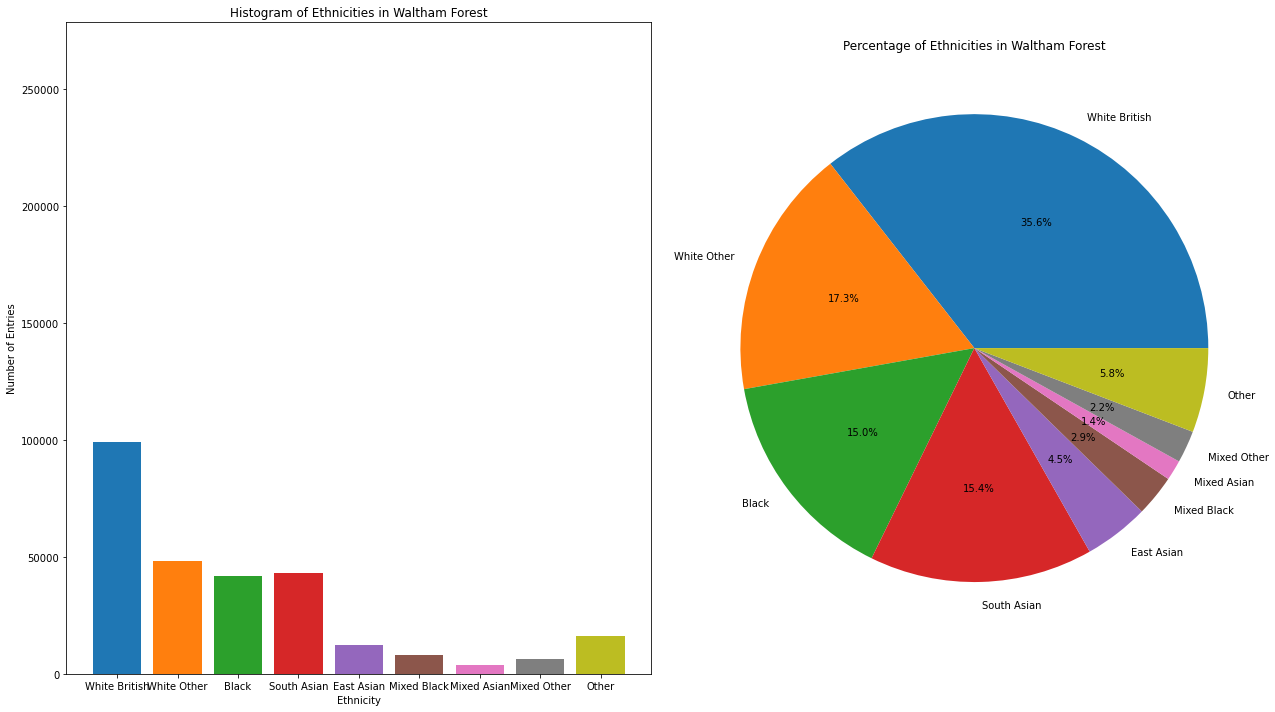

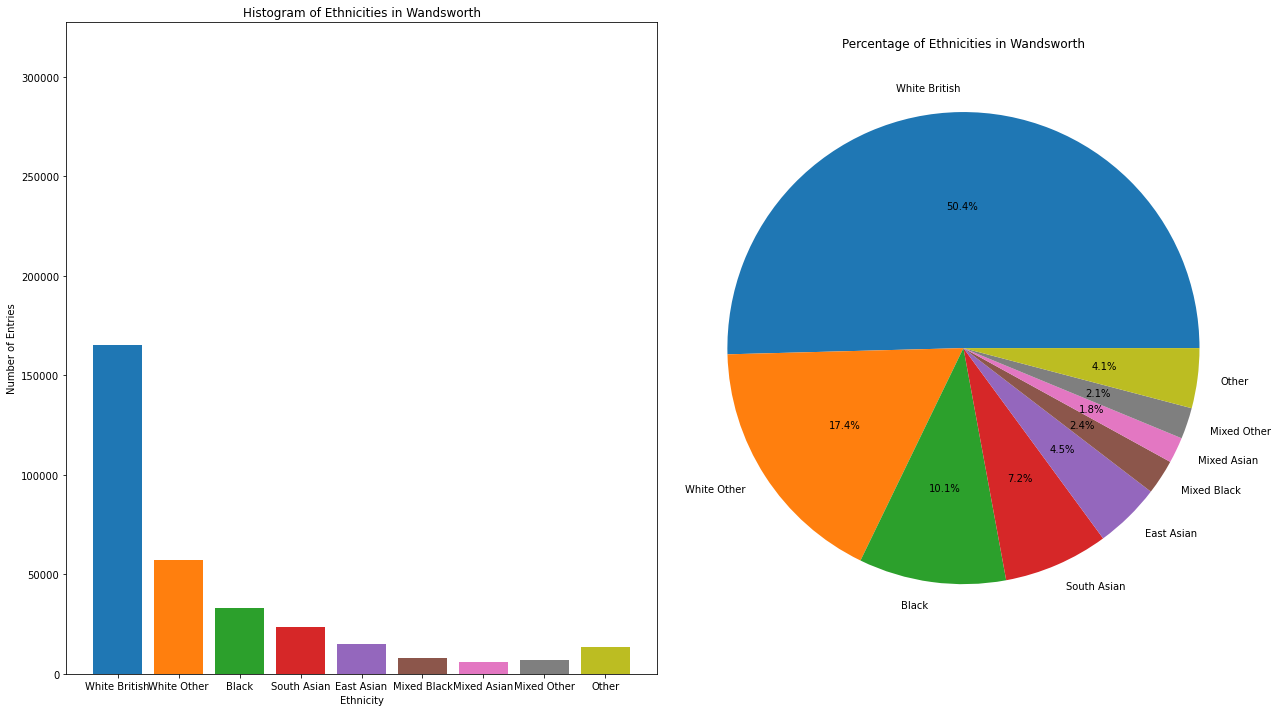

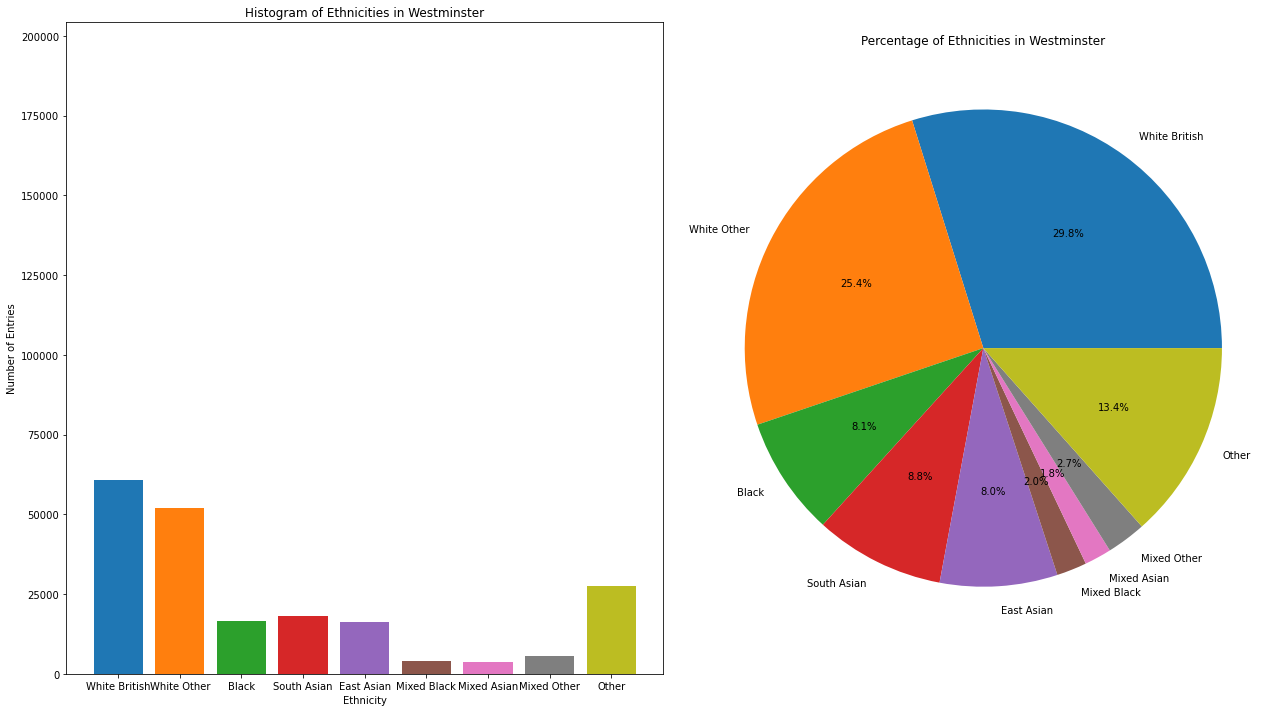

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2021_clean.csv")

# Get the list of boroughs
boroughs = data["Borough"].unique()

# Iterate over each borough
for borough in boroughs:
    # Get the data for the current borough
    borough_data = data[data["Borough"] == borough]

    # Calculate the total number of residents for the current borough
    total_residents = borough_data["Total Residents"].values[0]

    # Create a figure for the histograms and pie charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Generate the histogram for each ethnicity
    for ethnicity in ["White British", "White Other", "Black", "South Asian", "East Asian", "Mixed Black",
                      "Mixed Asian", "Mixed Other", "Other"]:
        count = borough_data[ethnicity].values[0]
        ax1.bar(ethnicity, count)

    ax1.set_xlabel("Ethnicity")
    ax1.set_ylabel("Number of Entries")
    ax1.set_title(f"Histogram of Ethnicities in {borough}")
    ax1.set_ylim(0, total_residents)

    # Generate the pie chart for each ethnicity
    percentages = [borough_data[ethnicity].values[0] / total_residents * 100 for ethnicity in
                   ["White British", "White Other", "Black", "South Asian", "East Asian", "Mixed Black",
                    "Mixed Asian", "Mixed Other", "Other"]]
    labels = ["White British", "White Other", "Black", "South Asian", "East Asian", "Mixed Black",
              "Mixed Asian", "Mixed Other", "Other"]
    ax2.pie(percentages, labels=labels, autopct="%1.1f%%")
    ax2.set_title(f"Percentage of Ethnicities in {borough}")

    # Adjust figure size for better visibility of labels
    fig.set_size_inches(18, 10)

    # Show the histograms and pie charts
    plt.tight_layout()
    plt.show()

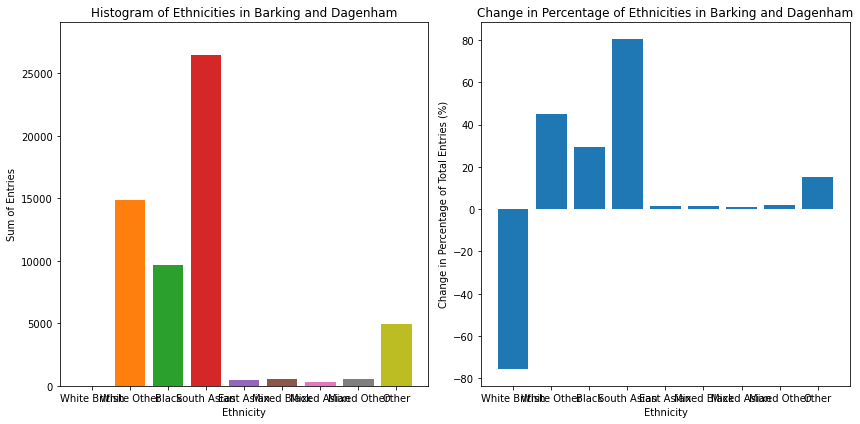

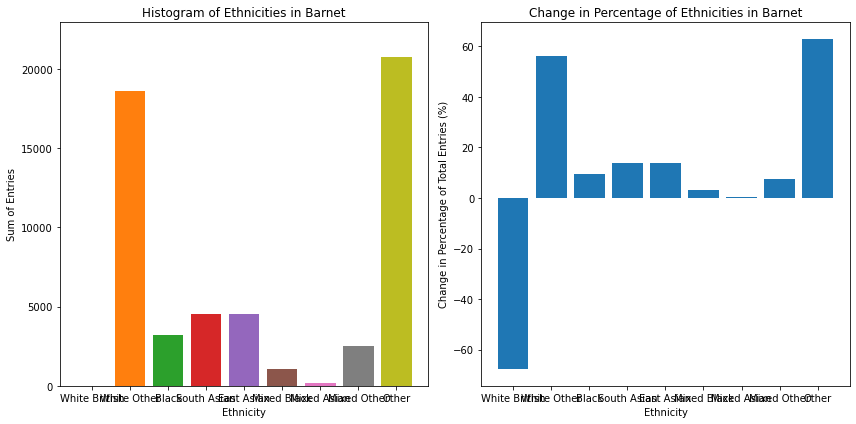

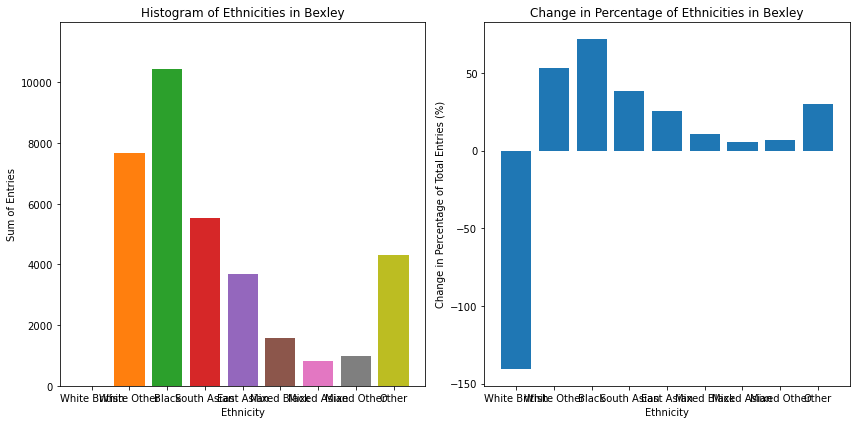

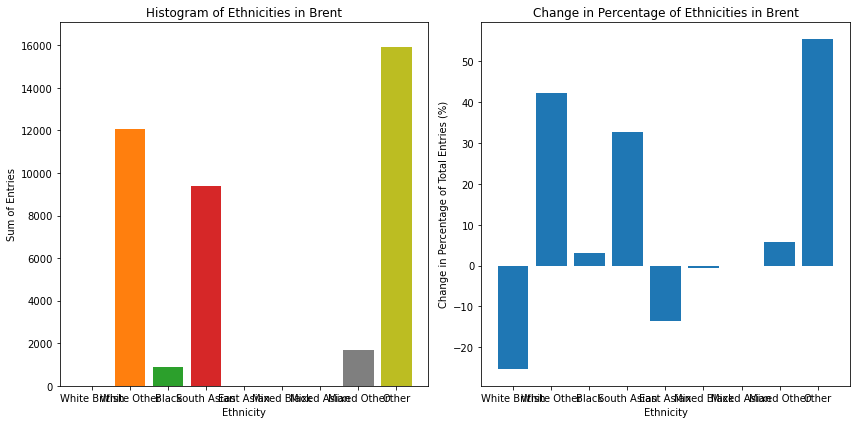

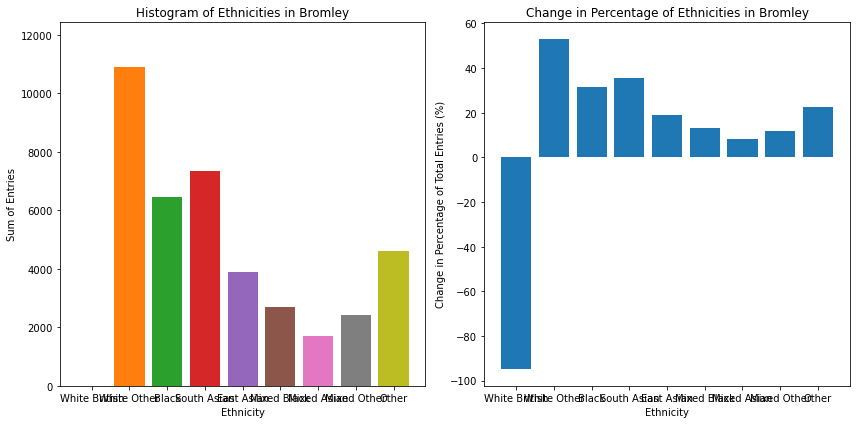

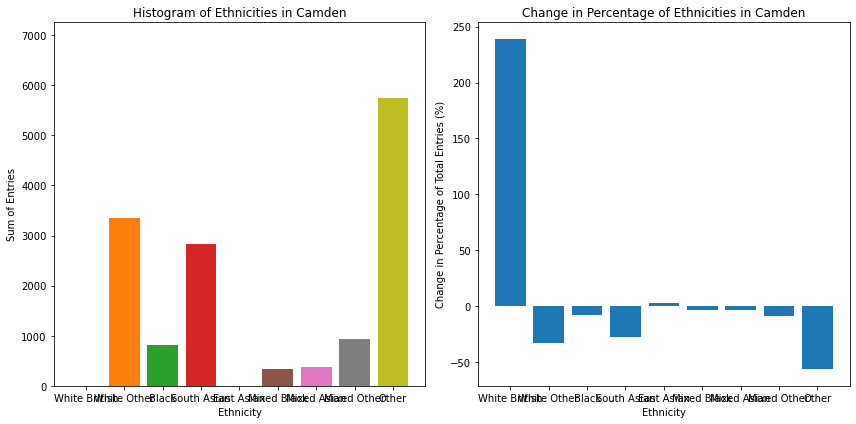

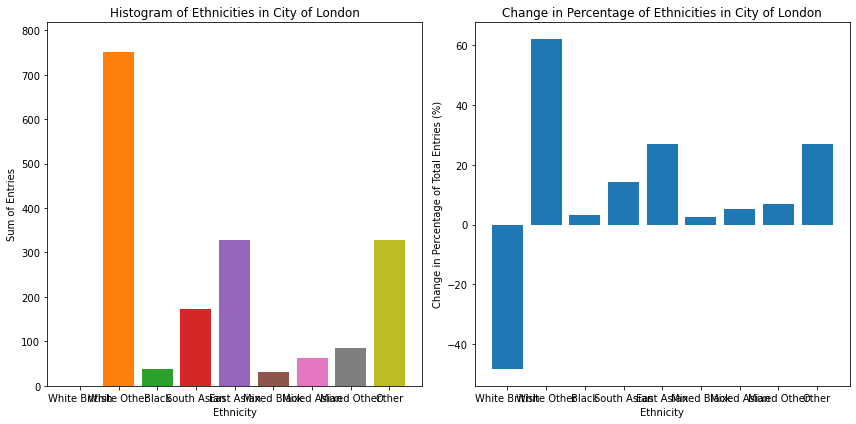

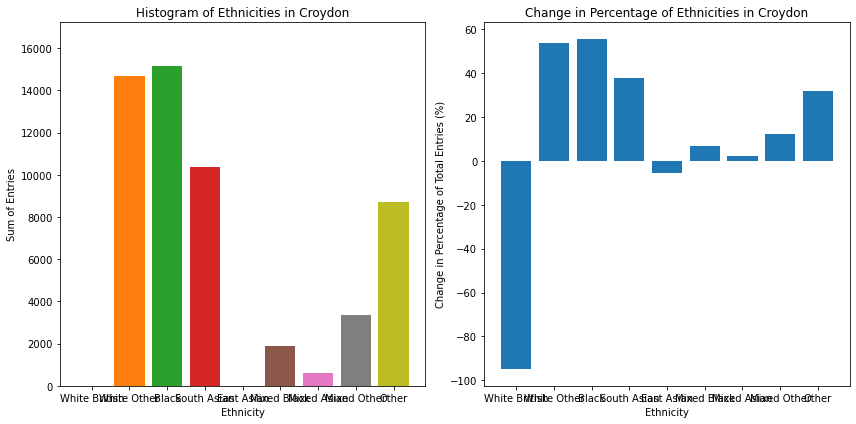

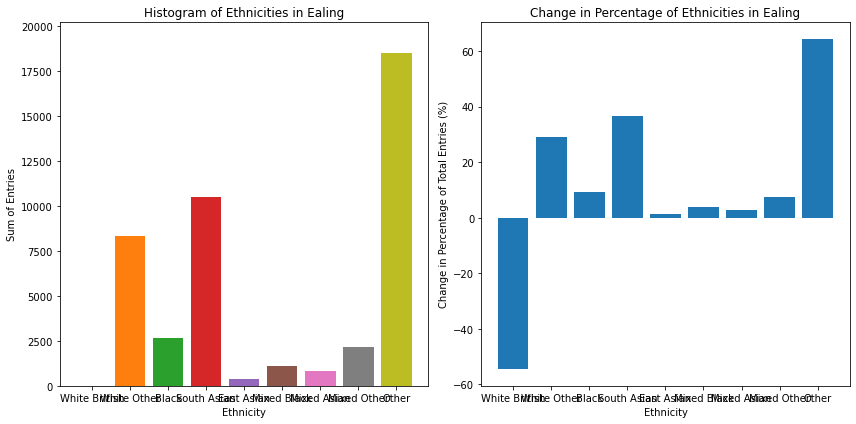

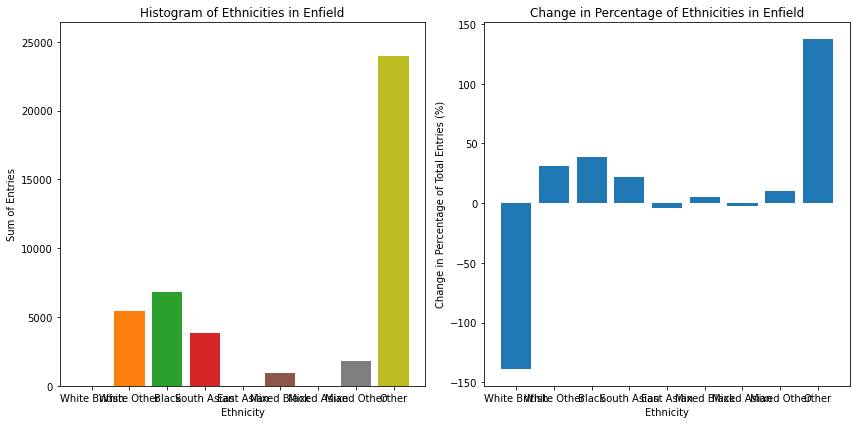

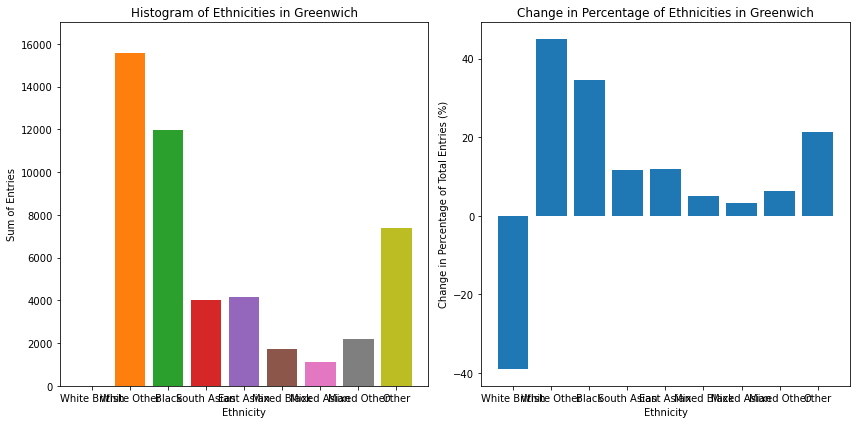

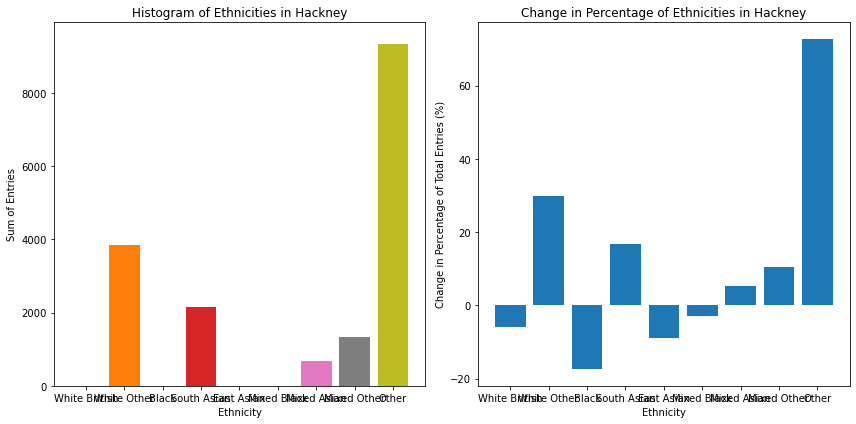

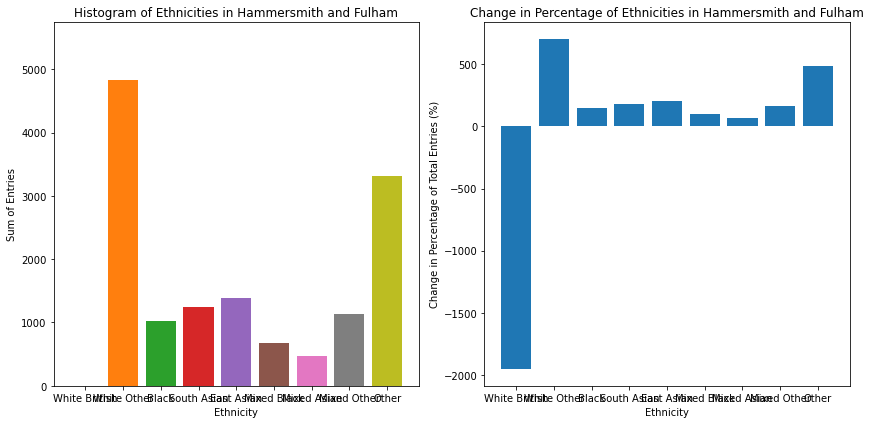

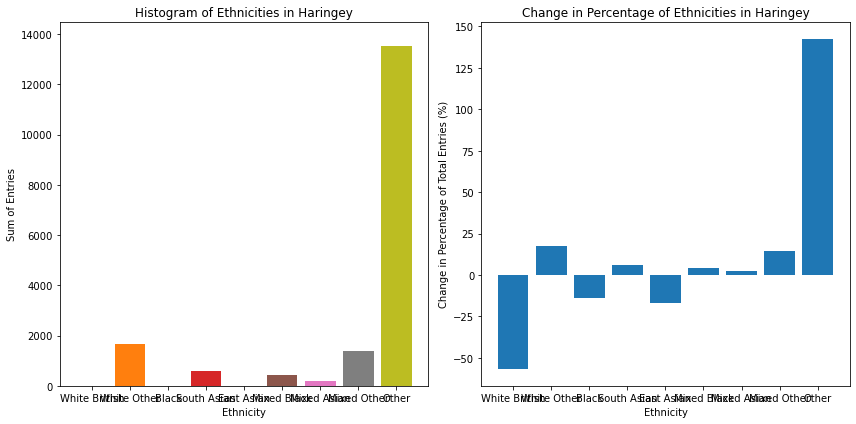

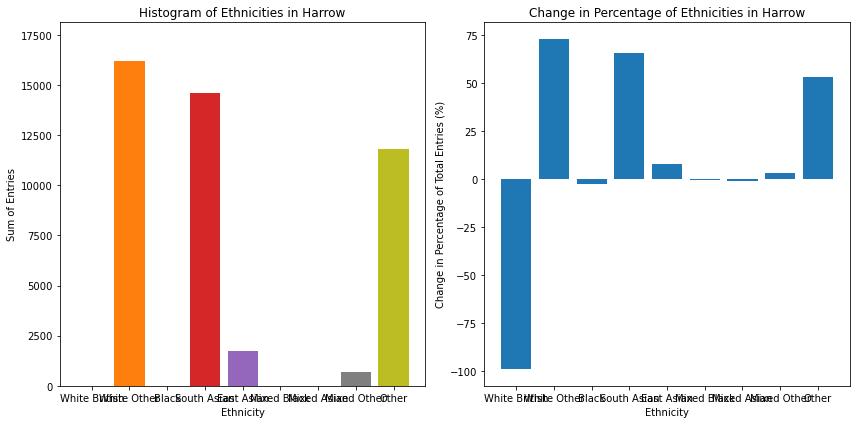

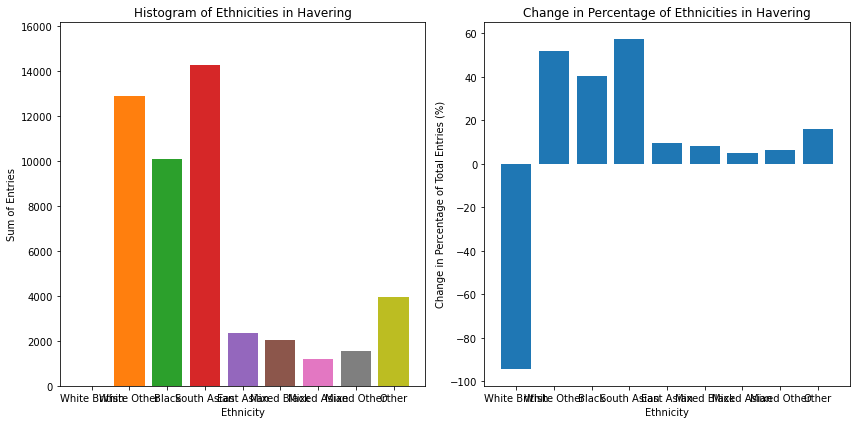

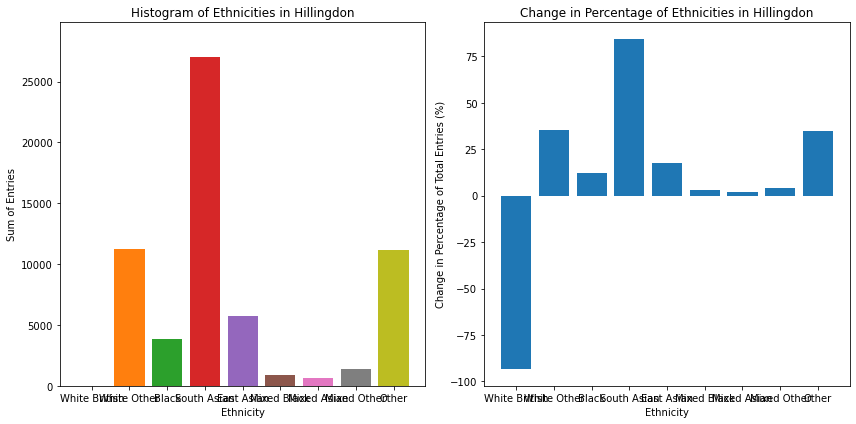

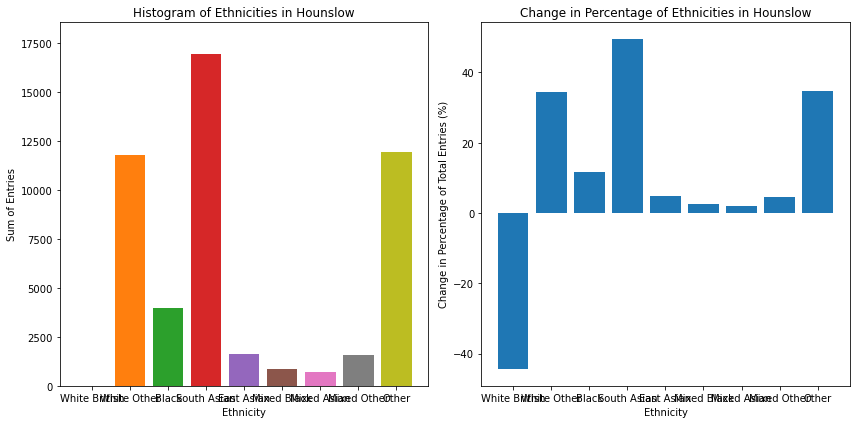

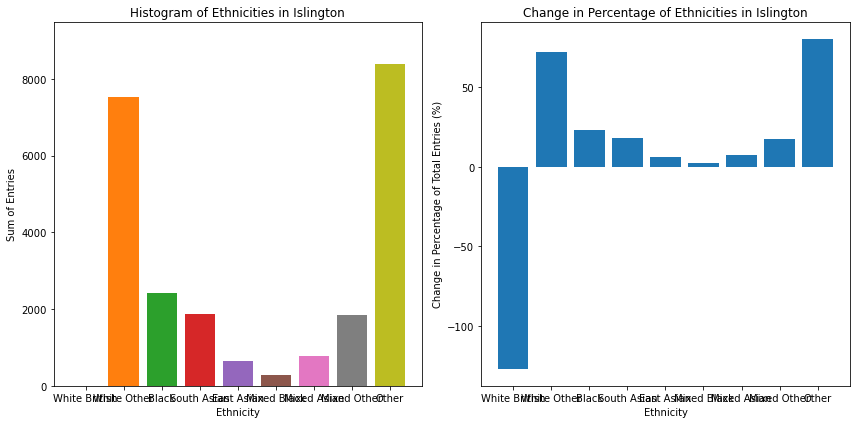

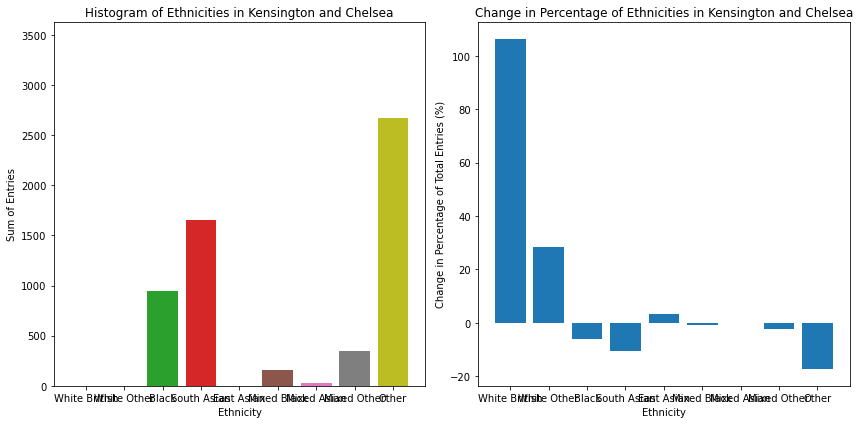

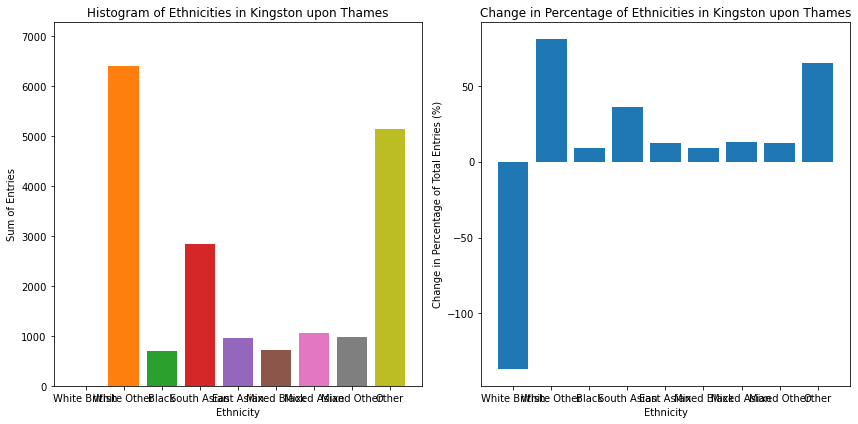

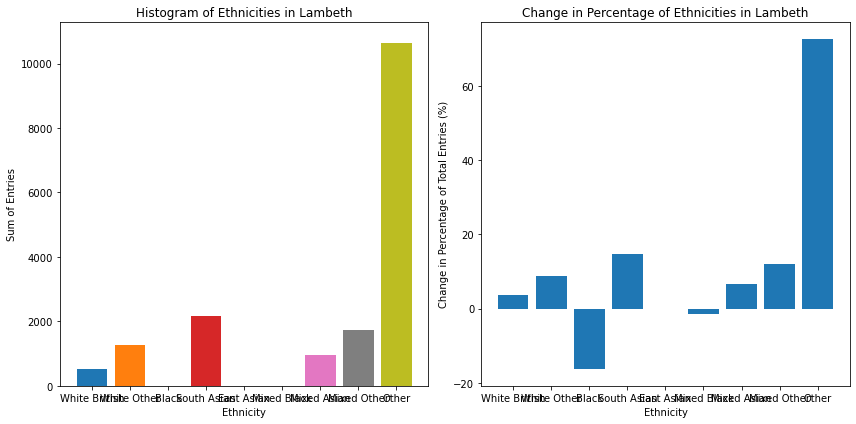

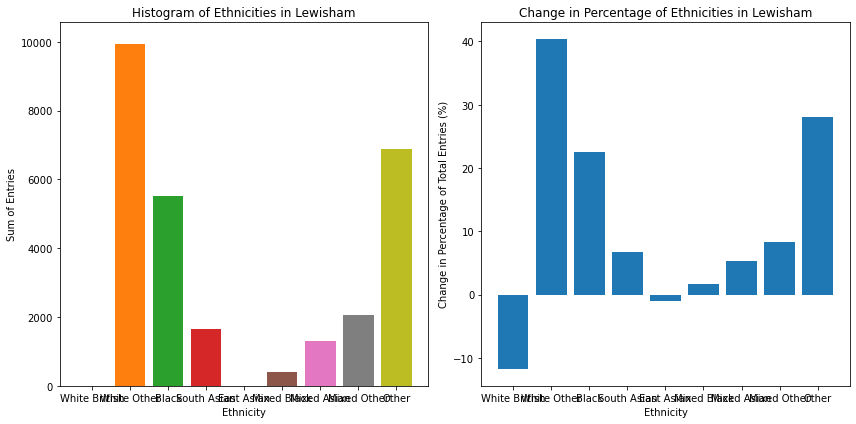

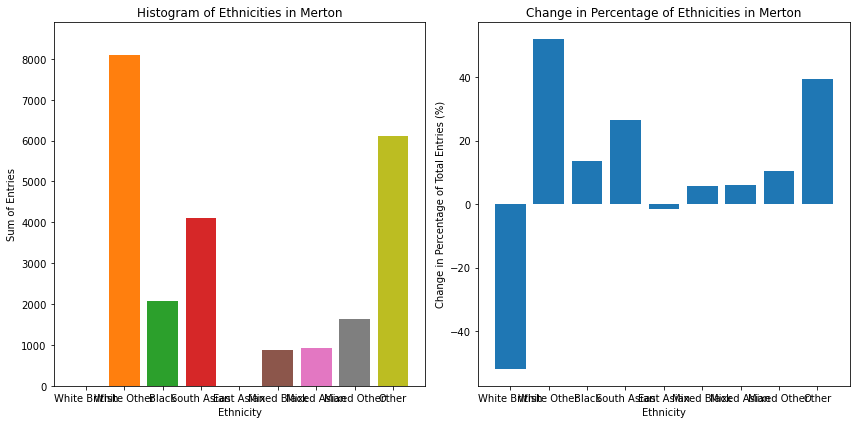

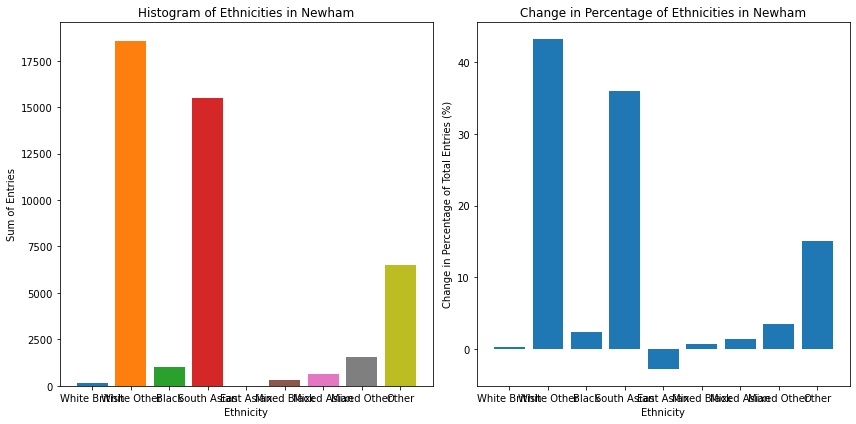

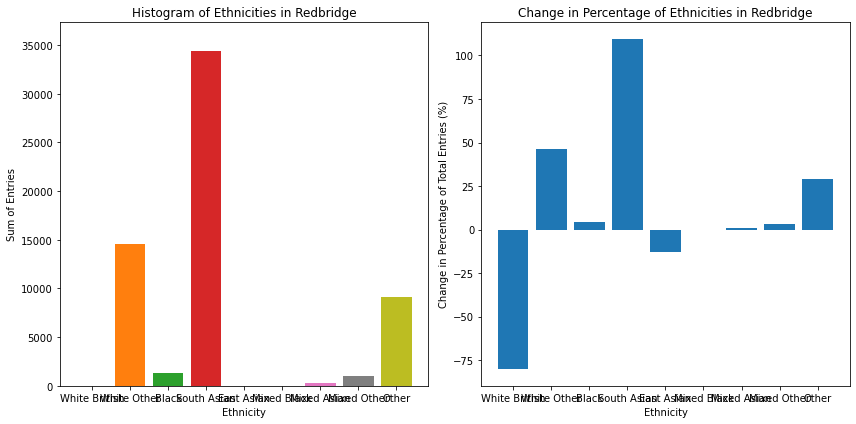

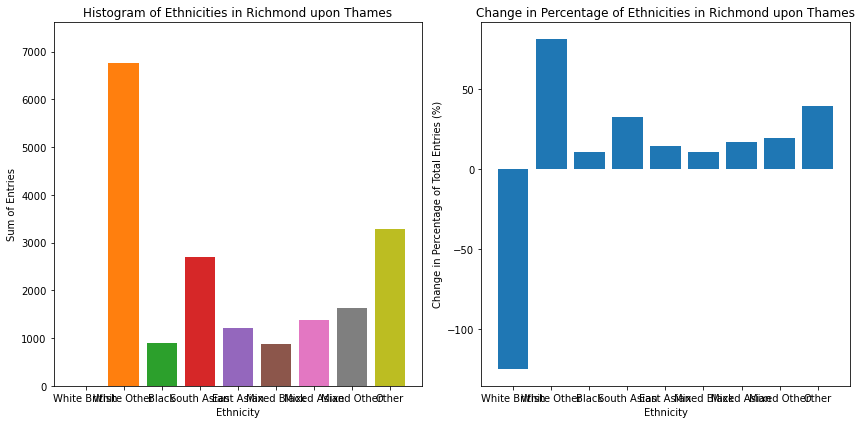

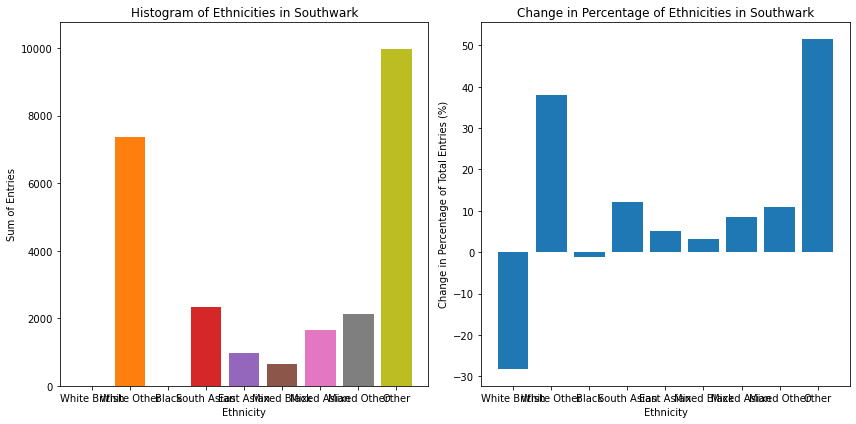

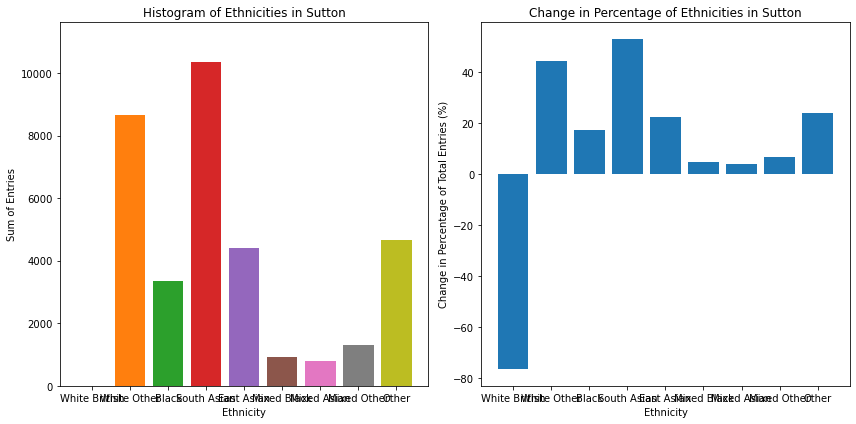

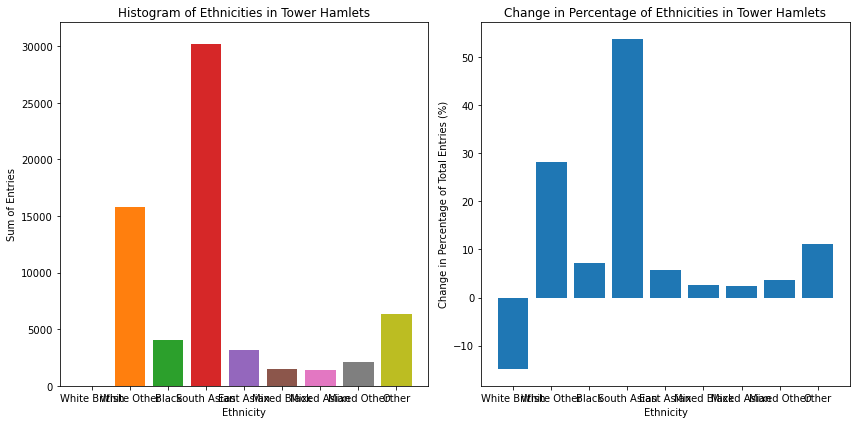

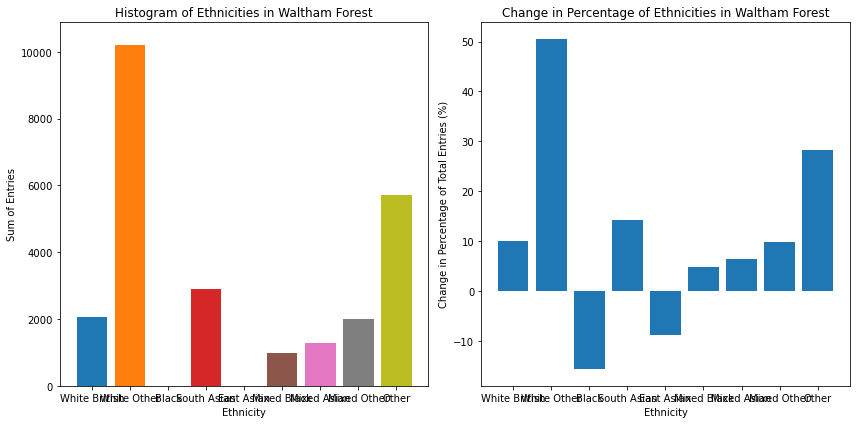

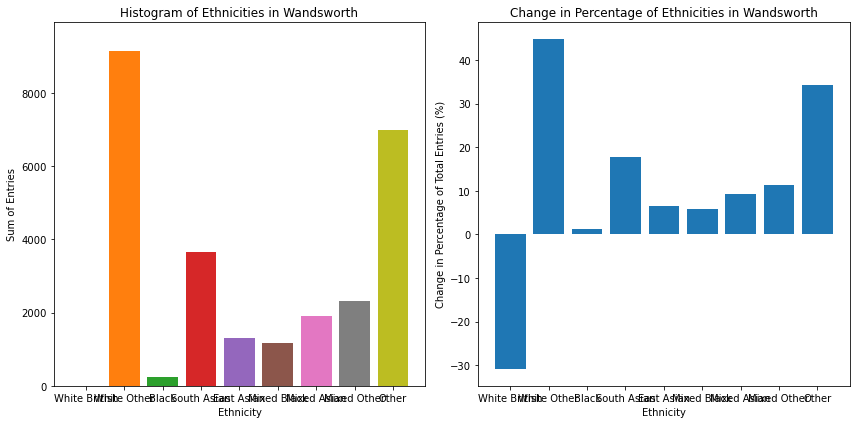

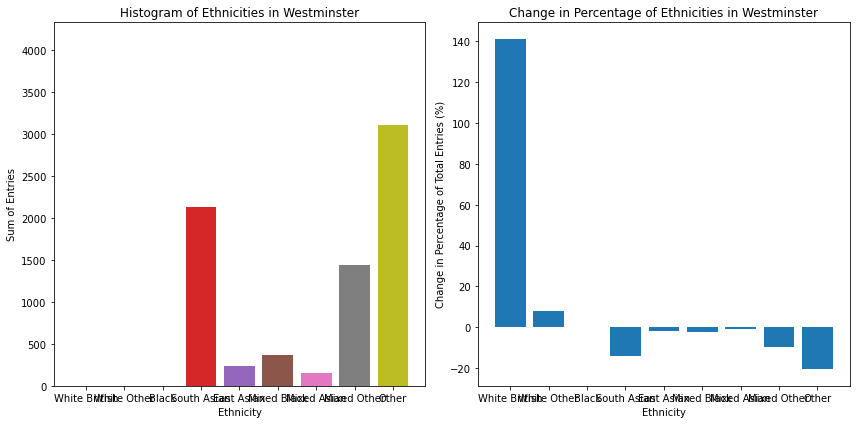

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_change_clean.csv")

# Get the list of boroughs
boroughs = data["Borough"].unique()

# Iterate over each borough
for borough in boroughs:
    # Get the data for the current borough
    borough_data = data[data["Borough"] == borough]

    # Calculate the total number of residents for the current borough
    total_residents = borough_data["Total Residents"].values[0]

    # Create a figure for the histograms and chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Generate the histogram for each ethnicity
    for ethnicity in ["White British", "White Other", "Black", "South Asian", "East Asian", "Mixed Black",
                      "Mixed Asian", "Mixed Other", "Other"]:
        count = borough_data[ethnicity].values[0]
        ax1.bar(ethnicity, count)

    ax1.set_xlabel("Ethnicity")
    ax1.set_ylabel("Sum of Entries")
    ax1.set_title(f"Histogram of Ethnicities in {borough}")
    ax1.set_ylim(0, None)

    # Generate the chart showing the change in percentage of total entries for each ethnicity
    percentages_change = [borough_data[ethnicity].values[0] / total_residents * 100 for ethnicity in
                          ["White British", "White Other", "Black", "South Asian", "East Asian", "Mixed Black",
                           "Mixed Asian", "Mixed Other", "Other"]]
    labels = ["White British", "White Other", "Black", "South Asian", "East Asian", "Mixed Black",
              "Mixed Asian", "Mixed Other", "Other"]
    ax2.bar(labels, percentages_change)
    ax2.set_xlabel("Ethnicity")
    ax2.set_ylabel("Change in Percentage of Total Entries (%)")
    ax2.set_title(f"Change in Percentage of Ethnicities in {borough}")

    # Show the histograms and chart
    plt.tight_layout()
    plt.show()


## Count the number of mismatches between "Self-defined ethncity" and "Officer-defined ethnicity"

In [6]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_new_ethnicities.csv")

# Create a boolean mask to check if Officer-defined ethnicity is a substring of Self-defined ethnicity
mask = data.apply(lambda row: str(row["Officer-defined ethnicity"]) not in str(row["Self-defined ethnicity"]), axis=1)

# Apply the mask to filter the DataFrame
filtered_data = data[mask]

# Count the number of entries where "Self-defined ethnicity" is different from "Officer-defined ethnicity" including blanks
count1 = data[data["Self-defined ethnicity"] != data["Officer-defined ethnicity"]].shape[0]

# Print the count 1
print(f"Number of entries where 'Self-defined ethnicity' differs from 'Officer-defined ethnicity' including blanks: {count1}")

# Get the count of entries that meet the condition
count2 = filtered_data.shape[0]

# Print the count 2
print(f"Number of entries where Officer-defined ethnicity is not a substring of Self-defined ethnicity: {count2}")

# Print overall count
overall_count = len(data)
print(f"Overall Count: {overall_count}")

# Print mismatch percentage
print(f"Percentage of mismatch including blanks: {count1 / overall_count}")
print(f"Percentage of mismatch without blanks: {count2 / overall_count}")

Number of entries where 'Self-defined ethnicity' differs from 'Officer-defined ethnicity' including blanks: 822086
Number of entries where Officer-defined ethnicity is not a substring of Self-defined ethnicity: 308822
Overall Count: 1140779
Percentage of mismatch including blanks: 0.720635635824292
Percentage of mismatch without blanks: 0.2707115050329643


# FINDING THE DISPROPORTIONALITY INDEX

## Find number of people from each ethnicity who got S&S'd in each borough (Combined)

In [11]:
import pandas as pd

# Read the combined_data_clean.csv file into a DataFrame
data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv")

# Group the data by "Borough" and count the total cases
grouped_data = data.groupby("Borough").size().reset_index(name="Total Cases")

# Create an empty DataFrame to store the ethnicity counts
ethnicity_counts = pd.DataFrame(columns=["Borough", "Total Cases", "White British", "White Other", "Black",
                                         "Mixed Asian", "East Asian", "South Asian", "Mixed Black",
                                         "Mixed Other", "Other"])

# Iterate over each unique borough
for borough in grouped_data["Borough"]:
    # Filter the data for the current borough
    borough_data = data[data["Borough"] == borough]

    # Count the occurrences of each ethnicity
    counts = borough_data["Self-defined ethnicity"].value_counts()

    # Create a dictionary with the ethnicity counts for the current borough
    counts_dict = {
        "Borough": borough,
        "Total Cases": grouped_data[grouped_data["Borough"] == borough]["Total Cases"].values[0],
        "White British": counts.get("White British", 0),
        "White Other": counts.get("White Other", 0),
        "Black": counts.get("Black", 0),
        "Mixed Asian": counts.get("Mixed Asian", 0),
        "East Asian": counts.get("East Asian", 0),
        "South Asian": counts.get("South Asian", 0),
        "Mixed Black": counts.get("Mixed Black", 0),
        "Mixed Other": counts.get("Mixed Other", 0),
        "Other": counts.get("Other", 0)
    }

    # Append the counts to the ethnicity_counts DataFrame
    ethnicity_counts = ethnicity_counts.append(counts_dict, ignore_index=True)

# Save the ethnicity counts to a new CSV file
ethnicity_counts.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ss_ethnicities_boroughs.csv", index=False)

# Print the result
print(ethnicity_counts)

                   Borough Total Cases White British White Other  Black  \
0     Barking and Dagenham       22458          4660        4419   5065   
1                   Barnet       16163          2856        2383   3396   
2                   Bexley       15162          8792        1042   2109   
3                    Brent       35586          3009        3948  11986   
4                  Bromley       29359         14367        2342   5485   
5                   Camden       39311          8989        3735   9078   
6           City of London         757           177          83    141   
7                  Croydon       47327          8938        4415  12826   
8                   Ealing       35566          4610        2912   9736   
9                  Enfield       23094          3103        5465   5896   
10               Greenwich       36019         11555        3163  10221   
11                 Hackney       37295          5294        3405  13715   
12  Hammersmith and Fulha

## Do the same for prepandemic

In [13]:
import pandas as pd

# Read the combined_data_clean.csv file into a DataFrame
data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv")

# Group the data by "Borough" and count the total cases
grouped_data = data.groupby("Borough").size().reset_index(name="Total Cases")

# Create an empty DataFrame to store the ethnicity counts
ethnicity_counts = pd.DataFrame(columns=["Borough", "Total Cases", "White British", "White Other", "Black",
                                         "Mixed Asian", "East Asian", "South Asian", "Mixed Black",
                                         "Mixed Other", "Other"])

# Iterate over each unique borough
for borough in grouped_data["Borough"]:
    # Filter the data for the current borough
    borough_data = data[data["Borough"] == borough]

    # Count the occurrences of each ethnicity
    counts = borough_data["Self-defined ethnicity"].value_counts()

    # Create a dictionary with the ethnicity counts for the current borough
    counts_dict = {
        "Borough": borough,
        "Total Cases": grouped_data[grouped_data["Borough"] == borough]["Total Cases"].values[0],
        "White British": counts.get("White British", 0),
        "White Other": counts.get("White Other", 0),
        "Black": counts.get("Black", 0),
        "Mixed Asian": counts.get("Mixed Asian", 0),
        "East Asian": counts.get("East Asian", 0),
        "South Asian": counts.get("South Asian", 0),
        "Mixed Black": counts.get("Mixed Black", 0),
        "Mixed Other": counts.get("Mixed Other", 0),
        "Other": counts.get("Other", 0)
    }

    # Append the counts to the ethnicity_counts DataFrame
    ethnicity_counts = ethnicity_counts.append(counts_dict, ignore_index=True)

# Save the ethnicity counts to a new CSV file
ethnicity_counts.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ss_ethnicities_boroughs_prepandemic.csv", index=False)

# Print the result
print(ethnicity_counts)

                   Borough Total Cases White British White Other  Black  \
0     Barking and Dagenham        6213          1309        1353   1572   
1                   Barnet        4722           882         696   1154   
2                   Bexley        5140          3061         327    732   
3                    Brent       12749          1052        1390   5075   
4                  Bromley        9796          4774         760   2238   
5                   Camden       15062          3202        1587   4091   
6           City of London         223            52          32     46   
7                  Croydon       15068          3203        1440   4499   
8                   Ealing       12306          1519         892   4053   
9                  Enfield        7269           967        1695   2329   
10               Greenwich       10041          3334         776   3069   
11                 Hackney       14621          1997        1350   5946   
12  Hammersmith and Fulha

## Again for pandemic

In [14]:
import pandas as pd

# Read the combined_data_clean.csv file into a DataFrame
data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv")

# Group the data by "Borough" and count the total cases
grouped_data = data.groupby("Borough").size().reset_index(name="Total Cases")

# Create an empty DataFrame to store the ethnicity counts
ethnicity_counts = pd.DataFrame(columns=["Borough", "Total Cases", "White British", "White Other", "Black",
                                         "Mixed Asian", "East Asian", "South Asian", "Mixed Black",
                                         "Mixed Other", "Other"])

# Iterate over each unique borough
for borough in grouped_data["Borough"]:
    # Filter the data for the current borough
    borough_data = data[data["Borough"] == borough]

    # Count the occurrences of each ethnicity
    counts = borough_data["Self-defined ethnicity"].value_counts()

    # Create a dictionary with the ethnicity counts for the current borough
    counts_dict = {
        "Borough": borough,
        "Total Cases": grouped_data[grouped_data["Borough"] == borough]["Total Cases"].values[0],
        "White British": counts.get("White British", 0),
        "White Other": counts.get("White Other", 0),
        "Black": counts.get("Black", 0),
        "Mixed Asian": counts.get("Mixed Asian", 0),
        "East Asian": counts.get("East Asian", 0),
        "South Asian": counts.get("South Asian", 0),
        "Mixed Black": counts.get("Mixed Black", 0),
        "Mixed Other": counts.get("Mixed Other", 0),
        "Other": counts.get("Other", 0)
    }

    # Append the counts to the ethnicity_counts DataFrame
    ethnicity_counts = ethnicity_counts.append(counts_dict, ignore_index=True)

# Save the ethnicity counts to a new CSV file
ethnicity_counts.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ss_ethnicities_boroughs_pandemic.csv", index=False)

# Print the result
print(ethnicity_counts)

                   Borough Total Cases White British White Other Black  \
0     Barking and Dagenham       11922          2409        2375  2668   
1                   Barnet        8384          1409        1205  1728   
2                   Bexley        7380          4318         505  1031   
3                    Brent       17497          1447        1990  5468   
4                  Bromley       14321          7123        1152  2391   
5                   Camden       18154          4163        1627  3802   
6           City of London         384            95          36    62   
7                  Croydon       24293          4492        2286  6297   
8                   Ealing       17715          2328        1501  4538   
9                  Enfield       11010          1534        2792  2502   
10               Greenwich       19242          6160        1798  5409   
11                 Hackney       16813          2441        1509  5925   
12  Hammersmith and Fulham       10145

## Again for post-pandemic

In [15]:
import pandas as pd

# Read the combined_data_clean.csv file into a DataFrame
data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv")

# Group the data by "Borough" and count the total cases
grouped_data = data.groupby("Borough").size().reset_index(name="Total Cases")

# Create an empty DataFrame to store the ethnicity counts
ethnicity_counts = pd.DataFrame(columns=["Borough", "Total Cases", "White British", "White Other", "Black",
                                         "Mixed Asian", "East Asian", "South Asian", "Mixed Black",
                                         "Mixed Other", "Other"])

# Iterate over each unique borough
for borough in grouped_data["Borough"]:
    # Filter the data for the current borough
    borough_data = data[data["Borough"] == borough]

    # Count the occurrences of each ethnicity
    counts = borough_data["Self-defined ethnicity"].value_counts()

    # Create a dictionary with the ethnicity counts for the current borough
    counts_dict = {
        "Borough": borough,
        "Total Cases": grouped_data[grouped_data["Borough"] == borough]["Total Cases"].values[0],
        "White British": counts.get("White British", 0),
        "White Other": counts.get("White Other", 0),
        "Black": counts.get("Black", 0),
        "Mixed Asian": counts.get("Mixed Asian", 0),
        "East Asian": counts.get("East Asian", 0),
        "South Asian": counts.get("South Asian", 0),
        "Mixed Black": counts.get("Mixed Black", 0),
        "Mixed Other": counts.get("Mixed Other", 0),
        "Other": counts.get("Other", 0)
    }

    # Append the counts to the ethnicity_counts DataFrame
    ethnicity_counts = ethnicity_counts.append(counts_dict, ignore_index=True)

# Save the ethnicity counts to a new CSV file
ethnicity_counts.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ss_ethnicities_boroughs_postpandemic.csv", index=False)

# Print the result
print(ethnicity_counts)

                   Borough Total Cases White British White Other Black  \
0     Barking and Dagenham        4323           942         691   825   
1                   Barnet        3057           565         482   514   
2                   Bexley        2642          1413         210   346   
3                    Brent        5340           510         568  1443   
4                  Bromley        5242          2470         430   856   
5                   Camden        6095          1624         521  1185   
6           City of London         150            30          15    33   
7                  Croydon        7966          1243         689  2030   
8                   Ealing        5545           763         519  1145   
9                  Enfield        4815           602         978  1065   
10               Greenwich        6736          2061         589  1743   
11                 Hackney        5861           856         546  1844   
12  Hammersmith and Fulham        3262

# CALCULATE THE DISPROPORTIONALITY INDEX

Disproportionality Index:
                   Borough Total Cases White British White Other     Black  \
0     Barking and Dagenham         NaN     0.0677828    0.149508  0.108226   
1                   Barnet         NaN     0.0192426   0.0312095  0.110897   
2                   Bexley         NaN     0.0544754   0.0659744  0.070176   
3                    Brent         NaN     0.0493837   0.0695548  0.201337   
4                  Bromley         NaN     0.0640098   0.0841477  0.218196   
5                   Camden         NaN      0.112824   0.0822379  0.480724   
6           City of London         NaN     0.0461178   0.0390221  0.613043   
7                  Croydon         NaN     0.0591255    0.116913  0.145051   
8                   Ealing         NaN     0.0471423     0.04798  0.246475   
9                  Enfield         NaN     0.0284441   0.0870764  0.097469   
10               Greenwich         NaN     0.0932396   0.0851941  0.168638   
11                 Hackney         NaN

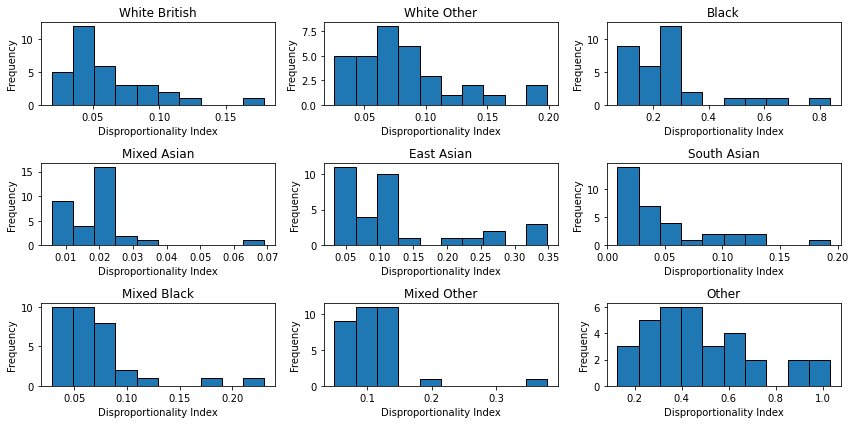

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the ss_ethnicities_boroughs.csv file into a DataFrame
ss_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ss_ethnicities_boroughs.csv")

# Read the ethnic_census_2021_clean.csv file into a DataFrame
census_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2021_clean.csv")


# Create an empty DataFrame to store the disproportionality index
disproportionality_data = pd.DataFrame(columns=ss_data.columns)

# Iterate over each row in ss_data
for _, row in ss_data.iterrows():
    borough = row["Borough"]
    ethnicity_counts = row.drop(["Borough", "Total Cases"])

    # Retrieve the corresponding row from census_data
    census_row = census_data[census_data["Borough"] == borough].squeeze()

    # Calculate the disproportionality index for each ethnicity
    disproportionality_index = ethnicity_counts / census_row

    # Append the disproportionality index to the disproportionality_data DataFrame
    disproportionality_row = pd.DataFrame(disproportionality_index).transpose()
    disproportionality_row["Borough"] = borough
    disproportionality_data = disproportionality_data.append(disproportionality_row, ignore_index=True)

# Save the disproportionality index to a new CSV file
disproportionality_data.to_csv("disproportionality.csv", index=False)

# Print the results
print("Disproportionality Index:")
print(disproportionality_data)

# Create a histogram for each ethnicity
ethnics = ["White British", "White Other", "Black", "Mixed Asian", "East Asian",
           "South Asian", "Mixed Black", "Mixed Other", "Other"]

# Set the figure size and spacing
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4)

# Plot the histograms
for i, ethnic in enumerate(ethnics, 1):
    plt.subplot(3, 3, i)
    plt.hist(disproportionality_data[ethnic], bins=10, edgecolor="black")
    plt.xlabel("Disproportionality Index")
    plt.ylabel("Frequency")
    plt.title(ethnic)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

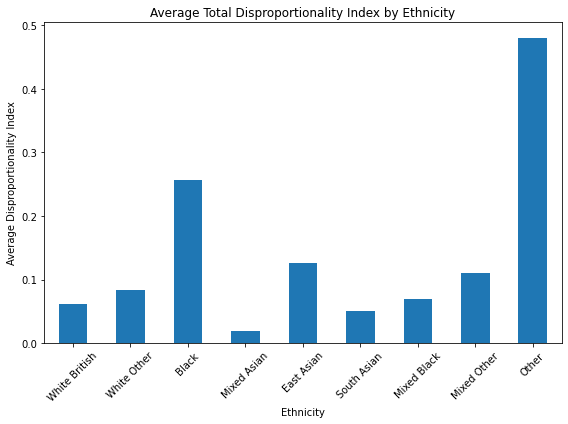

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the ss_ethnicities_boroughs.csv file into a DataFrame
ss_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ss_ethnicities_boroughs.csv")

# Read the ethnic_census_2021_clean.csv file into a DataFrame
census_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2021_clean.csv")


# Create an empty DataFrame to store the disproportionality index
disproportionality_data = pd.DataFrame(columns=ss_data.columns)

# Iterate over each row in ss_data
for _, row in ss_data.iterrows():
    borough = row["Borough"]
    ethnicity_counts = row.drop(["Borough", "Total Cases"])

    # Retrieve the corresponding row from census_data
    census_row = census_data[census_data["Borough"] == borough].squeeze()

    # Calculate the disproportionality index for each ethnicity
    disproportionality_index = ethnicity_counts / census_row

    # Append the disproportionality index to the disproportionality_data DataFrame
    disproportionality_row = pd.DataFrame(disproportionality_index).transpose()
    disproportionality_row["Borough"] = borough
    disproportionality_data = disproportionality_data.append(disproportionality_row, ignore_index=True)

# Save the disproportionality index to a new CSV file
disproportionality_data.to_csv("disproportionality.csv", index=False)

# Calculate the average total disproportionality index for each ethnicity
average_disproportionality = disproportionality_data.drop(["Borough", "Total Cases", "Total Residents"], axis=1).mean()

# Create a bar plot for the average total disproportionality index
plt.figure(figsize=(8, 6))
average_disproportionality.plot(kind="bar")
plt.xlabel("Ethnicity")
plt.ylabel("Average Disproportionality Index")
plt.title("Average Total Disproportionality Index by Ethnicity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Prepandemic

Disproportionality Index:
                   Borough Total Cases White British White Other      Black  \
0     Barking and Dagenham         NaN     0.0190403    0.045776  0.0335897   
1                   Barnet         NaN    0.00594256  0.00911532  0.0376841   
2                   Bexley         NaN      0.018966   0.0207041   0.024357   
3                    Brent         NaN     0.0172654   0.0244886  0.0852483   
4                  Bromley         NaN     0.0212698   0.0273067  0.0890286   
5                   Camden         NaN     0.0401893   0.0349429   0.216638   
6           City of London         NaN     0.0135487   0.0150447        0.2   
7                  Croydon         NaN     0.0211881   0.0381326  0.0508799   
8                   Ealing         NaN     0.0155334   0.0146972   0.102605   
9                  Enfield         NaN    0.00886416   0.0270072  0.0385016   
10               Greenwich         NaN     0.0269027   0.0209012   0.050636   
11                 Hackney

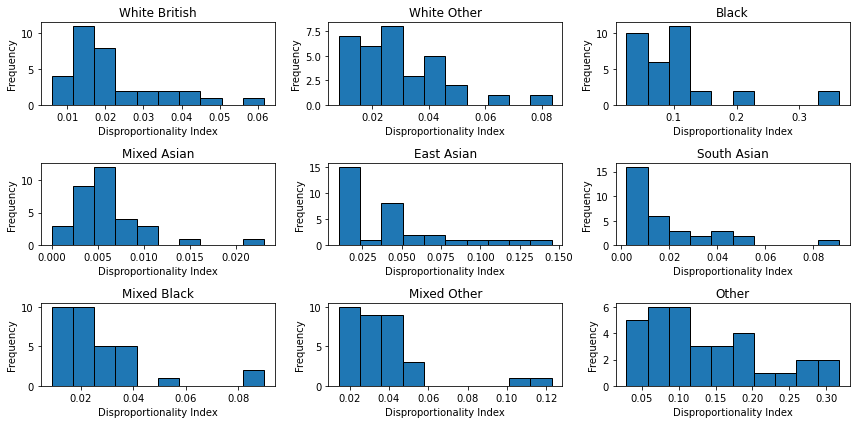

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the ss_ethnicities_boroughs.csv file into a DataFrame
ss_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ss_ethnicities_boroughs_prepandemic.csv")

# Read the ethnic_census_2021_clean.csv file into a DataFrame
census_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2021_clean.csv")


# Create an empty DataFrame to store the disproportionality index
disproportionality_data = pd.DataFrame(columns=ss_data.columns)

# Iterate over each row in ss_data
for _, row in ss_data.iterrows():
    borough = row["Borough"]
    ethnicity_counts = row.drop(["Borough", "Total Cases"])

    # Retrieve the corresponding row from census_data
    census_row = census_data[census_data["Borough"] == borough].squeeze()

    # Calculate the disproportionality index for each ethnicity
    disproportionality_index = ethnicity_counts / census_row

    # Append the disproportionality index to the disproportionality_data DataFrame
    disproportionality_row = pd.DataFrame(disproportionality_index).transpose()
    disproportionality_row["Borough"] = borough
    disproportionality_data = disproportionality_data.append(disproportionality_row, ignore_index=True)

# Save the disproportionality index to a new CSV file
disproportionality_data.to_csv("disproportionality_prepandemic.csv", index=False)

# Print the results
print("Disproportionality Index:")
print(disproportionality_data)

# Create a histogram for each ethnicity
ethnics = ["White British", "White Other", "Black", "Mixed Asian", "East Asian",
           "South Asian", "Mixed Black", "Mixed Other", "Other"]

# Set the figure size and spacing
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4)

# Plot the histograms
for i, ethnic in enumerate(ethnics, 1):
    plt.subplot(3, 3, i)
    plt.hist(disproportionality_data[ethnic], bins=10, edgecolor="black")
    plt.xlabel("Disproportionality Index")
    plt.ylabel("Frequency")
    plt.title(ethnic)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

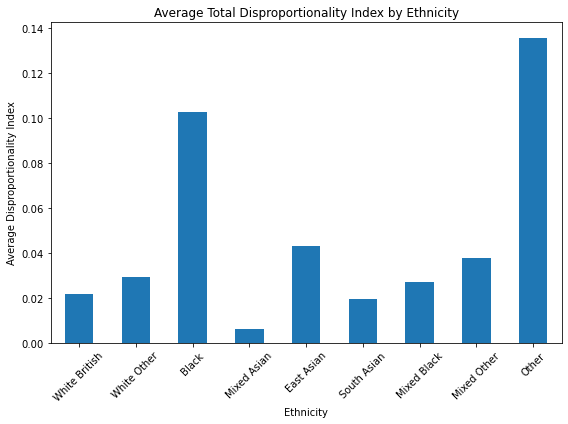

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the ss_ethnicities_boroughs.csv file into a DataFrame
ss_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ss_ethnicities_boroughs_prepandemic.csv")

# Read the ethnic_census_2021_clean.csv file into a DataFrame
census_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2021_clean.csv")


# Create an empty DataFrame to store the disproportionality index
disproportionality_data = pd.DataFrame(columns=ss_data.columns)

# Iterate over each row in ss_data
for _, row in ss_data.iterrows():
    borough = row["Borough"]
    ethnicity_counts = row.drop(["Borough", "Total Cases"])

    # Retrieve the corresponding row from census_data
    census_row = census_data[census_data["Borough"] == borough].squeeze()

    # Calculate the disproportionality index for each ethnicity
    disproportionality_index = ethnicity_counts / census_row

    # Append the disproportionality index to the disproportionality_data DataFrame
    disproportionality_row = pd.DataFrame(disproportionality_index).transpose()
    disproportionality_row["Borough"] = borough
    disproportionality_data = disproportionality_data.append(disproportionality_row, ignore_index=True)

# Save the disproportionality index to a new CSV file
disproportionality_data.to_csv("disproportionality.csv", index=False)

# Calculate the average total disproportionality index for each ethnicity
average_disproportionality = disproportionality_data.drop(["Borough", "Total Cases", "Total Residents"], axis=1).mean()

# Create a bar plot for the average total disproportionality index
plt.figure(figsize=(8, 6))
average_disproportionality.plot(kind="bar")
plt.xlabel("Ethnicity")
plt.ylabel("Average Disproportionality Index")
plt.title("Average Total Disproportionality Index by Ethnicity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Pandemic

Disproportionality Index:
                   Borough Total Cases White British White Other      Black  \
0     Barking and Dagenham         NaN     0.0350405   0.0803532  0.0570085   
1                   Barnet         NaN    0.00949327   0.0157815  0.0564282   
2                   Bexley         NaN     0.0267544   0.0319742  0.0343061   
3                    Brent         NaN     0.0237482   0.0350593  0.0918498   
4                  Bromley         NaN     0.0317354   0.0413912   0.095115   
5                   Camden         NaN     0.0522511   0.0358236   0.201334   
6           City of London         NaN     0.0247525   0.0169252   0.269565   
7                  Croydon         NaN     0.0297149   0.0605354  0.0712137   
8                   Ealing         NaN     0.0238064   0.0247314   0.114883   
9                  Enfield         NaN     0.0140617   0.0444862  0.0413615   
10               Greenwich         NaN     0.0497063   0.0484284  0.0892442   
11                 Hackney

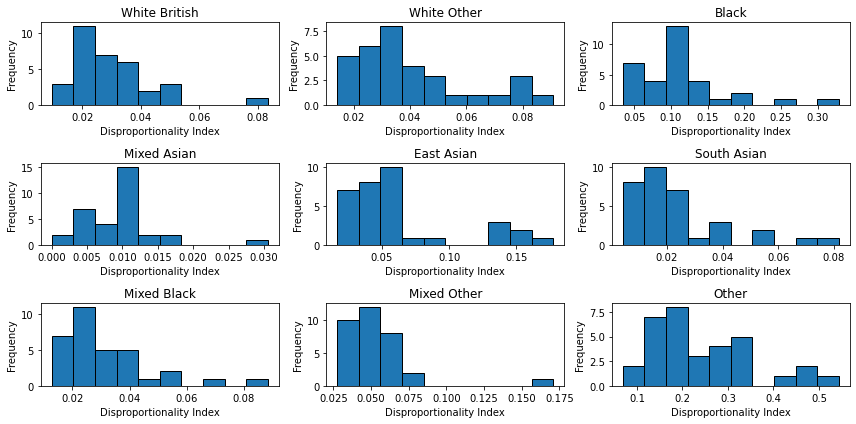

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the ss_ethnicities_boroughs.csv file into a DataFrame
ss_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ss_ethnicities_boroughs_pandemic.csv")

# Read the ethnic_census_2021_clean.csv file into a DataFrame
census_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2021_clean.csv")


# Create an empty DataFrame to store the disproportionality index
disproportionality_data = pd.DataFrame(columns=ss_data.columns)

# Iterate over each row in ss_data
for _, row in ss_data.iterrows():
    borough = row["Borough"]
    ethnicity_counts = row.drop(["Borough", "Total Cases"])

    # Retrieve the corresponding row from census_data
    census_row = census_data[census_data["Borough"] == borough].squeeze()

    # Calculate the disproportionality index for each ethnicity
    disproportionality_index = ethnicity_counts / census_row

    # Append the disproportionality index to the disproportionality_data DataFrame
    disproportionality_row = pd.DataFrame(disproportionality_index).transpose()
    disproportionality_row["Borough"] = borough
    disproportionality_data = disproportionality_data.append(disproportionality_row, ignore_index=True)

# Save the disproportionality index to a new CSV file
disproportionality_data.to_csv("disproportionality_pandemic.csv", index=False)

# Print the results
print("Disproportionality Index:")
print(disproportionality_data)

# Create a histogram for each ethnicity
ethnics = ["White British", "White Other", "Black", "Mixed Asian", "East Asian",
           "South Asian", "Mixed Black", "Mixed Other", "Other"]

# Set the figure size and spacing
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4)

# Plot the histograms
for i, ethnic in enumerate(ethnics, 1):
    plt.subplot(3, 3, i)
    plt.hist(disproportionality_data[ethnic], bins=10, edgecolor="black")
    plt.xlabel("Disproportionality Index")
    plt.ylabel("Frequency")
    plt.title(ethnic)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

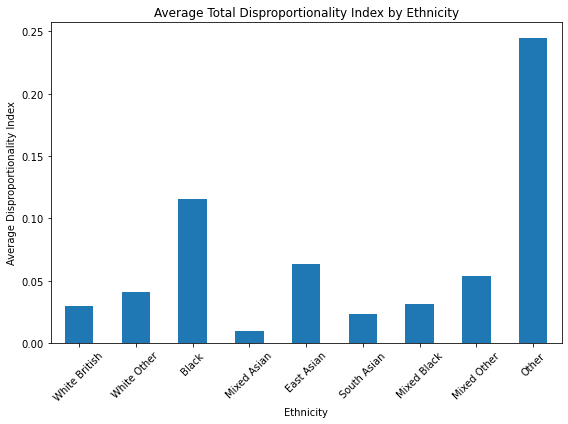

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the ss_ethnicities_boroughs.csv file into a DataFrame
ss_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ss_ethnicities_boroughs_pandemic.csv")

# Read the ethnic_census_2021_clean.csv file into a DataFrame
census_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2021_clean.csv")


# Create an empty DataFrame to store the disproportionality index
disproportionality_data = pd.DataFrame(columns=ss_data.columns)

# Iterate over each row in ss_data
for _, row in ss_data.iterrows():
    borough = row["Borough"]
    ethnicity_counts = row.drop(["Borough", "Total Cases"])

    # Retrieve the corresponding row from census_data
    census_row = census_data[census_data["Borough"] == borough].squeeze()

    # Calculate the disproportionality index for each ethnicity
    disproportionality_index = ethnicity_counts / census_row

    # Append the disproportionality index to the disproportionality_data DataFrame
    disproportionality_row = pd.DataFrame(disproportionality_index).transpose()
    disproportionality_row["Borough"] = borough
    disproportionality_data = disproportionality_data.append(disproportionality_row, ignore_index=True)

# Save the disproportionality index to a new CSV file
disproportionality_data.to_csv("disproportionality_pandemic.csv", index=False)

# Calculate the average total disproportionality index for each ethnicity
average_disproportionality = disproportionality_data.drop(["Borough", "Total Cases", "Total Residents"], axis=1).mean()

# Create a bar plot for the average total disproportionality index
plt.figure(figsize=(8, 6))
average_disproportionality.plot(kind="bar")
plt.xlabel("Ethnicity")
plt.ylabel("Average Disproportionality Index")
plt.title("Average Total Disproportionality Index by Ethnicity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Post-pandemic

Disproportionality Index:
                   Borough Total Cases White British White Other      Black  \
0     Barking and Dagenham         NaN      0.013702   0.0233786  0.0176282   
1                   Barnet         NaN    0.00380674  0.00631262  0.0167848   
2                   Bexley         NaN    0.00875497   0.0132962   0.011513   
3                    Brent         NaN    0.00837012   0.0100069  0.0242391   
4                  Bromley         NaN     0.0110047   0.0154498   0.034052   
5                   Camden         NaN     0.0203833   0.0114715  0.0627515   
6           City of London         NaN    0.00781657  0.00705219   0.143478   
7                  Croydon         NaN    0.00822253   0.0182454  0.0229576   
8                   Ealing         NaN    0.00780251  0.00855137  0.0289866   
9                  Enfield         NaN    0.00551833   0.0155829  0.0176059   
10               Greenwich         NaN     0.0166306   0.0158645  0.0287581   
11                 Hackney

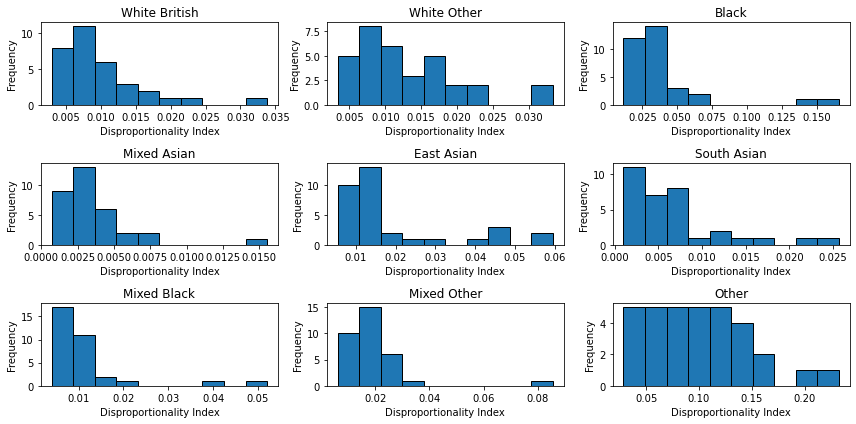

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the ss_ethnicities_boroughs.csv file into a DataFrame
ss_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ss_ethnicities_boroughs_postpandemic.csv")

# Read the ethnic_census_2021_clean.csv file into a DataFrame
census_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2021_clean.csv")


# Create an empty DataFrame to store the disproportionality index
disproportionality_data = pd.DataFrame(columns=ss_data.columns)

# Iterate over each row in ss_data
for _, row in ss_data.iterrows():
    borough = row["Borough"]
    ethnicity_counts = row.drop(["Borough", "Total Cases"])

    # Retrieve the corresponding row from census_data
    census_row = census_data[census_data["Borough"] == borough].squeeze()

    # Calculate the disproportionality index for each ethnicity
    disproportionality_index = ethnicity_counts / census_row

    # Append the disproportionality index to the disproportionality_data DataFrame
    disproportionality_row = pd.DataFrame(disproportionality_index).transpose()
    disproportionality_row["Borough"] = borough
    disproportionality_data = disproportionality_data.append(disproportionality_row, ignore_index=True)

# Save the disproportionality index to a new CSV file
disproportionality_data.to_csv("disproportionality_postpandemic.csv", index=False)

# Print the results
print("Disproportionality Index:")
print(disproportionality_data)

# Create a histogram for each ethnicity
ethnics = ["White British", "White Other", "Black", "Mixed Asian", "East Asian",
           "South Asian", "Mixed Black", "Mixed Other", "Other"]

# Set the figure size and spacing
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4)

# Plot the histograms
for i, ethnic in enumerate(ethnics, 1):
    plt.subplot(3, 3, i)
    plt.hist(disproportionality_data[ethnic], bins=10, edgecolor="black")
    plt.xlabel("Disproportionality Index")
    plt.ylabel("Frequency")
    plt.title(ethnic)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

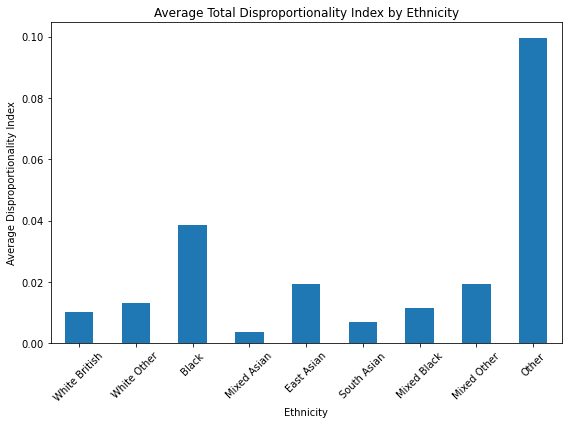

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the ss_ethnicities_boroughs.csv file into a DataFrame
ss_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ss_ethnicities_boroughs_postpandemic.csv")

# Read the ethnic_census_2021_clean.csv file into a DataFrame
census_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\ethnic_census_2021_clean.csv")


# Create an empty DataFrame to store the disproportionality index
disproportionality_data = pd.DataFrame(columns=ss_data.columns)

# Iterate over each row in ss_data
for _, row in ss_data.iterrows():
    borough = row["Borough"]
    ethnicity_counts = row.drop(["Borough", "Total Cases"])

    # Retrieve the corresponding row from census_data
    census_row = census_data[census_data["Borough"] == borough].squeeze()

    # Calculate the disproportionality index for each ethnicity
    disproportionality_index = ethnicity_counts / census_row

    # Append the disproportionality index to the disproportionality_data DataFrame
    disproportionality_row = pd.DataFrame(disproportionality_index).transpose()
    disproportionality_row["Borough"] = borough
    disproportionality_data = disproportionality_data.append(disproportionality_row, ignore_index=True)

# Save the disproportionality index to a new CSV file
disproportionality_data.to_csv("disproportionality_post_pandemic.csv", index=False)

# Calculate the average total disproportionality index for each ethnicity
average_disproportionality = disproportionality_data.drop(["Borough", "Total Cases", "Total Residents"], axis=1).mean()

# Create a bar plot for the average total disproportionality index
plt.figure(figsize=(8, 6))
average_disproportionality.plot(kind="bar")
plt.xlabel("Ethnicity")
plt.ylabel("Average Disproportionality Index")
plt.title("Average Total Disproportionality Index by Ethnicity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
